In [1]:
# 根据商品bbox融合多个图像 bbox[y1,x1, y2, x2]*1.6
import random
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import numpy as np
import os
import time

%matplotlib inline 
import cv2 as cv

_MIN_AREA = 9
_ITER_COUNT = 5
_RECT_SHRINK = 3

def grabcut(img_path, bbox):
    """Use Grabcut to create a binary segmentation of an image within a bounding box
    Param:
        img: path to input image astype('uint8')
        bbox: bbox numpy array [y1, x1, y2, x2]
    Returns:
        mask with binary segmentation astype('uint8')
    Based on:
        https://docs.opencv.org/trunk/d8/d83/tutorial_py_grabcut.html
    """
    img = cv.imread(img_path)
    width, height = bbox[3] - bbox[1], bbox[2] - bbox[0]
    if width * height < _MIN_AREA:
        # OpenCV's Grabcut breaks if the rectangle is too small!
        # This happens with instance mask 2008_002212_4.png
        # Fix: Draw a filled rectangle at that location, making the assumption everything in the rectangle is foreground
        assert(width*height > 0)
        mask = rect_mask(img.shape[:2], bbox)
    elif width * height == img.shape[0] * img.shape[1]:
        # If the rectangle covers the entire image, grabCut can't distinguish between background and foreground
        # because it assumes what's outside the rect is background (no "outside" if the rect is as large as the input)
        # This happens with instance mask 2008_002638_3.png
        # Crappy Fix: Shrink the rectangle corners by _RECT_SHRINK on all sides
        # Use Grabcut to create a segmentation within the bbox
        rect = (_RECT_SHRINK, _RECT_SHRINK, width - _RECT_SHRINK * 2, height - _RECT_SHRINK * 2)
        gct = np.zeros(img.shape[:2], np.uint8)
        bgdModel, fgdModel = np.zeros((1, 65), np.float64), np.zeros((1, 65), np.float64)
        cv.grabCut(img, gct, rect, bgdModel,fgdModel, _ITER_COUNT, cv.GC_INIT_WITH_RECT)
        mask = np.where((gct == 2) | (gct == 0), 0, 1).astype('uint8')
    else:
        # Use Grabcut to create a segmentation within the bbox
        rect = (bbox[1], bbox[0], width, height)
        gct = np.zeros(img.shape[:2], np.uint8)
        bgdModel, fgdModel = np.zeros((1, 65), np.float64), np.zeros((1, 65), np.float64)
        cv.grabCut(img, gct, rect, bgdModel,fgdModel, _ITER_COUNT, cv.GC_INIT_WITH_RECT)
        mask = np.where((gct == 2) | (gct == 0), 0, 1).astype('uint8')
    return mask

19154
14379
14379


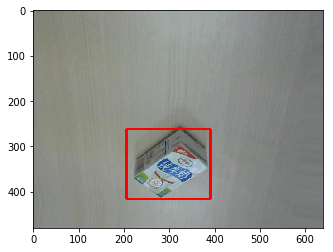

15984


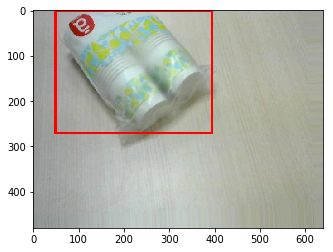

13862


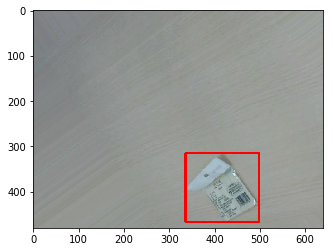

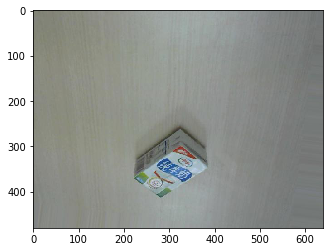

In [18]:
f=open('product_train_bbox.txt','r')


lines = f.readlines()
sum_line = len(lines)
print(sum_line)
f.close()

# ind = [14379,15984,13862]
x1 = random.randint(0, sum_line - 1)
x1 = ind[0]


print(x1)
j = 100
line1 = lines[x1].split()
path1 = line1[0]
gt_class1 = int(line1[5])
bbox1 = [int(int(cordi)/1.6) for cordi in line1[1:5]]


from PIL import Image

tuple_bbox1 = (bbox1[1], bbox1[0], bbox1[3], bbox1[2])

img1 = Image.open(path1)

# img1 = cv2.imread(path1)

k = 1
while k < 3:
#     x = random.randint(0, sum_line - 1)
    x = ind[k]
    
    print(x)

    line = lines[x].split()
    path = line[0]
    gt_class = int(line[5])
    bbox = [int(int(cordi)/1.6) for cordi in line[1:5]]
    
    
    img = cv2.imread(path)
    tuple_bbox = tuple([bbox[1], bbox[0], bbox[3], bbox[2]])
    cv2.rectangle(img, (bbox[1],bbox[0]), (bbox[3], bbox[2]),(0,0,255), 4)

    plt.imshow((img).astype(np.uint8)[:, :, [2, 1, 0]])
    plt.show()
    
#     img = Image.open(path)
# #     img = cv2.imread(path)
    
#     tuple_bbox = tuple([bbox[1], bbox[0], bbox[3], bbox[2]])
#     b = img.crop(tuple_bbox)
#     img1.paste(b,tuple_bbox)
    
    
    k  = k+1

img1 = np.asarray(img1)
plt.imshow(img1[:, :, [0, 1, 2]])
plt.show()

# 14413
# 11221
# 7544

# 4825
# 5741
# 7574

# 14379
# 15984
# 13862

# 1544
# 16098
# 2966

# 18190
# 8712
# 1646

0
15984
0


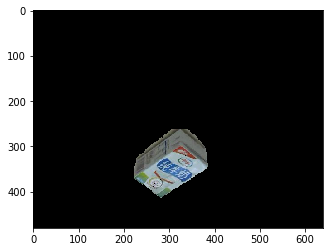

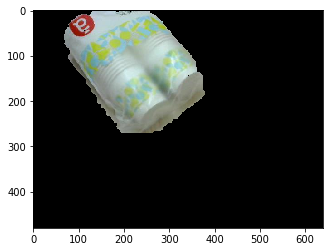

13862
414


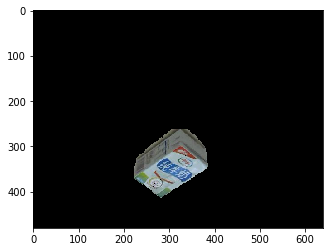

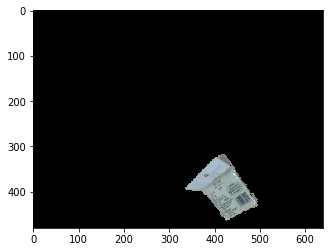

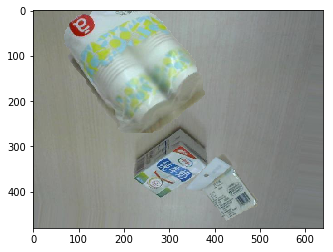

In [12]:

f=open('product_train_bbox.txt','r')


lines = f.readlines()
sum_line = len(lines)
dst_dir = "./data/detection_train/"
mask_dir = "./data/train_mask/"

# ind = [18190,8712,1646]
ind = [14379,15984,13862]
# 14379
# 15984
# 13862

for j in range(1):
    print(j)
    file_gt = open('./data/detection_train_gt.txt','a')
    
    dst_name = dst_dir + str(time.time()) + ".jpg"
    dst_line = dst_name + " " + str(4) + " "
    
#     x1 = random.randint(0, sum_line - 1)
    x1 = ind[0]
#     x1 = 0
    
    line1 = lines[x1].split()
    path1 = line1[0]
    gt_class1 = int(line1[5])
    bbox1 = [int(int(cordi)/1.6) for cordi in line1[1:5]]
    img1 = cv2.imread(path1)
    
    mask_path1 = os.path.join(mask_dir, str(x1)+".jpg")
    mask1 = cv2.imread(mask_path1)
#     mask1 = grabcut(path1, tuple(bbox1))
    
    dst_line = dst_line + " ".join(str(s) for s in bbox1)
    dst_line =  dst_line + " " + line1[5]
    
    allmask = mask1
    allimg = img1
    
    
    
    
#     print(x1)
    
    k = 1
    while k < 3:
#         x = 9
#         x = random.randint(0, sum_line - 1)
        x = ind[k]
        print(x)
        
        line = lines[x].split()
        path = line[0]
        gt_class = int(line[5])
        bbox = [int(int(cordi)/1.6) for cordi in line[1:5]]
        img = cv2.imread(path)
        
        mask_path = os.path.join(mask_dir, str(x)+".jpg")
        mask = cv2.imread(mask_path)
        mask = mask > 120
#         mask = grabcut(path, tuple(bbox))
        
        print(np.sum(allmask & mask))
        if(np.sum(allmask & mask) > 10000):
            pass #continue
#         print(x)
        k = k + 1
    
        dst_line = dst_line + " " + " ".join(str(s) for s in bbox)
        dst_line =  dst_line + " " + line[5]
        
        allmask = allmask | mask
        allimg = allimg*(1-mask)
        allimg = allimg + img*mask
        
        plt.imshow((img1*(mask1>120)).astype(np.uint8)[:, :, [2, 1, 0]])
        plt.show()
        
        plt.imshow((img*mask).astype(np.uint8)[:, :, [2, 1, 0]])
        plt.show()
    
#     cv2.imwrite(dst_name, allimg)
#     file_gt.write(dst_line + '\n')
#     file_gt.close()

    plt.imshow(allimg.astype(np.uint8)[:, :, [2, 1, 0]])
    plt.show()


In [ ]:

f=open('product_train_bbox.txt','r')


lines = f.readlines()
sum_line = len(lines)
dst_dir = "./data/detection_train/"
mask_dir = "./data/train_mask/"


for j in range(20000):
    print(j)
    file_gt = open('./data/detection_train_gt.txt','a')
    
    dst_name = dst_dir + str(time.time()) + ".jpg"
    dst_line = dst_name + " " + str(4) + " "
    
    x1 = random.randint(0, sum_line - 1)
#     x1 = ind[0]
#     x1 = 0
    
    line1 = lines[x1].split()
    path1 = line1[0]
    gt_class1 = int(line1[5])
    bbox1 = [int(int(cordi)/1.6) for cordi in line1[1:5]]
    img1 = cv2.imread(path1)
    
    mask_path1 = os.path.join(mask_dir, str(x1)+".jpg")
    mask1 = cv2.imread(mask_path1)
#     mask1 = grabcut(path1, tuple(bbox1))
    
    dst_line = dst_line + " ".join(str(s) for s in bbox1)
    dst_line =  dst_line + " " + line1[5]
    
    allmask = mask1
    if (np.sum(mask1) < 10):
        continue
    
    allimg = img1
    
#     print(x1)
    
    k = 1
    while k < 4:
#         x = 9
        x = random.randint(0, sum_line - 1)
#         x = ind[k]
#         print(x)
        
        line = lines[x].split()
        path = line[0]
        gt_class = int(line[5])
        bbox = [int(int(cordi)/1.6) for cordi in line[1:5]]
        img = cv2.imread(path)
        
        mask_path = os.path.join(mask_dir, str(x)+".jpg")
        mask = cv2.imread(mask_path)
        mask = mask > 120
#         mask = grabcut(path, tuple(bbox))
        
        print(np.sum(allmask & mask))
        if((np.sum(allmask & mask) > 5000) or (np.sum(allmask & mask) < 10)):
            continue
        k = k + 1
    
        dst_line = dst_line + " " + " ".join(str(s) for s in bbox)
        dst_line =  dst_line + " " + line[5]
        
        allmask = allmask | mask
        allimg = allimg*(1-mask)
        allimg = allimg + img*mask
    
    cv2.imwrite(dst_name, allimg)
    file_gt.write(dst_line + '\n')
    file_gt.close()



0
25302
6633
12441
32910
0
43881
0
0
0
2223
28338
47922
5568
61926
0
8721
10068
62502
55989
7044
8373
54099
64401
5799
0
0
62685
25293
0
80718
14958
0
74742
0
17514
0
82218
0
65292
43263
0
207
0
51228
49662
32112
61803
21144
3
23700
52083
53754
3597
1
0
0
17928
2763
9015
0
0
0
32769
0
32544
38415
6759
34692
0
11025
0
0
9156
12603
26427
48612
42678
45243
0
43023
14820
67800
0
8691
0
4914
25098
46107
8328
225
2
15309
10905
0
23469
28713
0
4593
21447
118470
0
13584
0
63873
0
52065
44634
0
65175
20076
9453
0
2241
3180
3
15528
6537
19851
0
0
0
0
0
1491
8028
0
6441
43959
0
8178
10077
42414
17022
0
0
31206
0
5217
0
42465
63969
47376
64119
42345
14637
0
29019
0
50214
21597
5976
2526
52413
44370
32556
76977
3966
4
10719
621
0
85815
0
47721
666
3933
5
4872
0
0
0
0
0
0
0
0
0
0
0
0
327
61242
0
15363
15996
591
6
426
7212
15
603
7
32568
2325
70713
0
0
56703
9639
74880
38487
13599
49977
52299
21183
17670
0
7419
52611
105321
3684
1113
8
0
0
0
0
369
0
17472
2313
36036
45879
21678
15459
34506
29181
3643

0
0
19947
0
0
29139
14085
20130
8640
40527
26151
5040
543
64
20658
0
36126
0
0
15690
0
8643
0
0
0
780
6597
0
0
0
24801
3657
39438
357
65
54909
28644
21855
93
17331
67590
6855
8367
58083
0
39057
9309
116082
6807
0
47211
49239
43335
13350
0
0
0
4737
45300
15435
4512
66
0
501
0
7812
28356
31005
15408
18831
37308
53148
39
8958
48879
0
48642
0
0
62046
2553
67
17499
26031
77121
57549
17781
19704
3
29121
0
42603
74919
70437
12
0
36276
8832
67836
0
8043
12888
66246
0
34455
28848
11220
4188
47205
15
68
0
147
0
1578
20337
0
19602
11304
56307
729
69
177
44964
27
42267
6384
0
22569
64248
31641
75708
19329
60768
44202
36270
27006
60132
46377
43446
70116
16185
45648
59373
42300
25770
53580
124890
0
54582
0
14883
33621
23943
0
0
26781
62160
39339
56655
26100
48831
1776
70
432
4173
5475
28701
23490
1524
71
0
18939
0
35655
13608
0
7209
0
0
6651
5439
0
342
0
75
15174
0
22749
19059
0
0
0
20529
0
31443
0
1077
72
0
11406
0
3798
83868
10350
50061
0
71787
1467
49332
119487
0
44340
0
210
73
0
0
0
0
37956
3114

51216
10131
804
109842
36300
39918
12324
11682
15927
28068
0
0
27165
53751
18372
6633
23853
50709
86151
68088
9456
12189
19500
23214
0
101415
34815
50055
56058
12255
34089
26391
45309
6651
32457
44742
3357
134
0
0
0
0
0
0
0
27015
0
0
0
0
13851
0
0
705
33
28506
12585
26430
111750
5394
32919
5814
0
28350
14178
26832
35856
48966
23070
17823
99156
38010
35652
25962
52464
9171
68100
0
42999
6225
7377
0
80088
98115
33726
26418
94053
4611
135
0
0
0
26082
0
14070
0
8241
0
0
27639
0
39
52974
14106
8514
45765
7713
3633
1278
136
23583
0
79134
0
39360
0
5703
2199
0
0
28929
0
0
10020
0
117
0
0
0
0
10209
7776
29286
6195
0
20211
41442
0
0
37335
6717
0
3630
137
62268
26457
0
78669
0
0
0
35211
0
1302
0
0
33705
0
23586
27114
85851
34239
0
63
25074
39039
16440
43020
5940
32028
65382
2235
138
42102
45651
5154
0
9243
0
1461
17226
4332
93453
77637
25071
45114
0
13554
0
49227
27807
17448
54879
33864
0
56934
21753
15654
25476
65586
7134
11778
17595
45087
43101
9396
62328
0
61323
20616
14595
156
139
0
24072
0


9030
45306
53916
8448
2700
17109
90909
70026
2913
203
5004
4995
8520
8496
0
3015
36549
55506
61581
27633
45879
16407
65139
9243
5181
39051
8139
18831
816
204
0
0
3672
18873
25461
24072
54522
0
44316
21510
22683
12768
35739
44295
39969
0
4665
0
14373
11988
20523
0
51378
82275
87117
47373
11868
27699
19578
3378
205
10821
11805
6789
11508
0
43434
0
78198
12933
0
8079
0
8394
0
42834
0
31890
0
66054
1410
11787
24294
107667
291
68403
8787
45015
6792
29313
38961
19512
46956
17835
22842
51954
7494
6801
29160
59748
483
206
18834
0
0
0
8286
0
1587
4842
32754
21
207
543
58530
79239
13422
3930
19554
0
39741
0
71376
42909
42186
0
23034
19854
22722
68394
16356
23103
53484
0
0
32355
0
21609
45153
0
26166
17898
51300
43254
20181
63444
68073
32085
4053
208
0
0
0
0
0
15426
36300
0
0
0
0
702
5247
1266
13461
0
11289
54693
10038
0
0
0
55635
0
20346
0
61224
1965
209
15432
0
14217
7125
0
4728
0
45339
14844
55026
28224
2748
6090
18141
17748
59970
31062
1308
210
9
25152
0
7455
7110
216
8664
18570
23160
0
43947

9465
54153
85362
13506
83409
30006
7218
63387
13764
5394
18207
28590
4212
23997
37215
77523
33885
10011
35142
5124
70767
4263
279
0
0
51093
0
48600
0
1398
69627
2928
58320
53751
79887
9321
22806
129
280
0
32016
2778
0
26898
921
20295
0
112776
146184
0
84291
44874
29829
61818
41382
8799
30759
66825
12807
26640
33099
3819
281
0
0
0
0
0
0
0
0
34419
0
0
0
27198
0
0
75
0
8247
3300
3417
282
0
0
0
0
0
0
0
0
13413
0
495
0
6945
3102
65505
21099
83934
16545
60522
14043
9024
12642
26049
34710
61158
19587
24507
73218
1911
283
77229
16413
87
2193
77754
0
18900
1578
284
0
4020
9
132
38868
49215
0
14250
12732
9
35583
2061
285
0
0
16491
0
0
0
0
0
0
0
108
6249
0
9
2247
5412
1053
286
0
16710
25938
0
0
0
0
0
0
0
0
0
0
0
0
6909
5493
0
0
0
0
3606
22497
21780
0
14649
9324
2613
14724
378
287
0
12
5295
4269
52815
66450
4122
288
14376
822
27210
273
27615
17187
0
71385
1032
289
66
33792
33087
7458
75
29472
0
26424
28320
35025
63573
0
1770
290
0
24822
39786
0
0
34323
29172
39900
38196
0
0
0
0
0
0
8367
8112
0
0
0

2658
53133
17226
29103
22926
51978
23595
20631
6588
10860
22212
35988
17247
21846
39261
57660
46662
9693
21573
70416
63354
0
0
59064
33810
17757
43032
53733
33870
39390
82104
21072
54
357
5490
6
5685
10560
16059
0
0
19398
6018
1953
0
3453
25350
4149
358
23199
7818
0
16857
30138
2874
25464
1716
56898
10362
0
0
2628
359
0
0
0
1056
21186
49914
30699
24897
26121
11538
6750
13305
0
88326
0
42033
6366
0
13626
29586
2439
15549
0
37437
38043
24198
18756
0
0
2997
360
4161
78555
0
9615
0
1587
10389
10692
13446
0
6279
30060
11454
48192
0
27246
0
10038
22095
26700
17193
59991
0
13530
70923
63639
65106
0
53721
35523
11379
15120
1692
361
0
22497
17688
40431
0
0
26496
0
525
45852
0
2103
41202
40686
27219
0
0
14646
20565
38805
0
28242
0
11010
6522
64617
0
61242
43158
6
9312
1707
362
0
0
15003
25827
26385
24
28824
0
0
0
0
35970
0
17448
0
0
36528
39417
33489
0
0
0
28674
50136
20502
40626
1377
29748
113358
48996
23784
837
363
73017
7302
1311
31350
58206
64554
25188
11013
18081
56649
13077
0
4041
2910
364

431
9591
22905
15339
0
2745
0
60555
0
9
648
41391
27957
65628
103878
360
432
0
10617
18765
9804
23907
6006
441
26964
51369
4569
23862
0
45534
40038
58698
45909
8133
3909
433
10011
0
0
0
0
0
0
0
0
11937
0
0
17475
0
14523
0
2253
10365
21918
21384
18309
31257
5262
0
16692
0
9609
38265
0
0
0
18798
47808
24609
37578
22155
39003
19026
14598
30108
11967
0
10467
0
0
0
36288
26961
35502
0
0
28398
0
0
19698
19053
18108
12873
79497
3888
0
0
741
434
0
3570
29784
0
1452
41004
1707
435
12888
18612
0
0
7467
0
6990
28038
945
65574
44751
22191
0
18867
23499
30417
0
3921
55002
18186
41343
0
6903
93933
88446
30843
58302
36888
3813
436
42786
13113
15207
25605
15174
0
61098
4716
0
14607
11472
28068
0
86691
1593
0
57855
25623
53910
0
28674
20550
72891
3609
437
0
0
0
0
0
0
0
0
0
0
16845
33
4902
30882
44541
67197
25905
12867
12936
26712
59784
18819
8997
0
4662
438
0
0
17637
0
0
0
0
0
0
738
0
3
0
0
8277
0
0
18
0
30177
0
11220
0
13302
0
0
0
6948
0
0
0
52626
534
439
0
0
0
0
63951
1098
61185
2757
48816
50076
1968

12438
621
24132
0
7041
2769
70305
17322
40368
0
5181
8778
29517
21789
67251
17847
103992
31218
26208
32814
10761
26058
54087
53712
43980
75036
40683
69462
57900
61011
62166
127104
35604
67728
93207
11211
27387
16815
76554
22113
36558
156786
112320
16320
27972
188118
51306
68838
9228
45303
13416
0
25863
25089
42045
22476
38757
27207
15813
29091
90489
0
822
505
0
0
26121
2049
4452
32922
10656
34617
31245
75411
0
2916
506
17574
0
0
31689
28791
67665
26424
17322
17202
9873
12552
0
5241
12915
0
3066
0
0
2748
22347
22659
0
0
107715
82548
109059
38928
1650
507
2244
4029
75498
23154
31845
15291
0
0
2880
508
0
0
0
40203
12351
0
0
2535
6552
16794
0
10008
14421
0
94278
123585
72
56481
36981
54426
9411
15687
5835
3579
509
0
48276
0
23076
7071
0
0
4338
59073
114186
10803
49833
21072
0
0
43176
0
1296
27108
2451
510
6735
0
0
0
0
35601
1479
13344
32748
27936
63672
18243
10527
0
1107
49569
47910
240
511
0
0
0
20355
387
84603
0
0
0
30264
4692
58581
14430
36114
18411
70440
14724
3783
512
5361
18609
33966

0
8529
11721
0
0
0
12498
40062
0
0
0
50796
0
0
0
30555
0
18348
9132
6
0
10626
16260
4257
588
4290
585
43029
8169
0
0
0
9897
0
0
2550
11775
9060
8142
48393
41964
56976
39135
78
15771
63906
44106
44499
60150
0
34605
29868
0
100899
37107
26052
26706
40461
50274
13356
21168
9756
11037
90195
31476
31602
21219
27015
41832
31899
1395
586
0
5472
8181
0
741
15750
0
26820
11721
36066
46053
33126
24057
165
49794
34968
0
21198
0
31695
39069
66825
0
66918
47253
4890
587
0
0
0
15153
0
6786
0
0
0
38202
0
0
7539
15834
0
54708
0
0
0
615
747
40647
0
9231
56943
3156
588
53610
0
48852
2568
35934
37383
43500
0
7260
21723
0
35853
8577
0
300
0
44265
0
3681
589
0
0
0
0
0
8907
14349
11220
0
15945
0
15963
12
16116
15
1920
590
0
54672
0
0
48
49680
53349
2631
26529
17970
0
0
5637
44583
24516
35310
10815
0
10464
22500
0
43989
47820
0
0
0
0
6162
0
0
0
0
0
16083
15258
0
22197
0
16434
26850
0
18618
16338
0
0
0
0
0
33522
3384
591
2814
40143
29526
0
7161
71688
19224
17040
16329
8820
27120
0
17868
39309
48507
0
68940
34

13449
10032
0
34281
0
15540
0
0
57
0
81222
30696
21987
14826
35667
99048
15078
10104
68631
5931
15117
16338
82230
36285
71934
55218
38295
19626
30717
0
9075
61866
42963
42354
2040
652
0
6702
0
0
0
0
0
0
0
0
0
22332
0
0
0
0
0
0
0
0
8082
39
32010
22494
489
25374
0
6258
38058
15111
42072
39993
5055
47397
74292
42747
32721
47562
15663
29556
741
653
16509
0
0
0
0
0
7320
0
0
0
2658
0
13728
0
0
0
17340
11889
0
0
40488
10212
10272
6447
2109
0
0
0
54720
24993
13302
71253
31293
0
39774
44928
22482
36675
51087
0
0
36741
1767
654
15687
10710
4680
8250
38895
12498
94746
44985
14565
50091
0
115227
33210
30174
81576
72462
0
21087
0
48582
21924
7143
5220
17574
56661
23835
61560
21459
29535
101067
8037
27162
19944
17730
1716
8016
0
0
41493
46716
13215
4944
655
0
39126
66
10107
12975
43221
41502
19014
3483
24621
29688
0
81243
41838
1362
656
26025
18795
0
0
7413
33333
0
0
489
28026
20337
0
1095
0
9837
24126
0
45738
0
0
36237
51087
0
16878
15303
50958
6060
16449
33927
18972
74067
41121
27108
32388
46167
7

24
0
0
38679
0
0
15801
36237
24465
16710
8616
0
18174
2514
37635
4191
720
0
0
0
6732
0
0
0
0
0
0
0
45201
0
6060
0
852
0
888
49416
21930
10149
0
0
11727
35490
12213
8796
60303
0
0
41181
0
11934
0
0
49416
3546
721
0
5118
12525
24
27378
0
45507
0
5187
8199
6471
13527
24291
0
0
10518
24315
20763
72
2991
722
0
0
0
0
0
6270
0
0
0
174
0
8640
42996
0
0
30729
20244
0
5808
0
17751
0
30
18432
7599
26124
0
17058
21099
15321
90507
18972
0
50133
5586
13002
0
10857
2532
723
0
6990
0
13884
0
2823
9678
0
0
2577
0
0
32406
34437
41910
20871
0
16038
38796
32880
19437
954
724
1194
0
0
2118
0
21357
5328
0
36477
0
35109
42834
46665
3759
725
0
59937
1062
846
57687
0
4863
726
4914
37806
0
49752
0
15405
45309
0
38256
24951
19866
19911
0
0
83148
0
1485
46335
17574
16062
82410
44574
18420
0
25419
64401
0
48774
37038
9558
22356
85518
13692
41103
0
51873
2322
727
33729
0
12
69741
0
0
0
34215
28827
37479
0
0
20952
68385
0
0
9810
0
39246
21897
52905
0
0
273
43365
32700
62643
23901
32334
70410
22296
22512
7800
41928
0

30555
36741
76173
0
41670
61638
36444
19653
28014
9249
15240
34269
3573
784
0
2244
14433
40164
2442
0
12906
40254
61311
4704
785
28419
0
26496
15021
0
3567
3636
12633
0
24078
6726
0
79638
48459
0
783
786
0
32649
12222
0
2979
7596
0
9486
756
9357
101904
46176
56022
1884
787
141
0
14547
10977
10650
82911
1560
0
45300
1230
788
0
0
0
0
0
0
0
0
0
0
0
0
2325
0
0
50262
8457
0
0
23826
3069
735
789
0
0
0
6012
19416
360
762
26310
12903
28422
2448
790
16521
0
0
36165
0
9306
0
34680
0
16530
40740
39588
0
513
13761
52740
0
23676
0
45342
39951
18735
60246
61173
12762
28344
0
0
10011
13419
0
10011
31392
0
0
336
36501
11244
0
399
791
0
0
0
72192
0
0
0
0
645
7425
1566
0
25941
22374
24114
73038
9264
8583
18153
64713
33636
33528
111897
14148
2961
792
0
48147
0
22209
0
14157
12069
35394
0
16047
40758
54804
17313
0
0
59493
0
5127
22521
0
0
45
16962
0
14442
23583
43692
22149
24561
0
52830
79134
111
10479
30297
41865
31974
21876
0
18657
52137
0
3876
793
5844
0
0
0
0
927
0
1836
28833
0
0
22197
3951
794
0
3621

20454
1359
849
0
18
11472
99
19731
13197
44421
17697
31350
6696
618
850
627
47100
0
45093
10314
0
0
3726
33891
30228
5577
5670
26028
39261
1854
851
0
31461
5355
11688
14334
0
0
2274
0
0
0
0
41616
0
2571
4914
852
0
0
0
6771
0
0
0
495
1902
7182
7887
16767
85326
69351
42189
12657
28308
25248
0
35523
0
29112
41583
9153
64215
0
40230
0
0
77895
28236
88608
26220
87810
10644
31911
0
28842
44559
25629
0
66822
4647
853
0
0
0
0
10335
6996
26916
0
72
300
26292
19212
31587
20325
27060
35934
43407
7521
53721
57294
52509
26403
2427
854
0
0
8406
1599
45990
64887
0
0
0
11904
0
13257
5094
0
1116
1713
855
10518
0
0
15501
0
1875
0
0
70032
4287
0
0
16860
34917
23067
22503
10023
0
27618
612
856
23313
51
4713
36573
46602
37674
55134
69147
30522
6885
13788
61314
11280
49602
11718
369
857
0
5562
0
3267
38370
4641
558
858
0
0
9606
16317
1386
0
0
52818
3978
0
6957
11271
1125
859
0
4539
3153
46011
28314
46122
84624
22341
73143
52347
29007
49806
25791
8574
44304
5952
0
39
860
0
35130
0
2217
0
22863
0
46449
42417


11577
5736
147
931
0
0
0
37869
4674
39735
39552
0
0
29595
22800
0
11196
0
36414
38148
0
0
9027
15384
86418
42789
15870
23739
3171
47559
35202
1245
932
5604
7449
723
765
27795
36570
22599
10641
10860
25590
52335
22740
687
933
0
1554
0
0
40740
0
0
15822
1524
10518
351
934
0
39
7881
55755
13812
40209
0
43518
20865
0
54906
31884
0
0
21714
42426
0
33918
45537
17949
0
10890
13323
45612
0
444
11592
22140
24444
9540
22551
3282
935
0
46851
24603
0
17601
0
0
3537
48117
73860
16245
41001
36132
0
31911
79347
10461
0
0
0
35625
14229
2547
18924
0
0
0
45633
0
56217
0
11808
7758
72603
8643
63459
0
31752
8244
44364
7950
3564
936
0
22560
0
20211
24390
22209
7188
8679
4599
15270
7623
10383
0
2517
55734
0
105
937
19233
28890
0
0
0
0
0
0
0
8109
0
0
0
32058
0
0
0
0
16581
0
0
22608
0
6297
0
177
85602
38547
21618
40359
62562
22179
106329
14736
28908
35982
36888
13452
23736
19485
31527
45093
112317
32931
55245
10485
54
0
0
120168
43344
16407
17208
43758
42108
64746
85209
0
59598
8067
56973
25944
25638
81612
23

1001
26538
0
519
36165
6930
36495
0
0
44175
9570
0
12516
105081
22833
15012
351
34908
18003
9939
64002
40365
48393
0
18771
3585
1002
16629
3255
6639
4935
74733
1767
1003
14856
4980
852
22890
0
24231
4554
1004
10083
18
17553
29163
28479
27651
0
58452
52767
18225
18858
4701
118167
57180
0
13404
8040
57546
12342
36180
9606
53583
14145
1920
1005
0
9258
9399
0
2310
33810
16362
26940
0
40086
9300
8580
0
30444
13494
12117
23139
4719
11592
0
46257
66444
144
1006
831
2967
63021
8205
41298
53742
36990
33312
20472
32280
17079
10167
79254
711
1007
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
831
23070
0
0
0
561
2148
1008
2004
0
14109
0
0
2064
0
0
51750
22266
31050
38367
57528
6156
0
39879
32979
9582
51120
0
19506
0
34842
33
1009
0
0
0
68742
1110
39969
0
156
50499
33030
0
12093
0
0
11130
2535
1010
0
15108
0
0
0
0
3618
4980
0
52230
0
0
13098
72660
21609
20871
81
1011
0
16977
0
34290
9039
0
45
14373
363
66210
21123
5700
33831
35193
10731
24918
1353
1012
0
12117
0
0
0
939
525
26253
47214
36030
81
101

1081
0
8859
621
2169
26583
35433
66303
2046
1082
0
9552
0
0
0
25359
3
48009
14295
0
44199
0
0
1836
24582
41274
0
78
16407
18423
63198
261
1083
13149
0
3678
0
0
7032
0
54234
0
0
0
0
3540
12483
0
37008
9
78393
0
12384
15402
9459
0
2397
1084
0
0
0
5841
21018
0
0
0
0
2427
33708
0
8460
0
32625
0
0
0
23928
22794
0
0
2799
0
37329
23895
30198
22551
11436
0
0
21
1085
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2469
0
0
0
0
0
21648
30420
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2598
177
1086
0
0
0
0
0
0
0
0
0
2193
47052
41436
0
30114
12453
0
49008
31080
0
9213
6570
2772
0
0
20514
0
28956
10134
1659
1087
82899
0
774
0
17043
39000
11445
38880
9687
44967
3039
28548
13545
14688
11445
41154
52815
58842
54027
0
80190
8400
2355
1088
62943
59313
51867
60519
0
0
30309
22800
46128
10149
0
543
19437
44415
2325
10191
35181
56502
21915
5967
29844
38481
6999
28356
0
61206
8817
27093
32289
25872
0
15153
103740
37725
40968
2862
1089
990
0
0
4158
10071
12252
49218
16713
35409
3

0
0
28968
0
30876
0
1563
0
0
0
39204
42882
0
28506
0
0
7851
20436
27792
34395
12501
7101
0
13506
4299
1154
2460
32130
2955
0
951
1155
0
0
0
765
0
23955
0
0
0
0
12141
0
4665
0
0
0
0
9417
12153
0
3798
1156
57
0
20208
0
25920
12132
0
27186
83586
28425
24768
39207
0
30450
60
0
25344
34383
45582
15468
39384
0
30267
65892
0
0
75951
40245
342
1157
0
11325
5139
0
17580
26688
0
0
46509
0
0
129
15120
0
14289
0
55863
28536
14844
117
70497
0
23445
7881
15888
4683
1158
0
13791
5064
8970
0
0
771
34866
0
0
13479
28515
2925
89304
54084
55335
38301
0
14280
40098
47088
28293
17679
56280
16404
13665
41421
45921
1905
1159
0
0
0
1323
19341
0
0
34128
15159
708
2850
1160
1857
23064
0
0
19965
18273
16137
6243
4851
1722
1161
14928
7926
21
8568
10020
17187
62718
30822
12288
177
9777
8199
8436
33882
49626
30051
35721
94443
0
83640
48102
14640
37989
19932
15735
20514
48882
11985
47067
46887
1071
1162
0
14712
2946
59700
44580
109563
65700
7329
55944
36249
9219
24201
35331
70338
8037
606
9609
0
3690
1163
0
0
0
2589

27936
14019
37704
24534
10488
75468
28905
30207
74466
41418
0
591
1224
0
29055
75240
2649
1272
17676
10851
0
2604
1225
0
4389
5961
5547
1563
9513
14727
66912
2979
1226
4299
0
0
50961
3522
25494
0
2193
1227
11844
0
0
7812
23676
20655
14181
11079
0
4083
5181
3945
44544
66462
612
1228
0
0
0
0
0
0
0
16287
4533
0
0
0
62733
6783
7461
45684
0
74913
0
8901
0
4413
35967
30969
41514
19266
5337
14388
17247
17058
0
46314
24666
101616
38424
73428
38322
21132
17451
18099
0
47958
38313
9366
5178
6249
40455
0
22902
67692
70812
0
37998
7353
12726
27831
11754
18342
5031
69666
31185
42369
16365
78981
33330
0
5610
49524
67413
30585
11280
7323
26262
27015
21249
36495
89736
37044
6741
47205
36597
31593
85152
357
1229
2856
83919
3099
11889
35262
17334
8034
13353
45315
18525
0
5370
3381
1230
0
33948
0
0
0
0
0
0
0
0
1449
0
74103
0
0
7524
14394
2022
27522
0
6162
0
14718
0
0
28986
0
0
20019
5307
10536
0
16839
0
0
1473
1231
0
14514
33
3474
82173
162
1232
0
0
0
0
0
0
0
0
0
0
4710
48822
0
0
54888
74853
0
48048
0
15

38850
0
61182
39579
0
5832
50955
34665
0
39528
5313
3777
3960
1294
0
2430
9528
11100
37914
0
127716
23061
0
64482
22758
0
12384
153
5325
59895
37752
36261
11799
0
66270
38664
42759
3507
1295
0
0
0
7857
25380
0
11169
0
0
0
0
0
0
0
32829
0
0
1152
4929
0
3129
1296
0
0
0
0
0
0
0
0
0
0
12669
0
0
0
13095
4926
630
12885
0
32679
24384
17448
32190
0
34320
39600
12801
0
5406
0
0
45510
22656
97428
90204
30639
0
10131
9363
0
0
0
16494
0
44748
336
1297
18723
0
41277
0
0
0
11574
41652
1869
27669
0
0
24024
18417
2643
53205
4092
1298
1851
76242
20796
47532
58074
26730
9903
63333
67137
16965
10422
92181
75837
0
10047
21384
28062
75
9738
0
696
1299
52935
0
13914
0
0
11487
46050
0
70758
2076
23184
22980
51846
45477
15726
49593
32994
32418
0
38955
0
1284
43503
11448
69534
38817
13683
0
54054
63450
32511
5970
23406
87972
60144
58170
7704
19083
7380
32511
32310
26799
34899
88536
37341
13395
52998
0
23361
60798
16971
8154
33909
1659
1300
0
0
0
0
0
0
3099
14151
46188
0
4398
0
5187
0
21315
0
39075
22938
37101


24033
39411
0
48150
5907
219
40086
465
1367
0
1758
29955
39216
372
12492
13677
18
1368
33351
0
0
0
15246
8541
0
0
0
0
0
0
5721
0
1800
13389
14901
21132
79293
4287
66423
52038
28917
13809
0
0
77556
61272
31092
31233
0
35886
17943
28359
15120
140457
12618
18522
35619
2535
1369
5544
45
15543
0
9663
498
0
6486
11313
5178
13101
5763
0
18234
73359
522
1370
0
0
0
0
5799
0
6243
13581
0
0
34962
4884
0
0
38727
24684
891
50517
58437
56805
0
43479
0
0
48828
61986
0
7146
36183
14643
38013
26265
45276
15285
23763
22848
33117
14607
2046
1371
16758
51771
9129
50151
0
36585
14085
0
0
0
0
0
0
0
5655
0
0
19893
7404
15669
0
0
4038
5928
37173
46578
73008
18342
70689
16353
38946
23016
46677
38769
37248
91203
77802
70905
61095
29022
21327
0
3465
31434
98868
40107
55032
0
16206
89070
43377
40455
76299
88122
23016
30006
108072
90120
51804
62958
237
1372
0
0
9759
5988
0
0
0
26625
0
0
0
41979
0
4815
6237
35202
0
33045
5103
7980
0
41679
0
97176
124464
30387
7482
0
46359
62094
0
23175
47832
0
16995
0
435
20961
125

91029
32475
72999
74277
0
13953
40560
77829
0
26997
40617
2163
1435
0
21111
18
60441
9465
45879
58281
0
0
10212
65049
20046
17193
0
24228
41622
0
45420
3771
19140
15672
13194
48285
24510
23406
15852
3231
1436
0
29448
0
0
18696
0
0
723
0
0
0
36
159
1437
0
22356
0
1092
22311
33744
0
46203
0
0
16209
26994
0
18372
0
59070
33948
22329
0
1983
0
30963
801
1438
27024
0
0
0
13383
0
0
0
0
64485
48870
35688
4311
7449
17988
0
45630
0
0
39876
36297
7212
20229
16872
18165
0
46266
0
0
9708
52608
0
0
1665
66084
474
1439
12915
20514
0
1194
13251
0
0
36426
41148
41163
31698
28896
1776
5844
3465
1440
0
0
0
0
0
29628
0
0
0
3240
0
0
0
10515
0
21474
0
537
0
12255
0
153
1441
0
0
6537
0
2619
93657
55983
1812
27843
63954
76128
0
8187
0
0
28149
0
64659
25752
36765
50316
38235
34206
69558
35004
9822
49392
114207
0
5937
0
25221
0
0
5325
47289
11262
51432
23286
85908
26772
15753
26085
26313
2442
1442
0
0
0
0
0
0
8556
59448
0
0
17805
0
0
4653
12513
47922
72954
0
315
0
25008
8865
0
44190
1614
1443
40635
39837
0
1991

37956
20745
3882
80667
7008
84405
63462
16443
64140
0
62358
71115
51318
60330
54867
47514
111
0
44592
75234
72171
84372
36999
43761
47667
2652
1509
0
0
0
0
5034
0
99
0
37671
0
6234
43731
0
67404
0
15765
0
0
78414
18879
4554
16323
0
0
19980
0
52851
30381
0
19077
0
2259
1510
0
19128
0
33
6813
83556
15954
3837
9942
28125
47040
79947
16596
51996
51048
12528
11085
48996
49695
37905
67935
60564
60351
0
75717
61749
15504
31503
34053
30486
0
31110
35592
38601
0
56457
0
16926
15903
726
1511
93
64239
51819
0
585
3681
1512
0
0
0
10986
31362
168
39678
0
0
8955
30273
56340
35409
0
64464
11934
42096
0
1281
45615
26991
31860
51156
225
1513
0
30615
0
28641
8625
0
19635
64230
22188
33033
0
10956
30159
40506
31503
23424
180
13083
14718
48027
8481
17283
58980
0
25983
17070
14475
492
0
780
1514
0
0
0
20676
0
0
108
0
0
58539
0
10557
0
35811
29595
52185
22410
0
3102
14517
23700
15582
35142
41382
66714
0
0
51681
12561
19152
8373
7224
43746
29700
0
13314
19026
29754
0
0
0
51855
0
48576
0
41481
107493
46257
19

49416
0
17784
24996
63
1583
0
0
0
0
9570
0
0
0
0
0
0
0
0
0
0
0
0
29667
0
0
0
0
0
2022
0
5412
0
17121
0
0
0
0
0
0
0
0
16977
471
49983
40992
28368
3729
1584
0
0
0
54015
0
87876
0
0
69324
10794
726
0
39714
0
19872
60735
58053
38286
10749
23550
4866
10956
28401
22878
70071
40524
14649
38766
5031
33969
61125
4827
1585
0
19347
0
10065
0
0
19095
0
315
0
0
1755
0
0
45
1586
1206
14271
13314
96918
0
4260
0
107211
22860
23736
120
1587
17370
16218
228
9465
2046
81825
0
8850
24492
24537
19443
21741
3261
1588
0
0
0
9
0
16056
3
6075
16062
0
0
0
0
0
0
0
0
0
10797
10221
0
0
0
0
885
360
4548
1589
54960
0
31335
0
0
0
31833
35301
23346
0
0
13653
0
0
0
0
2757
19707
89391
3114
0
49083
0
35010
1419
1590
0
0
0
0
156
1464
6696
12543
26073
19644
11286
23451
37095
0
62481
33969
97944
36372
0
22053
0
33774
0
0
0
0
90186
0
25461
36381
4806
1591
37746
3207
42297
0
0
52224
0
6579
37125
45096
25119
17586
41484
558
46137
74133
27207
30504
93105
52176
83847
10914
44319
40788
81564
72666
54804
6420
20829
59877
14181
285

13086
492
1652
0
0
3966
0
0
0
0
0
54237
0
0
531
19470
35547
44442
0
0
9054
3390
1653
0
18906
0
0
0
10968
12537
80904
9687
36225
0
18
23373
40233
5706
13404
1620
52725
69177
33108
25473
15600
80298
17415
16194
35736
35256
51411
42441
615
1654
0
0
0
0
0
0
0
14553
26085
0
15150
0
0
0
18573
1626
0
16194
0
48489
0
22371
0
0
0
26649
8388
0
0
0
816
15306
11658
23268
0
6279
34434
46248
38115
9930
21684
39738
40695
41916
22926
0
0
66363
23775
53853
22905
8463
17691
43182
38208
27288
0
6249
54447
31728
7392
6330
28668
49908
43554
19326
240
1655
6132
38727
0
8991
0
23190
12735
0
0
37059
0
1887
38616
4434
0
4494
1656
0
16833
0
0
8412
0
3489
1092
26523
0
10734
156
1657
14277
6948
2250
0
66
24045
42009
10302
11757
38955
48099
5979
0
0
22041
1035
1658
0
0
0
0
0
0
0
0
0
0
0
0
450
34617
18690
18750
65343
786
41442
66924
10863
35040
3195
1659
0
0
765
15675
0
7161
6864
14490
16299
43992
27606
18
32793
12915
16161
10299
64947
21639
0
60342
57405
44313
0
29244
30462
0
48159
27513
25770
14145
70458
0
45123


16515
89874
12180
19764
57882
66453
14448
47550
0
87984
14220
1359
1714
9
29076
0
285
0
0
0
11418
6234
31125
516
0
6816
21426
51069
3924
1715
0
15408
0
0
0
120
0
12174
0
13569
8676
0
522
3120
1716
0
0
0
0
16146
0
0
0
8088
0
0
0
0
16896
0
0
0
26046
1686
36876
22596
10854
33228
2628
2988
1717
429
0
14862
0
0
0
0
31596
27018
0
9378
16704
24678
4560
0
0
0
12870
0
17286
9663
33009
5823
25824
0
17199
0
0
0
0
1728
1718
447
14112
15471
53868
50721
0
19785
47082
0
27
46587
933
1719
93675
3213
9321
1800
0
5226
11298
6177
28041
36609
44439
19848
48456
6645
16983
43872
42033
41127
10665
40077
1014
1720
0
0
3510
9678
0
16722
0
0
21486
0
0
2664
56802
0
7764
45003
58869
0
18819
6129
28812
1746
1721
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2859
17049
0
35268
0
48795
21309
0
7359
0
0
5580
0
40305
0
23880
26751
18315
69465
0
1065
0
26157
75
1722
0
0
0
0
0
0
0
0
2574
0
49398
45219
0
0
3618
25425
15807
1809
1723
29901
28143
9969
0
0
0
0
0
13197


0
11478
9906
35955
23103
54225
0
2316
1782
63
23106
33459
7518
31020
69864
30858
11898
15522
20040
18627
31719
2985
49695
31503
38589
84906
15276
61509
1431
1783
0
36429
2559
0
1884
102303
49437
73353
14082
23313
3702
1784
0
36750
0
4821
0
13587
3459
5793
23598
10695
33342
3900
1785
0
0
0
0
0
0
0
0
24141
0
0
0
0
0
1737
0
2217
32934
309
1786
0
0
11793
0
0
0
14154
0
0
4404
0
0
25596
0
14544
0
0
0
42513
0
43203
31638
100104
0
1947
0
38811
20997
20640
35634
14472
31656
18963
1020
1787
3480
1155
3993
1788
23250
6390
80493
0
10041
522
14814
42195
74586
5481
53979
6474
11925
13773
46170
1008
13812
0
137469
60432
42276
29103
0
0
6150
37509
60270
21876
39930
7434
34197
3582
1789
0
0
147
0
3459
29466
10593
62475
13335
14574
23889
45636
31884
30063
39918
81111
56904
25299
47130
5592
23268
0
234
1790
0
56682
2640
46539
161301
0
48159
32505
12006
12384
85083
45201
4887
49596
99972
56256
20493
4239
1791
0
35808
39627
0
0
144
21372
0
68220
45714
80349
15876
43470
48
0
25494
34332
32922
58929
32982
62

0
10017
1197
453
7401
58770
70992
13101
6732
5769
41799
2601
1846
12
12789
7923
24
6081
0
21096
17808
18198
0
0
17067
0
43458
5379
5367
16179
15402
0
20826
58797
0
26088
2745
1847
37329
3801
1962
6390
20820
0
58794
21033
41112
42438
31992
3144
1848
7059
1938
32955
3618
47982
11232
107451
34407
18777
3816
1849
0
12375
0
1797
19968
2457
29364
0
27204
0
98721
37269
9393
0
12867
20625
92748
27243
41505
84219
52692
42840
13542
82656
46275
0
55773
0
0
0
13668
30
1850
0
7602
27825
28050
0
32325
0
0
0
6753
0
19866
0
0
0
0
0
0
0
0
9504
0
2415
8172
51174
11481
9774
0
0
0
59688
15123
0
18477
11025
0
57831
25251
0
62013
16515
68055
789
45216
0
67689
0
9504
8499
51111
37110
24822
67542
61464
34623
67029
17190
48219
4593
1851
0
1683
0
0
36177
32886
11436
0
21867
20118
3696
3216
1852
0
0
2250
46788
1893
8130
4080
1853
0
0
420
0
0
10518
0
0
25755
0
588
39621
73980
19212
750
1854
22107
10311
51066
0
2592
0
78957
15771
16719
0
48432
3
5001
5235
32094
3216
26475
19401
0
33090
41877
1206
1855
2955
0
17232

33309
0
32253
0
0
2808
13380
11214
4842
29187
0
19596
0
18387
31755
59076
38178
5118
0
42951
25476
0
33450
39219
68952
59166
49197
71460
66609
53172
23619
15018
20484
0
3183
1919
0
0
0
0
0
0
0
0
0
0
936
36222
15939
66183
8346
42528
39519
0
0
26310
0
8049
6033
24594
0
32550
918
41793
360
1920
0
0
0
0
0
0
0
0
0
0
0
1242
0
2652
36564
85098
17445
67230
70173
59184
127323
50016
4959
1921
0
67308
2454
57729
4230
35136
34548
24132
57522
0
41154
51333
14184
2349
1922
0
14688
0
0
0
0
1398
0
19848
0
0
0
0
28050
7488
0
39429
0
0
0
0
0
0
0
0
4131
21105
45165
0
0
4461
1923
0
17622
8670
0
0
2796
40458
18627
25611
16263
20517
855
86787
17484
18630
59772
1650
1924
0
34869
28215
1302
0
42375
77880
37215
32076
41436
20919
33459
0
5118
28683
0
60837
43371
4971
0
38352
29760
8616
48852
44292
38757
0
0
36705
21333
74505
13686
30855
83532
16254
30345
2388
1925
0
0
3738
3681
0
25086
49128
822
1926
0
22950
53127
25050
0
2892
28539
1551
7515
76320
939
1927
9447
6282
0
8676
0
0
6912
20205
6228
0
4335
0
9
36366


60858
0
14619
74019
28371
37605
26049
0
0
3171
1984
34872
7734
0
0
0
0
0
1482
2895
441
1985
48
47256
40620
78204
111222
33618
9978
16263
92349
98739
4434
24405
54948
0
0
68955
72780
47028
0
65712
66279
798
1986
0
0
0
0
0
16911
0
0
0
0
0
0
0
0
9219
0
0
13233
0
2877
0
53166
0
46491
0
40260
8652
6789
10203
10398
0
0
53376
49629
18
1218
1987
0
0
69
35574
0
0
2130
46458
41457
85488
87459
35379
27876
201
1988
0
0
0
0
7629
0
4503
282
46521
30765
35322
43905
3342
1989
34086
1719
11256
0
5718
5982
6510
15048
0
0
11415
9270
0
19467
28512
0
37458
0
0
0
0
0
0
55677
0
26523
28488
32733
10860
29070
8718
336
9336
45864
2706
1990
0
0
1680
714
1398
1991
30372
0
69324
83208
0
198
0
36291
0
74205
13998
12231
5445
2853
4293
1992
0
0
63
8013
2433
1419
1993
0
64428
0
57
51912
30975
0
21804
3405
24555
31047
29535
111
1994
0
20820
0
0
19341
0
0
54804
17676
0
25596
0
0
13629
0
17481
2502
23157
71457
7908
26865
39477
1710
0
76923
21849
71949
0
33891
35145
39327
255
1995
0
0
0
18708
0
21441
4551
0
0
240
0
0
3580

0
0
0
0
28992
0
0
0
0
0
0
0
14667
1758
0
0
18609
16038
0
0
0
0
4719
20154
27510
18429
5847
0
0
13902
0
261
2054
0
0
0
0
519
10866
0
39750
63045
68076
29229
9066
0
10302
19908
1137
5976
15624
41097
46485
0
3618
2055
0
15723
0
5106
37875
0
21132
63912
0
41625
11961
13140
0
0
0
17142
9675
0
23343
43398
6099
0
36582
28320
0
15666
75
12051
0
2211
28515
34092
26883
56220
43248
50517
38508
75231
5910
13650
15204
24414
31443
100557
13125
42702
49329
46809
78432
42984
23517
30399
99165
83664
37650
25473
14781
11397
0
91551
47670
33750
26229
4947
2056
0
34947
35034
13506
22257
72387
8406
43077
41889
5004
0
20151
0
35559
61545
0
3036
30600
58146
18951
19014
51960
0
0
13044
14397
1404
7881
0
1701
2057
33312
0
43548
4665
106053
83106
19194
33138
33243
34749
402
41796
45744
61791
11496
16071
116385
71262
31917
26211
21042
86514
2313
2058
51348
3
43248
55434
369
26895
28830
25626
16386
27969
67008
6765
0
0
5739
58743
0
1251
27942
37125
34917
25959
0
87075
74382
3870
2059
0
3345
0
38529
0
0
0
0
0
0
0


0
5844
0
0
0
13686
0
0
24993
0
0
0
25263
0
0
14040
0
22677
0
11274
14649
0
0
0
23877
10176
0
0
0
20025
17973
27996
2124
22578
31365
0
34995
0
0
0
0
6477
234
8550
0
25839
0
8598
59904
9807
10731
0
18102
27480
7002
0
44565
43062
384
2119
9999
40956
11103
0
18786
12384
60963
45213
0
35685
40803
37914
0
32805
75027
0
0
85407
0
78237
8121
23670
46674
56337
39768
0
74820
25563
84135
21075
0
59967
15594
21096
19176
42810
972
64041
2676
91500
29886
45708
102531
24996
41658
81426
128931
92490
72696
87867
28947
54708
73245
80103
35247
114978
30582
0
68103
84630
0
43413
27003
63825
42891
2286
2120
12666
43533
750
78297
25908
31080
12393
132135
0
3771
38820
39549
5997
24729
8556
40353
24765
96
2121
0
8595
0
63
1131
41169
21876
36150
90105
7080
51876
17526
0
29961
22203
46422
38463
78840
4392
2122
0
0
72
71775
51369
40284
16083
14001
0
36507
56301
56868
0
3696
26493
39063
16023
43401
29505
14724
1113
2123
0
0
0
0
0
0
0
0
0
0
3723
23301
34566
0
2586
98079
16470
74172
0
29571
49959
0
24234
16290
1081

39834
17109
29172
0
8838
42423
0
31056
0
0
21192
4731
2186
0
0
0
0
25191
4431
80376
64980
20802
83196
0
0
0
41328
29571
585
43842
78231
24315
6480
39429
9315
89133
4599
2187
8187
51864
0
0
17769
9774
3027
0
10458
51045
27096
6801
45204
25635
5925
4617
100950
107835
15249
190581
46560
48984
8532
125553
9
35550
0
47373
103059
38085
18588
55668
64878
58260
1095
2188
0
1677
6039
0
18159
8991
0
0
0
87642
0
0
6249
31668
0
76086
4152
10794
18204
48201
26697
69687
36618
47703
6618
153
2189
0
0
0
0
0
0
17109
0
0
21129
0
1770
5085
33357
56016
24384
50106
21450
38538
0
8886
48
0
51435
15477
35847
369
2190
0
17034
0
15693
14289
0
11139
10866
0
0
0
9291
0
0
0
0
0
20163
8802
12369
2820
2571
78876
0
51549
18795
69696
21114
47103
55878
5736
27495
61020
100371
94191
38871
37050
11496
55599
10533
77406
98352
71124
13326
104586
31710
13173
73362
24102
47427
124611
17460
4128
2191
0
30150
1551
80682
13050
0
9864
81657
6636
13800
19014
0
31785
34851
91713
48450
14118
0
0
22872
39291
13449
0
40548
27612
139

30054
54291
25749
44235
44370
0
46854
41805
13488
15711
64359
35916
65067
18447
0
0
5097
9996
22830
0
13863
54543
149250
43029
91587
21474
62103
85677
41061
60729
54087
48288
13335
10653
81303
0
72540
18738
3294
2258
0
33696
0
0
0
0
0
0
4440
42897
41970
14712
18036
18324
41658
1800
35226
26715
4941
2259
35127
17796
0
45855
6900
23481
3096
31848
19548
41133
2706
14460
47178
12867
0
60651
43245
44241
27726
0
17046
39495
23010
24768
29724
0
40197
120
2260
11223
0
0
0
0
0
0
0
0
0
7464
2358
16935
16092
0
37140
0
13980
54
10662
43986
0
0
6603
36804
37611
9333
26628
0
14310
23478
19041
8088
28836
40533
2085
2261
55419
36351
10164
62250
0
19287
28947
35208
0
21177
1761
210
16095
15306
0
54135
93
2262
0
15060
0
24
70689
20181
0
28317
1095
0
16923
54021
690
2263
696
55605
0
56313
0
6021
0
32655
30666
0
0
46887
981
45315
62127
41319
0
46599
31188
3126
2264
0
11751
0
0
6717
3201
26256
417
42039
2271
2265
0
0
47652
27909
21039
0
0
55788
48759
7458
14571
29832
0
2559
7593
1719
39897
63087
0
49794
0


13557
9
43074
0
0
18369
37686
8415
0
5550
28383
0
29241
17388
60939
12504
0
9672
10812
0
1164
41175
1605
2329
0
0
0
0
0
0
0
0
0
0
198
0
38955
44595
13149
43848
29814
0
5940
0
5442
0
0
0
16509
0
12894
16560
0
0
34452
0
11208
0
10134
0
15633
789
19665
87
2330
2337
0
25806
0
13773
56658
29097
22623
27123
13029
13020
72315
0
0
18471
732
987
2331
34281
0
3783
3807
3399
2332
0
0
0
0
0
5316
31137
0
34842
0
0
3
0
0
13317
0
0
0
0
0
11133
12798
46662
4935
0
47298
0
0
4293
22767
22848
0
47919
77796
0
38658
4329
2333
0
65370
0
13941
0
1464
14889
8508
35880
18876
0
11307
32898
33231
0
11304
85992
1005
13326
19041
15498
15933
26517
0
25170
0
33696
204
2334
0
0
0
0
0
915
159
31782
23886
38865
31329
0
46023
61812
29043
33567
2343
2335
0
0
35754
15132
6
0
0
0
14700
0
17877
0
0
0
5751
0
0
0
20154
25905
0
20835
3471
35709
24714
34860
12594
0
18
12975
91791
17010
0
3258
2336
29616
0
0
31359
18165
5667
0
0
5103
669
16536
16539
46686
0
44940
12345
64704
3891
53997
18462
100233
74457
89529
24150
98493
49512


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
315
0
0
0
216
0
30765
15615
33267
0
35466
795
2396
438
0
2496
58239
38979
0
0
87510
75636
0
54405
46365
46587
44931
0
52992
9951
40350
0
23790
65775
0
1182
2397
0
1953
0
0
14622
0
0
6198
33951
82500
13047
0
8910
1947
0
0
24579
0
62436
42984
17007
0
0
4983
2398
50421
69609
5178
23544
16830
64656
0
80304
19275
97173
4641
21387
36516
57753
72720
4608
1557
2399
0
15309
56007
3408
3906
44523
17502
32895
29940
35220
20964
219
2400
0
0
18708
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
9114
0
0
0
6423
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
14538
0
0
0
0
6828
0
0
0
0
0
0
0
0
0
50697
0
0
0
0
0
39567
0
0
0
0
0
0
9
0
0
0
0
0
0
0
0
0
0
0
654
11442
777
69114
61002
8196
58362
87171
19833
34383
44382
20598
0
18303
16971
15405
0
3213
2401
0
30
0
0
0
69834
72
78
2402
0
0
6933
13779
0
0
0
20322
3024
3981
23499
62835
9861
10332
1

2468
22257
15264
0
24108
39903
48249
0
17859
20871
15117
14769
0
4827
8280
8757
22578
0
3387
0
71127
45747
14298
88275
125646
57015
90528
516
2469
5217
0
150
45909
13227
14619
28293
51306
3093
19125
37959
0
168
2470
0
0
0
0
17532
0
0
0
0
0
10311
0
0
4287
12255
25656
0
0
10809
0
5082
4980
29400
780
2471
1662
72549
30495
0
0
15561
0
37620
32448
40290
22128
17406
1995
9048
0
12804
36462
28548
70671
16629
67521
19842
44172
0
15414
47262
59400
0
45771
12702
78705
83190
35061
0
10599
9438
11517
36126
24705
32652
41385
17637
0
50790
0
76467
927
2472
0
0
0
0
0
8511
0
0
0
0
0
0
0
11091
0
0
0
669
12963
0
0
34029
16962
23004
0
21612
32232
8550
0
10119
0
0
33891
45903
19296
720
22203
0
17337
189
2473
12588
0
486
85929
39213
13875
33426
22221
10650
34302
1509
26700
49209
38568
4212
2474
1785
762
12684
3813
2475
3465
0
4881
94560
23904
79800
42405
81222
0
68166
46212
53532
3201
2476
8007
13794
34980
0
28881
0
17253
21
66684
12
52251
1494
2477
0
0
0
13041
0
7539
0
0
1725
23451
0
61455
13185
19239
0
1

31131
0
0
0
18843
0
0
10839
0
5988
0
7497
8361
9741
0
0
0
0
0
0
20682
59418
147
52710
0
0
0
2535
2537
0
1218
0
11298
23628
21021
25854
38469
4050
78078
0
486
2538
945
25533
24465
17583
9135
29496
0
6747
16167
10053
5655
9168
52041
0
1479
11499
53754
0
8781
29058
1863
2539
0
17988
0
0
0
0
0
8151
0
19425
0
14001
18876
0
0
0
0
0
0
27339
0
7746
41313
0
0
0
819
24480
26313
32307
17829
24015
32127
34827
20508
33075
64227
16347
71337
13986
23337
14112
12837
8157
54009
2085
31569
18771
8823
57546
97665
76584
0
34017
48435
3483
2540
0
24165
0
0
0
3672
42354
54093
0
34887
31110
34938
0
44139
0
0
16263
37359
73257
591
825
2541
0
0
0
0
9759
0
0
0
0
12942
0
0
0
4929
50586
360
25131
26490
10368
4860
2542
5568
26847
26163
13998
0
3264
0
58482
34425
0
0
9429
29490
4704
0
6321
4092
2543
28884
126
39567
16986
35148
447
18639
34218
0
60
2544
23409
0
0
0
44301
0
0
22059
18537
18681
0
0
8346
16359
0
0
2586
110055
27252
43449
20487
58623
55212
33669
45903
2922
2241
2545
0
18636
0
0
6429
81
0
31944
0
9075
0


5979
36708
0
669
2874
2615
0
99
10773
501
1767
2616
0
0
0
1797
23226
0
11826
0
0
11223
15186
0
0
54591
23511
0
3186
0
63591
48846
0
708
2617
0
189
1254
0
0
23829
27
2618
0
6894
0
0
78024
14817
7569
15
33864
24717
14928
76653
26784
17967
150
414
2619
1596
64386
0
42885
9
0
0
20481
0
31062
15606
41571
24570
0
10749
52995
6258
30141
27
48336
5940
0
35547
33597
45582
55464
13200
50889
85365
28122
13392
40176
35925
56304
33990
0
21627
53022
10476
1446
2620
52740
52131
87492
10059
0
16476
14550
28908
264
46074
33516
11181
23112
69429
64161
14898
3957
25287
39051
62757
79995
65901
16596
26184
43758
18180
66687
78438
0
71121
20052
33726
28662
54801
76380
0
42
2621
10491
22041
198
0
56241
10251
76287
2007
44475
54027
48648
102918
18918
11745
55083
39090
0
22509
28113
6333
0
5223
51735
30090
25707
14220
33660
80130
20385
36675
115404
30027
26985
22980
13014
44613
5100
10299
47334
67842
80988
41586
31419
11502
80271
0
18360
11547
222
2622
32019
40290
20808
1389
51939
0
45051
17640
51045
0
0
6279


63123
39174
36024
33075
70596
30729
0
37782
21891
76422
2073
39630
38361
35730
0
10161
35163
42186
16293
23298
14442
0
13311
25260
0
85104
74013
27954
17025
23067
52977
0
68184
87027
19362
19152
19329
41631
75579
23526
12624
48072
0
0
13296
22206
0
28848
30600
89001
61290
0
0
45630
27807
42783
17970
128568
20979
0
46947
10434
39708
35850
36399
20241
61968
36600
89526
6528
75045
16320
51696
145470
3630
2688
0
0
0
0
0
0
0
0
0
6
0
0
0
0
0
0
0
14043
0
3516
51069
0
0
0
8958
0
0
0
0
0
0
0
519
70161
0
25494
11271
28359
5973
13917
89508
0
0
28548
0
23691
45261
11187
0
21894
35526
46443
34032
1041
2689
0
0
13323
0
14844
0
0
1047
9015
21120
8319
37545
12867
0
429
0
0
0
4197
2690
0
0
0
0
0
16710
0
0
0
0
0
22725
0
0
0
0
0
23145
3849
28017
17577
29316
28971
48762
8709
45876
0
13314
0
0
59337
0
0
16350
33027
0
0
20754
50877
2862
9642
22350
43170
70344
13314
0
5550
35145
41652
55851
0
48636
129657
41244
0
219
2691
65061
0
0
0
8445
8253
0
6591
0
16845
9
0
12423
0
12039
759
29109
58722
1107
95268
33486

54807
16617
22599
25029
87612
84990
35400
33738
10059
13290
29670
66285
5838
29631
519
2747
13320
0
23928
14322
21762
15018
14886
0
3771
5769
4776
11160
23640
6447
53184
5352
46248
23658
54132
18075
11796
9111
6165
23898
30693
25995
924
2748
0
0
0
33396
0
15894
696
70668
7065
0
10536
46254
27333
0
65373
0
8196
1008
29172
12795
52773
6636
1533
2749
3
1857
36711
15390
13092
0
0
29778
0
58845
648
36480
3918
2750
43269
0
39285
0
0
45426
0
0
0
24441
3333
38730
61437
12000
48534
44970
88149
0
14550
6663
15507
28302
25713
34353
13953
19764
20862
45969
15498
12729
17850
93537
31284
43728
26355
43053
12561
45417
44055
64248
32751
6444
72150
28464
0
8091
32757
10428
34254
0
79980
57276
49938
41169
11163
51078
5424
2292
57177
0
14415
32145
0
81531
35424
54
2751
0
0
57
129
30099
4095
2752
0
16638
0
0
6615
0
26802
44385
0
0
48222
0
34095
39
1239
14382
60375
54924
19665
7773
16248
13104
85338
30219
15975
1836
2753
33834
30318
3168
23217
600
8049
0
2364
2754
22194
13419
21090
21
44115
63
35025
50187


0
0
3519
2817
0
0
0
0
4434
41823
2667
84342
58731
16233
1824
2818
0
0
0
0
0
0
0
6774
0
0
0
0
17373
0
16284
0
0
7758
0
0
27
0
12375
32034
37233
189
91395
25608
1608
2819
0
0
0
0
2547
0
0
0
0
0
7650
0
0
0
0
657
6441
0
10716
0
0
0
0
0
0
3486
2820
2157
56160
45462
31041
17895
0
11082
47442
3048
66810
57603
74331
12357
78039
34071
28944
15930
17268
9771
42030
44379
3156
2821
9666
0
696
37734
5826
7821
42330
0
70512
1170
50874
55446
66918
42138
27516
1335
2822
399
0
20763
0
0
25614
57135
5046
14136
0
0
0
1419
34134
17283
0
0
19620
507
2823
0
15849
0
21282
14034
5121
2628
0
0
4341
0
234
2824
819
38907
71958
0
57456
14136
2469
5739
14373
49188
22488
61755
22458
33
2825
22911
0
294
7017
45981
1143
1107
2826
10125
6
42306
0
33348
23283
0
61647
3129
0
92529
0
0
6486
0
1944
0
57765
7287
14520
29631
9645
7758
33486
60393
0
17628
34230
0
28791
279
2827
15753
11967
69672
17283
7005
64440
14103
37041
0
29166
59091
7809
10290
22809
52725
12
37968
6261
5679
73407
60618
25296
45681
26535
39906
41844
0
46

2878
384
0
47424
0
0
0
27300
453
1041
2879
47418
0
0
15006
37935
42942
27858
0
0
12411
63558
42540
57933
0
0
0
6
31770
0
0
0
31332
5520
43953
37497
31884
0
165
0
0
37707
1059
80391
80730
19923
0
5697
0
5130
12483
60438
0
0
22983
25452
60675
70005
0
25209
0
3870
2880
0
0
0
68976
0
0
0
0
0
0
0
0
20325
0
0
0
438
17838
7644
0
65580
18051
43155
55098
0
90156
24072
29553
70761
34218
0
21420
0
57786
38001
47154
0
38280
9501
72129
0
8619
3411
1977
2881
23103
7065
0
49359
71220
12258
3441
34896
45546
22497
52752
31587
0
22563
0
0
11016
54018
1725
18654
45162
2070
2882
0
3801
49551
14172
9033
29196
0
0
384
15021
0
29217
8142
984
2883
4161
32004
42417
8580
4146
32121
77595
92931
753
2884
4008
0
0
53907
0
1545
6153
90924
33840
0
19239
34038
28437
6114
35136
16665
103866
40188
11745
687
2885
0
0
0
0
16047
0
0
0
0
1134
0
33564
17196
0
52746
36192
0
25089
0
16371
34458
195
18366
69609
0
0
0
34206
61419
0
51756
6474
47073
2697
2886
0
32493
1626
915
44208
48267
65421
26043
57495
39003
30255
62448
93054

0
8919
546
8352
0
16776
0
13233
3336
21
2941
0
0
0
0
0
0
0
0
23166
0
0
0
0
10083
0
0
0
0
0
0
0
0
0
0
0
0
13194
0
0
0
12711
0
0
0
0
0
0
0
0
0
0
0
0
18531
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
504
0
4437
13434
0
14805
0
540
2942
0
756
0
0
15210
0
64086
6081
25395
3660
0
0
0
34782
0
201
2943
0
0
30783
0
27846
885
9339
1389
489
2944
26985
0
0
3255
0
13014
0
0
30273
27255
0
0
84528
0
1527
51666
77412
10230
23622
66954
3837
2945
0
0
0
0
0
0
6231
12186
0
0
0
0
17958
0
0
0
0
0
0
0
12966
51
7833
0
27498
0
0
17886
28827
4245
20118
24642
0
0
53694
44553
8304
3408
2946
3234
58248
9192
32679
31692
37167
513
17142
19479
0
58509
44625
30621
19569
91533
5163
10521
35487
10170
45615
42969
61740
28404
23025
47598
60663
12453
3489
2947
2805
18204
135
8229
0
0
0
7797
0
2022
2948
21630
0
44595
25935
11916
16647
0
0
19599
7443
426
0
14853
73119
4083
1173
2949
2622
3006
46566
24777
3132
2950
0
0
723
9780
0
29103
4308
46416
6144
72126
78198
14811
345
2951
0
9108
0
11811
6420
0
1668
0
13236
6456
32763
1584

0
0
25779
0
0
1878
26847
0
0
0
12303
0
0
0
0
15438
59418
0
12471
0
63783
0
0
0
8400
20856
0
0
0
0
258
0
40887
0
25506
61449
28374
74250
40422
8310
0
26595
38175
18858
32298
43986
20085
46080
104394
28494
33147
45930
3039
3020
39420
40353
0
0
99432
37374
0
28425
9405
15
49563
4941
39030
14256
24681
18774
24312
68913
54348
101709
3957
3021
6852
0
0
6882
0
0
17373
0
0
0
8655
2382
642
18675
10065
69807
69042
21345
59808
86616
81042
35304
16881
45354
47325
48585
59670
78318
4743
3022
0
0
0
0
0
0
12222
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
198
59814
12990
0
25962
0
64647
36021
0
37401
15927
1404
30996
2157
3023
3204
1581
32112
27957
17796
33333
47052
19560
50418
5331
15627
77544
10560
18735
37350
68073
83055
45633
1041
3024
24147
12627
0
21411
29670
0
1038
0
48975
12444
0
72
38082
9972
3306
3025
31422
0
30588
0
12747
8376
0
0
17490
0
2919
0
1971
37521
59925
36900
0
15213
0
150
3026
0
0
0
29991
24741
30615
0
22884
0
0
35244
14682
0
47412
0
0
27
3921
12
3027
0
1917
6
0
3582
7881
12627
1083

2250
3087
0
0
0
10917
0
0
0
0
0
0
0
0
10833
0
0
0
0
2421
0
0
0
0
24603
0
0
0
0
40767
0
0
0
21249
0
0
0
7779
0
0
0
0
0
12696
0
14613
31860
0
17355
0
0
0
0
0
0
0
0
0
0
0
0
0
0
31500
0
0
0
0
393
64998
27702
978
3088
13995
0
0
0
21780
11028
0
0
16218
26895
10890
0
0
0
39900
0
0
912
0
0
10794
63
28896
7176
3666
3089
0
0
1338
7095
20697
0
20514
17424
58392
4596
12936
1479
3090
0
0
567
0
3246
2433
3091
78
7275
5115
27333
0
0
26826
2943
12150
12
3092
11943
3096
22380
1860
17733
621
3093
40278
0
12873
50463
38973
57747
70401
58851
74805
41667
101298
24792
102
0
6588
73620
44775
4959
69882
26292
82635
75168
47280
0
21360
94962
0
49254
7671
13092
37650
49503
17664
10950
66714
17253
2334
3094
9792
0
10917
0
0
0
0
0
33
9849
9822
0
22548
0
11640
56157
59331
0
21261
36516
5319
0
93927
0
34023
57006
0
10596
648
27963
0
8331
27984
15894
29166
98997
13251
7266
52083
6021
237
3095
19980
10314
38505
12714
21159
15399
0
0
2895
33177
1278
35580
20493
6
6696
37215
0
17325
18129
15465
0
7479
70584
83556
9234


4761
20799
17031
45393
1488
48759
14037
0
43713
43917
0
2709
3158
13425
14298
0
9228
0
29163
59544
42039
0
37719
12522
14259
5910
0
765
28128
43578
92058
9378
28737
0
0
984
28053
12054
73782
26697
76137
24243
17184
37755
4044
3159
0
87030
0
52920
0
6222
1383
33876
6519
4932
6138
7893
54426
101844
113646
50445
44718
31329
30600
2598
3160
47091
0
22638
861
0
67593
0
33924
59793
0
0
0
23334
32931
0
0
21540
3603
0
34632
71322
0
34551
16737
0
0
21687
4773
3161
0
4875
0
7944
0
0
3894
0
0
2259
3162
0
1224
55998
11874
3621
38073
37182
41064
30639
33162
10518
31824
26646
99117
19755
3480
3163
0
0
0
0
0
88644
44808
3531
14916
56691
0
44196
0
23046
8391
0
1968
41052
0
33153
0
21522
64236
0
13530
31935
42288
26256
18027
45480
39618
0
3894
3164
0
0
0
4539
11736
0
4335
33306
0
2895
3165
0
0
0
0
0
0
0
0
0
0
0
0
11379
0
0
0
0
0
0
0
0
0
0
0
0
0
5748
0
0
0
0
0
0
0
0
0
0
0
0
22878
0
0
0
0
0
0
0
0
9108
0
0
0
0
0
0
0
0
0
501
0
16515
0
0
0
7092
0
0
0
4881
33846
34194
1086
3166
41853
0
0
0
0
12360
0
42927
66

0
1347
5568
11592
37182
55038
12615
19845
231
3231
0
2190
0
10764
8490
0
5466
0
89793
33114
17451
88980
10773
27468
6798
78300
93
71706
85059
35100
77796
19902
0
8007
42648
74109
95058
0
3576
3232
0
33324
0
14094
1878
44385
32742
21552
0
29175
18837
0
36174
0
21660
285
3114
3233
0
0
0
21441
15
0
0
6879
0
0
0
0
0
13968
14187
14112
3132
5007
3705
3234
29505
0
66744
8430
27243
0
0
0
0
7137
0
0
18987
0
14874
120
21
0
0
11337
0
19068
0
1938
3235
0
32337
26286
1989
9111
16893
0
62001
4452
91899
35841
30795
8598
15537
44022
28719
45900
0
77127
14940
1404
3236
7134
0
20658
0
30915
0
1953
0
5733
0
0
0
57672
29361
246
67395
57330
29817
22206
6
80781
1203
3237
24579
22020
0
15609
16470
3186
17169
0
38439
15537
0
23301
2733
6039
3624
3238
24504
68724
8730
14079
2220
17070
0
2487
1668
3239
0
0
34137
0
1011
19164
29682
0
14916
56529
35157
15915
58602
53025
3891
5829
14967
36774
7815
0
55842
3594
3240
2445
0
11457
37473
40926
7176
7029
0
17532
30474
27033
318
3042
3241
0
0
0
0
0
23196
50340
0
16758
0

126
0
12810
807
3304
0
282
9714
7281
0
11991
18633
1287
57
3305
24534
6597
53778
21753
0
0
0
3771
21072
36408
0
0
37014
40560
543
34782
46959
0
22242
10035
49209
16689
5127
819
3306
53277
57306
2541
9759
963
24246
10767
0
41076
19221
37704
67536
0
35049
13680
0
0
53886
0
9111
0
50511
6465
23001
9462
0
18300
30408
25143
93
3307
2295
0
33669
0
51603
6039
0
5334
0
1170
0
0
23139
50238
24513
10983
0
22716
0
20541
11559
0
1749
3308
60
25599
40908
16413
237
6759
52314
10035
13332
4332
3309
10392
3876
89100
92112
0
57990
23019
22743
24234
22254
0
18474
0
38676
28416
20052
48582
0
4560
29496
20166
48048
44370
21825
41112
52968
6873
18057
3396
3310
0
17085
0
0
0
5304
0
0
27027
0
0
4458
0
30768
0
0
31779
0
0
0
2400
0
11415
0
47172
0
0
0
2118
3311
0
10380
1560
40791
0
810
70341
35040
0
28113
13086
0
16851
90324
37083
4440
3312
0
30858
0
0
0
0
67314
0
27753
0
486
28806
10938
11694
1305
17610
119622
41487
98877
0
0
19182
15
3313
0
1344
0
66576
0
83016
5805
11130
25488
183
16875
20748
1713
3314
1609

1890
31617
4458
3376
3135
966
0
27306
17574
84
3377
27933
8028
0
0
25929
10272
0
16536
162
52968
20295
66963
156
24900
0
31149
0
0
55542
19188
31842
59997
38247
36816
39324
50142
49044
58233
42771
26322
5766
0
50352
26655
38676
4902
3378
165
0
8289
0
13338
24381
11682
30888
16158
0
42108
65844
14067
0
29289
0
13539
19032
0
18135
69897
171
4404
3379
5832
0
22578
19233
41586
31584
6405
0
21
0
0
0
0
12999
0
0
0
15939
6048
6792
0
0
0
6879
52146
0
7779
0
4467
0
18921
0
15663
0
24291
36192
5748
32634
0
29859
28362
4017
3380
42321
37605
1287
7065
2094
56910
33423
48819
0
78789
50349
0
49152
21681
27594
30456
68823
47085
0
48429
0
6
9369
0
0
0
38880
0
34668
0
0
19128
12783
0
0
4194
3381
0
8814
0
5118
11178
10401
0
0
1152
18573
17517
11517
0
0
53160
14046
0
67188
27633
69030
75780
7941
27378
76047
64845
23409
23541
7032
44640
41628
7902
13242
7272
87462
7779
24342
39042
38694
4272
1584
3382
1989
44793
17886
0
0
0
7119
30111
67167
28956
0
20010
19023
87
66774
52113
37083
12150
0
15939
12015
7093

36309
28377
210
3454
44385
45435
0
0
0
0
267
8619
18729
5397
25356
0
39156
0
1113
24267
35235
26202
72087
43314
71100
1125
3455
0
0
0
39795
7617
59823
39813
4947
21117
0
21747
13353
0
11346
58338
6579
7035
8661
25866
8118
72
5043
6855
79386
36804
93600
31674
55023
41205
10824
0
32085
25005
16413
19680
59856
32097
65760
4713
3456
11325
5550
0
0
30936
24375
7194
0
5592
43254
21342
37947
22170
0
477
54597
9879
29943
19392
14895
0
35094
0
0
15240
0
0
2568
0
0
16650
32322
23457
0
0
30126
60549
0
21156
14721
1317
3457
87285
59247
34368
0
0
0
0
0
5385
3474
0
0
378
25932
49350
48756
0
2604
3458
19839
0
39
32061
25053
5886
33993
0
0
18699
1788
57129
0
795
3459
5499
7365
23574
39066
107082
42315
0
0
0
1137
0
3903
33444
15765
25272
0
0
2880
3460
38385
0
0
27465
0
1488
0
0
0
0
0
42750
54981
0
0
2196
0
24
3461
0
0
0
11745
0
0
0
4053
34605
0
31413
0
34959
17985
4290
36075
1641
3462
0
24
0
62526
0
63501
71397
49245
34110
31275
0
42117
11997
5145
69
2256
3463
13599
0
21606
0
0
0
855
94389
58302
16179


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
8283
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
759
70587
0
2022
0
17316
0
0
6390
53817
3699
3519
56496
29766
85809
63
150
99900
43614
45975
45132
29730
28452
65751
57933
0
675
3520
18885
43008
52965
4611
16419
0
47052
1722
0
33852
0
0
0
16359
11439
9567
0
7815
18948
837
3521
0
1932
75645
11346
15957
0
31626
0
45789
26937
54156
67785
26409
1059
12894
41796
49986
13548
36669
74868
32304
62067
36054
40878
28311
44217
48651
0
10578
57057
4176
3522
50928
0
0
0
0
27003
0
5226
0
23886
573
33249
17139
0
0
0
0
32631
67500
0
6399
21045
0
0
0
120693
0
0
18438
0
65766
9126
0
61584
6039
0
0
51501
408
33441
33372
9384
32700
0
12663
3585
3523
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
231
33246
3336
47829
10815
3
62658
0
0
17112
513
3524
7503
15003
0
21063
9222
21246
0
0
0
0
0
8070
0
14424
0
0
0
2943
45
14727
19530
429
3525
330
21075
18378
61254
15384
1470
59565
41088
23337
25041
11421
16764
76494
31107
65541
12513

44997
5832
38196
43377
23316
9774
4095
3590
0
36690
27600
93
0
49689
33975
47637
11547
0
15498
27846
5754
0
40620
18378
0
11013
20832
315
37956
6948
24441
891
3591
21153
0
0
174
0
34269
17616
0
12348
54858
57111
16884
34821
6735
297
17520
0
13356
23232
3222
3592
7413
30
3948
0
28563
15798
1350
3593
0
0
0
0
9435
12
0
0
27546
0
44046
37440
35745
35871
35310
6072
19065
10368
118008
207
66135
62046
23889
4542
3594
0
13455
32859
2313
45939
53082
19047
9303
16095
39279
6075
0
9786
0
0
546
0
30177
660
3595
0
23073
0
9192
2478
11799
55662
19224
53235
27918
19461
3135
1050
3596
0
22233
57
0
21747
0
26100
8760
0
0
0
37140
6834
66795
53199
0
17964
17139
0
1965
24108
18816
5868
26706
37278
9600
17523
11877
168
3597
50325
0
2250
0
24645
21
69588
16956
21465
33171
85599
75843
0
17079
5880
14535
40206
19695
0
60075
0
37161
5346
34722
0
29076
16044
0
57603
18369
35838
23835
46284
3813
3598
6363
11904
14316
8925
13506
0
0
0
2859
0
0
0
11457
7191
18498
29487
10590
33219
1386
0
31395
65292
0
18
3599
1140

0
35343
0
12579
0
0
0
0
0
0
0
0
0
9858
0
0
3870
16554
0
15
48675
5484
2985
3664
0
1995
6378
6045
12912
54315
10356
58365
11268
61218
0
0
36612
10608
81
14202
36240
3876
3665
165
55554
34323
24006
3498
13695
8949
81906
11082
13626
32511
34626
27735
15276
13863
56616
13539
2946
3666
0
9096
0
0
0
0
0
0
900
63669
636
0
22431
4947
3667
10527
7371
0
22065
16830
0
90
0
27069
29175
0
0
20184
1254
8544
22566
41769
28857
10893
15207
28875
48807
0
1143
3668
35703
9624
0
0
0
0
54
0
63675
0
20748
9297
12
44106
35700
19332
0
0
11448
18318
38184
24429
47664
101820
48354
9396
64584
24612
25584
64161
5430
18126
31527
12891
0
18294
22377
26697
0
93315
7545
47211
1620
3669
0
0
0
0
19461
12063
0
10593
0
24135
27018
0
0
24606
0
13512
11856
12162
27489
0
87405
63846
0
17316
0
2499
23667
37206
17550
11109
52677
717
73968
0
3015
3670
0
17973
0
0
29463
0
0
36258
0
16215
4371
43422
0
29382
51747
48873
51195
54435
0
7191
29214
38163
0
8592
92442
0
0
8331
19191
55524
0
0
15423
49233
0
0
13143
11112
75369
0
72795


10728
35304
1893
3737
31401
26718
59787
2886
72
14295
17850
28374
29895
43557
0
26472
0
34062
14799
30360
14400
0
690
3738
0
0
0
0
0
1086
0
0
0
9204
0
29994
0
15735
31209
0
0
6468
10017
0
23193
21012
39189
20160
528
35730
1932
3739
0
29826
34521
1077
8643
15036
0
81630
3588
60195
38613
17610
32517
19416
60282
37755
66000
65523
34170
21996
14748
225
3740
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
213
0
0
0
1020
0
0
34827
0
0
13407
9804
14550
17799
5913
0
0
0
0
129
3741
831
10473
0
0
0
40710
0
156
13194
5952
31086
27954
3
1356
3742
0
0
0
0
0
21051
0
0
0
0
1395
0
10581
19440
0
0
0
42651
150
42915
12894
0
5565
723
3743
32397
17352
44418
0
51939
0
318
5025
19092
56913
7440
46887
9516
42072
21960
53691
17682
20685
39612
51153
21717
0
6036
0
66669
2514
33312
11637
27066
50577
13992
9153
15597
28803
18141
26901
65472
29379
35556
15597
23097
46587
57222
31347
6630
5277
26640
89436
20112
6264
9900
65673
56259
73578
63213
13737
10308
38262
39543
0
38298
38727
56271
4413
3744
2381

23772
39585
26154
0
54462
0
0
14550
0
0
41274
0
7518
44313
8301
0
3894
23127
16293
52176
2358
3806
0
11064
0
2097
0
0
0
2217
78630
40533
0
75192
48591
53703
23394
21540
56625
53517
0
44169
50316
951
3807
0
26616
37359
723
20697
0
6936
11031
1095
14946
0
0
15654
34794
38127
0
35901
29994
0
13461
33945
131118
8511
30813
30087
22620
44445
0
0
6801
4668
3808
0
0
7044
0
2163
28623
41610
37581
11028
22245
42909
31107
120
1398
3809
59745
28263
0
6378
0
48702
32436
0
1383
720
7842
16329
12402
8982
7614
0
0
0
0
11511
0
16338
8391
0
14505
2382
3810
5343
0
0
0
16494
0
3498
26541
15645
0
21120
10512
2361
3045
3811
0
9024
21918
0
0
38499
21936
46992
0
0
6807
1938
0
79212
26157
1878
12918
46320
43695
3057
3812
1923
33
66297
14778
24960
29856
14844
0
59835
21834
6549
4764
3813
0
0
0
0
19938
0
0
15705
0
48
25896
41862
22527
9819
0
76539
0
88230
42891
9075
38217
14127
44766
15162
51993
2523
53475
0
5835
6573
22023
43467
6120
81630
2739
3814
76392
34707
0
0
0
0
38205
9960
36006
71298
20286
42240
43434
0

0
12009
0
0
0
0
0
0
0
0
0
0
0
2199
0
27804
0
0
165
52230
0
0
552
3874
0
23127
0
0
6813
0
0
0
0
0
33507
19479
0
1590
0
0
0
68850
0
47955
16485
24606
6852
0
2205
3537
3875
21846
1422
12453
15957
0
49272
20376
0
85422
27855
2682
31257
30816
60285
11217
32391
61407
5433
82014
70257
19293
60312
183
3876
29172
0
63
2475
69351
435
3877
16242
0
18765
0
0
0
33060
228
0
40338
33015
12291
0
11415
0
31611
0
0
0
0
26772
5676
0
0
35787
8532
18306
0
13257
876
0
114801
30054
27015
20010
82692
23028
7200
18492
10599
0
7143
86241
27375
33570
33105
72039
32388
59733
699
3878
0
0
1875
34860
34041
18
0
55356
13284
62904
3078
3879
8484
0
23079
0
0
23745
5013
0
0
0
25893
4584
55005
14580
11442
0
38715
37236
28728
96051
2616
87168
17739
66114
27027
0
13053
22473
23367
113958
9339
9
37881
101391
68292
0
1263
3880
36228
0
0
48066
0
1467
86907
33453
0
16167
60075
16683
3852
25605
48252
25086
21939
41322
93819
606
3881
0
9
0
0
15
25764
0
0
0
0
6567
18717
4575
8976
113520
91554
20388
23781
58746
15006
24258
14730


72429
0
5073
15963
0
28341
24
3947
0
11310
1860
0
51294
0
7029
1656
0
8211
576
3948
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4734
945
0
17769
14022
46575
29004
0
2949
3949
17688
0
8475
0
2658
1413
0
0
0
0
0
5427
34620
0
26694
44886
0
44289
0
24258
15402
52554
0
0
24
3950
11763
2784
34482
10401
35226
13959
7071
47829
13116
675
19875
42348
22752
0
26676
29001
66012
0
55524
108279
57
3951
9057
21717
2601
11520
67395
0
0
43554
13827
3834
67779
31395
46554
109437
17493
37848
50958
10374
12021
44382
17802
16710
85302
104748
25383
78942
56127
21501
33243
14964
18450
52152
67716
42903
28011
64854
21606
38337
46008
60414
46932
64545
1284
3952
129
4041
46482
92658
31146
23205
13254
22527
31911
97143
33933
98244
2685
3953
2328
19194
0
0
40896
36393
41094
43212
38439
13407
23748
12
9516
0
37677
46728
27003
71481
0
37515
18
3954
0
21900
51387
19221
0
14028
0
4287
46143
34683
9129
30957
18513
11487
35079
0
25395
15561
0
43041
9
55824
0
34347
45594
54384
62712
3
22497
75360
63801
41430
5

0
0
0
0
12063
0
0
2340
3387
23541
1965
4022
34302
0
0
38232
52467
0
2790
0
26250
0
18
28308
4950
4023
0
513
15015
38154
26640
0
0
19044
13182
288
76047
27072
22944
33174
77556
0
0
1926
4024
0
0
0
0
0
0
0
0
0
0
0
0
0
7071
0
2688
35457
795
0
41235
21189
0
55266
6096
23544
42066
57648
42864
32607
24813
0
0
45867
3720
4025
8067
28320
46413
534
0
69
25140
69957
11232
36288
5868
42468
20889
18279
28635
40209
51678
8586
64257
12414
35229
35079
25422
163707
6180
16482
23541
61245
30
4026
21
984
0
0
39171
17913
14682
15300
30087
10782
4887
4027
7272
0
3837
7974
11571
0
0
4044
83739
66873
2016
4028
25800
0
20571
59112
23091
0
0
42324
0
34965
0
345
29403
115299
22212
5517
49806
0
75102
0
27546
17658
58482
44832
41541
7821
0
37599
52854
22569
0
12204
30663
19023
0
201
20952
14832
63921
55698
51435
18495
36
4029
0
8667
0
35403
44934
0
0
44439
0
0
0
0
0
0
0
0
0
0
0
0
0
27
0
20238
3531
1287
4030
12180
0
66408
6135
0
26988
20277
23166
3753
50142
15093
34245
46542
0
7650
5244
18057
22407
8223
1509
1855

18345
531
75882
13683
37767
0
49290
0
29817
19284
4683
5610
27360
4596
4091
9675
26484
0
14868
8229
0
0
0
7539
0
54
0
64965
25461
0
111807
0
0
0
0
0
73119
62625
45813
16314
49902
36327
51720
14586
4191
15573
46494
32202
8373
19902
56490
378
4092
0
12
5091
14268
55929
0
0
0
52956
32097
297
64323
1770
4093
0
0
0
0
0
0
4698
0
0
1698
0
61422
0
38412
0
15576
0
0
0
0
0
16704
33765
0
5517
26673
30
4094
0
17208
429
8019
0
27639
24801
9171
0
39774
0
0
5463
0
0
6228
3366
18030
10671
0
549
4095
0
0
0
20052
12834
17205
0
0
21915
0
0
15714
0
0
3279
0
0
12384
9198
1716
26589
45747
23136
44526
0
558
4096
43227
10977
10374
9525
25119
2409
62328
18198
108
43155
33459
5715
82293
27795
85281
25467
945
4097
0
2997
0
25065
18774
2844
1893
4098
0
0
0
0
18780
30708
0
0
30849
32118
14634
0
5469
16248
0
10911
13299
0
24024
0
0
18531
10455
21540
3309
41232
30384
9114
34044
24759
20790
0
46800
0
14841
9882
94074
40518
50553
0
26448
0
3882
41532
79383
0
9474
11799
1440
4099
0
450
8382
17838
39267
39057
0
20367
60

27486
70635
8238
0
81762
360
60063
0
45588
0
0
9228
20118
42597
0
0
7173
159
16668
54135
363
4164
17361
0
40479
0
0
9642
180
70602
1839
0
11709
39978
4140
4165
0
7140
26787
0
0
7275
0
1842
34143
5343
5199
46062
19038
23094
15
0
0
363
4166
0
3906
0
33246
16680
0
0
19023
21864
23595
1851
35967
25830
2493
4167
44400
12705
4095
48516
0
70515
0
4998
82455
30762
24672
64416
0
96006
89628
18690
28632
16941
77805
25944
22305
22470
7980
17109
163380
34329
0
40560
0
45819
49815
100302
48867
15195
1350
4168
1623
9519
24156
39228
38877
40080
7398
0
34083
1701
42726
11223
84534
18729
22617
32469
64734
67161
6117
52158
57840
4575
4169
32574
2133
5001
24891
9219
0
0
1209
40236
14268
6756
23628
0
13848
0
0
0
0
72687
4419
4170
0
38199
0
21195
23790
0
2880
0
4401
50769
37674
0
25662
12189
7557
32586
20865
588
4171
0
0
0
0
0
0
177
0
2862
19167
0
47097
35025
29106
0
1344
4172
0
0
0
0
0
231
51429
116004
6
95658
54336
77691
64575
0
24675
0
103671
17061
18291
180
5064
7623
5832
20568
0
4515
4173
20448
27510


39873
42765
91104
0
71757
23187
0
47313
0
0
2364
4236
5739
0
2679
4476
14286
47517
65193
4029
4237
6
2910
2181
62796
15936
48
4238
0
0
32676
8247
15120
0
14931
0
0
6963
47721
0
0
23235
216
3522
44802
399
4239
1965
15918
30690
25563
21567
0
39354
0
0
0
22497
33798
16998
0
0
0
0
0
10986
4080
63165
57189
67143
0
0
47793
64794
58155
8394
16683
21036
699
4240
1167
3351
0
35388
0
44532
0
0
6528
6504
35487
10686
23265
0
0
13221
0
0
32925
3234
4241
25899
0
7221
0
0
0
204
3885
38631
3702
4242
5763
0
0
0
0
0
0
6762
0
0
0
567
32592
9024
0
0
0
61731
0
0
55044
5442
0
0
4092
10242
4530
4243
11685
0
21750
29928
4056
0
0
63966
0
0
6483
0
0
9555
0
1479
612
4244
0
0
0
0
0
30
15252
54
43482
7335
17862
2304
4245
31137
0
0
0
0
12687
4953
17679
0
9660
0
0
0
0
0
0
0
0
32832
0
14490
0
2853
2211
4246
19743
0
20616
41877
40392
24969
11064
34065
7149
10215
21225
19665
54951
31497
16914
27159
28629
26115
0
3153
9093
0
17457
0
28272
11226
5871
10953
4773
38481
45378
30810
20103
40674
59247
11793
0
0
41040
22347
0


0
0
7146
0
1857
19221
13890
3240
46431
4122
4322
12312
0
24351
25701
39114
0
0
0
1695
0
30510
64158
20208
0
11082
0
0
38055
49944
37977
0
26127
7827
3171
0
49578
0
9
40512
56001
11406
98664
0
79239
30486
0
5985
471
4323
5709
42009
44391
0
0
19803
26346
3129
0
3408
2058
4324
0
5439
0
0
0
12111
5856
0
30183
53247
0
15201
0
0
0
0
0
28347
6558
0
0
33090
47817
0
2544
26829
0
8973
25383
0
3009
64524
0
69
4325
0
0
0
3792
52746
5259
0
5343
9429
6054
45624
0
63723
19905
2682
57021
9162
26109
35079
67692
11466
11214
50490
5295
10203
32022
10023
11616
22929
35904
0
89118
60408
34581
38232
15840
33672
34512
85299
31773
30027
15774
16020
945
4326
4506
32178
43173
27456
264
92037
0
0
8754
0
0
50097
525
4327
12846
0
14463
7263
25020
0
0
0
0
0
0
6831
2601
42033
40923
29880
14688
55017
25146
109824
31779
0
4620
11799
16569
38433
8073
5511
0
42807
44529
13719
309
4328
102234
3657
0
67668
0
39000
70857
12363
17580
62049
14856
0
0
0
12654
19206
0
0
7314
0
16551
0
0
0
0
6357
0
15696
46047
10347
11070
10757

0
0
28161
0
1212
2730
11526
1485
4396
0
0
0
6990
0
0
0
0
0
0
0
0
30063
0
0
0
0
0
0
0
0
0
0
0
0
0
28059
0
0
0
0
0
0
0
0
0
0
0
0
0
10347
0
0
0
0
0
31662
0
0
2916
12150
5556
0
3888
18261
12021
54360
7251
39057
11478
29697
17850
0
16422
23910
11511
13836
21681
59781
0
34716
7404
0
52338
26940
0
27669
9
168
4397
20637
0
0
0
7287
0
0
1260
6570
0
12375
35649
24351
26649
4875
6540
0
56490
0
28170
43038
18228
12558
0
86985
21210
51174
29928
0
63564
19206
5352
0
0
25932
8421
0
36981
24258
3852
4398
7152
0
0
0
0
0
5859
0
0
0
9591
0
0
531
27
23835
2784
4399
786
18942
3849
28848
21621
0
62658
112434
24
4400
89046
0
0
0
33879
24165
0
0
0
64014
14595
0
12276
0
29646
24
37659
68970
891
40233
46434
10809
37260
14949
40998
30732
63396
68673
62970
47499
54246
0
0
40959
4647
4401
0
0
19797
0
0
0
0
0
6051
10890
0
0
0
0
0
0
0
0
0
0
1755
0
11097
35880
31242
0
0
6645
990
0
13158
0
0
1563
4402
33036
0
19599
3588
0
9765
4818
19506
1638
4403
34968
58527
40065
10044
534
30138
5262
31791
44466
76341
0
45714
25299


36291
71259
52800
67911
7275
31545
0
104076
49380
71751
39900
77142
6087
42657
42534
41163
15939
12975
57168
22629
74658
33027
19026
49704
34413
57138
11505
107316
16716
11805
87804
86787
34701
61047
76587
23937
10728
51585
10815
33297
85686
88779
22167
14109
60486
79992
5250
0
17958
123696
86436
27366
42144
45834
25641
8322
111822
300
4469
1980
0
42015
0
1359
51054
8307
20409
37629
3234
4470
1284
2376
11382
65232
50082
47418
534
4471
120
35583
42396
2907
11133
48
4472
0
99930
29286
4098
19182
612
4443
4473
0
0
0
0
0
0
0
10377
9399
579
27201
24036
0
37797
13485
39585
723
41607
5358
20679
624
4474
0
20979
16272
0
13236
37125
12534
29877
0
19776
20667
0
2613
46461
0
35259
0
36936
0
1524
24636
25413
0
0
6309
11856
249
4475
0
5223
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5223
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
753
0
2655
9816
95334
82173
77136
75204
27750
46596
0
19182
56799
43113
45168
1539
4476
7800
0
0
0
0
0
0
0
11718
12837
32997
0
0
0
1032
0
3999
40770
27444
19443
26526
0

27648
25998
11964
64536
7146
11613
22584
2697
35331
9525
43536
26031
0
32025
20880
36591
8742
8721
2346
4540
0
129
18477
32859
21810
3360
0
36807
165
4541
237
16674
8037
19242
0
0
12288
38028
0
0
7233
0
0
0
0
6864
0
10899
0
16806
45600
0
0
0
7545
0
0
0
1689
46923
71703
11862
147
4542
0
0
0
0
0
21
0
501
1650
4543
0
300
1149
24168
0
19359
0
10197
0
2583
4544
0
0
0
0
0
0
0
0
4182
0
9927
28200
10968
0
4098
1473
4545
14376
0
63642
0
30090
17760
0
12408
0
0
41223
3849
0
46320
36636
9660
0
0
0
24
44109
27387
42015
7446
30423
18621
43359
26508
24
4546
0
3
0
0
0
2127
0
0
15762
0
64143
0
0
0
66726
0
66408
8466
0
29742
5151
0
0
303
216
4547
1074
43005
13977
42288
67719
23361
32625
4092
27
4548
0
0
0
3456
37974
50310
20658
37599
0
48249
15408
61746
71163
26814
7386
113109
0
21954
17232
5814
87819
51024
88602
0
10011
41388
14025
0
6867
70596
6816
63507
918
0
42279
10446
67386
2871
4549
0
0
0
0
0
13182
46152
0
0
0
0
0
21030
16665
0
0
27867
0
0
303
12159
13806
0
9105
14367
49056
0
16701
12747
3063
34

0
5331
15813
46983
37218
61599
1083
38952
53850
59142
0
42966
62553
16617
6672
39345
17499
0
55734
108978
7287
2379
4614
0
0
47649
12942
0
0
42471
0
0
0
0
0
34422
8430
73287
0
0
0
0
15630
0
0
0
0
1659
0
3831
77928
60750
26037
73032
3351
4615
0
1662
0
3837
0
0
0
0
36756
14976
792
4616
0
0
0
7518
13488
0
33555
0
0
0
0
0
112134
3045
47223
3777
0
50703
0
0
0
2766
4617
32337
30153
11724
0
32739
0
0
1596
36930
77724
23697
101481
0
79305
80367
49188
2568
261
4618
32409
8007
11538
0
8616
0
0
5055
4749
3663
18
4619
8832
0
0
36225
8832
10113
14598
1551
23379
60264
42819
24906
0
34989
19572
19401
3705
0
0
53451
1209
4620
0
0
26325
0
0
354
4905
10824
40368
13563
83001
26103
13563
52593
8388
46392
0
45342
32631
21087
2061
4621
0
0
0
0
0
0
0
0
15378
0
0
0
0
0
0
0
24117
0
20862
0
0
0
0
0
0
4866
0
21291
0
0
33228
0
0
0
23889
0
6636
0
42357
32754
0
1569
285
4622
32637
0
8271
945
912
16143
0
726
4623
0
3975
11646
83187
16662
22938
39564
22305
49299
0
3474
34380
35763
3177
4624
3390
0
0
39090
31716
12111

0
0
0
0
26589
0
0
19437
0
10776
51063
0
18
13254
42387
16761
71931
96069
134955
528
4688
0
0
51693
16023
38784
0
21141
52260
24654
5436
36
10035
1269
20631
57174
34134
0
76374
546
4689
39390
40719
50280
9006
18705
4563
9051
18312
31335
74418
417
28608
59979
35991
3663
4690
16932
0
0
0
14457
15501
0
8859
0
0
0
0
0
0
11877
276
3369
30174
10014
49275
17871
1326
4691
0
0
621
93123
0
84606
74514
0
0
70998
13881
3360
41409
0
0
20544
60879
204
4692
4698
0
0
0
0
53010
28200
0
0
0
0
0
18
8634
13422
27675
16569
23985
7293
0
27942
85998
0
4533
4693
0
0
0
0
0
17712
3024
11667
55140
8052
1365
117513
31329
11574
0
41190
14466
0
33855
41136
0
53397
78027
42933
0
55017
0
33423
21075
51036
1020
4694
56916
0
20316
40692
35742
3147
13644
8265
0
29220
47985
56184
6003
36969
0
70947
46701
79689
0
85353
29508
13857
19065
103104
40641
10920
21003
46143
71895
9021
17589
73671
6372
44958
21843
18180
12600
60000
36612
15
0
9216
43458
50175
14223
47157
112209
5256
70152
58317
31191
16155
40698
2796
4695
14871
37

30405
0
0
0
0
0
37650
0
2544
4755
9768
0
0
52767
0
46455
1233
51267
2874
6168
17664
70236
58857
11487
1890
4756
21528
32838
0
32667
375
42
87429
58926
8298
22062
41058
0
1014
4757
0
0
0
0
0
0
2901
0
0
0
0
16923
0
0
0
1407
37911
0
14076
34632
0
0
68607
80436
21474
3642
4758
0
0
0
3618
0
0
35256
38094
0
38256
0
18987
10233
0
0
3885
0
17724
8160
2928
4759
53970
13809
0
3225
92256
621
0
39516
18687
150
4760
0
0
28173
54780
0
0
0
0
0
0
0
0
16824
0
288
0
7296
0
0
45411
54861
1197
16866
30516
51696
24261
18828
65322
6039
0
28845
26808
41547
26856
45069
69237
65082
4368
4761
69054
54210
0
48561
0
4041
60567
38616
17517
51858
0
56694
72879
96150
9321
20217
88734
49071
80799
67149
54678
54207
25005
37644
0
7827
59313
47694
70251
47322
10452
32853
32211
24828
13221
16050
76440
147
84891
11676
52260
9321
15054
43209
42159
17421
50466
15108
31488
22260
0
47250
13653
7305
29898
19662
41103
19206
9258
35301
21459
8118
26013
39114
27201
64812
19989
28908
29463
312
4762
0
26523
0
0
27798
0
4014
26562
0

22545
0
23448
0
0
0
38289
57
28704
0
42582
0
3348
36627
68118
7332
114330
36924
52176
28077
73503
5142
48201
19857
0
15000
40344
35613
63225
54174
25734
92607
82749
4767
4822
12822
0
8061
11577
4842
21447
0
0
39729
0
3
10407
0
0
0
33801
0
15948
31974
3315
27957
22158
25419
12528
3150
4823
0
0
0
0
0
0
30
708
14220
42933
7371
61197
43593
91818
15546
55659
10011
17067
50067
22431
83493
45684
11208
20628
32214
60219
8826
17613
44712
0
56880
41514
19455
63399
21597
102006
21108
38298
15024
51522
18153
1134
4824
849
24303
0
9261
28473
28842
3579
18990
6750
17619
2409
4825
0
5649
1260
0
20937
49734
48522
0
1791
0
35658
0
47943
16575
9243
8418
16803
47034
34032
11724
30816
32829
58167
444
4826
0
0
0
0
39024
57702
6678
0
0
0
0
0
0
0
0
0
0
6255
801
0
20238
0
27192
42597
27582
17859
2007
31350
77838
7593
0
30930
11655
90822
360
4827
7044
0
8385
0
0
0
0
66
50979
0
0
0
30
4614
4828
0
43374
0
19017
939
85413
70746
15651
39282
3600
13443
58998
11232
102453
63180
97392
28836
69570
0
17739
0
0
7797
849

4891
0
0
0
0
0
3
0
0
0
0
18
0
6141
0
0
0
858
38736
0
34962
0
0
24276
0
24762
0
45660
43989
31704
35973
26184
321
4892
0
0
2466
0
29766
44769
10899
27723
699
0
0
15687
67179
19404
56220
0
21222
9
27897
65328
2466
4893
0
15423
0
426
10656
0
1500
17418
789
4894
9183
0
0
13035
0
0
8133
0
21153
7008
4554
423
9960
10719
8334
35178
0
0
10092
513
4895
29931
28290
0
18177
1848
41295
6
20823
8235
3033
14913
12318
0
16185
11889
25152
10878
13668
8391
49398
14094
26412
8214
24660
7455
0
50604
20094
38793
33234
17979
47370
33762
31368
2262
4896
54516
37233
0
69378
24
54924
15993
16179
20040
135
18924
27996
22179
15324
0
186
4897
0
0
0
0
0
0
0
0
16047
4011
46809
1128
33777
510
4898
24597
0
12
68898
88578
195
0
37059
11280
5883
24921
4368
4899
0
0
0
0
12369
0
642
0
10959
0
5073
0
0
54
11919
54
4900
0
0
15
0
37797
0
3357
27876
27639
20385
1992
4901
0
55362
27447
0
48
0
1923
32847
25155
40326
27432
3186
4902
39711
0
0
8934
31875
114720
52203
9
0
34413
26940
41370
0
0
42807
0
28149
2784
6069
53472
3822


0
0
9180
0
45
0
18564
42135
23163
0
5508
0
25413
0
24360
1605
66378
26262
9723
17160
18423
32358
15960
43914
16368
24006
38250
35463
12981
12765
30900
11067
28023
16167
0
2640
4976
0
1068
0
0
0
12
32571
27492
3798
4977
438
1545
21381
936
4978
9708
6189
0
6813
0
0
0
0
0
0
0
9345
0
5619
12981
0
117
0
0
0
48846
14214
10224
21681
14961
0
0
0
22119
0
21609
8466
25404
12918
62355
20079
4272
11205
38352
0
31989
0
13482
0
26052
9645
37665
69282
5946
0
13455
28830
68865
57996
0
18420
20073
43662
0
17010
46332
5700
74553
0
5670
1638
4979
0
0
0
0
0
0
0
0
16599
0
0
0
24576
0
0
11442
0
0
10986
0
93
16143
0
0
0
43038
0
0
0
25566
0
21765
0
21426
24525
591
18693
2268
4980
384
91932
34593
36159
20586
83049
31215
27819
5292
35178
13674
0
16836
38898
0
39363
0
83484
27216
612
0
19071
63471
14445
0
18969
2973
4981
0
27735
36
0
17439
37149
20940
0
20292
0
6339
471
2037
4982
0
0
4425
78804
25884
0
31590
1824
81741
0
4494
4983
0
2940
73005
0
0
9012
17619
0
6348
10860
63729
0
58038
0
0
30675
48288
33588
0
0
1

66
0
0
26463
13548
52230
17166
0
74124
0
11166
0
44850
43209
0
47520
35043
21648
44511
29829
19503
0
11580
0
18930
0
33822
12876
2463
0
0
16782
0
36405
69546
12933
0
43953
54666
765
5044
0
0
0
0
16038
0
0
0
0
0
12870
0
15033
0
2955
0
7728
34461
2334
27957
44907
25563
23013
11379
16056
16932
0
1413
5045
7818
0
0
0
1626
270
0
51615
384
5046
0
0
0
0
43956
0
0
25251
0
0
0
0
0
7071
0
0
0
3
0
339
10710
0
0
2421
11373
0
37350
0
38784
0
24672
111
5047
0
7416
0
0
0
0
0
0
0
1278
37338
17685
1668
0
43206
9237
0
0
2313
5048
0
12165
34743
23913
8199
0
38046
50127
88434
18
35652
21498
6054
10302
9876
114744
83175
11811
11940
828
62094
19074
72471
34104
52590
9891
6117
79767
213
5049
8394
0
6768
11319
18354
1908
7479
0
0
0
9162
0
0
543
69408
41076
0
36636
43059
12162
1683
5050
0
798
0
27969
0
0
0
3261
0
47451
0
13893
387
5051
0
0
0
0
0
0
0
0
165
6972
0
24009
0
25932
37434
42
7275
4338
5052
2070
0
0
22797
33651
2046
0
5994
30759
0
33678
0
54063
0
6432
0
0
33459
0
0
0
3054
5053
0
0
0
0
360
0
696
26238


0
0
0
6291
0
0
0
1206
12453
3723
0
0
0
14991
21588
9945
34020
14148
0
0
0
13011
891
5124
0
11019
0
22365
15996
0
35619
1410
37911
1854
25608
24408
67509
8628
24120
9669
63903
70071
67410
7290
29157
7218
6912
75486
81111
0
23832
67647
85371
13617
16308
31899
29664
56064
94284
21078
25410
22941
43050
75660
0
56070
36318
10413
73626
33408
52242
3483
5125
1152
0
23064
9846
7302
1038
0
1839
5126
0
0
0
0
0
7728
17196
17379
29394
0
0
6273
16017
18033
0
0
5091
0
0
2004
81891
40281
0
14589
0
66075
75789
10773
20346
98991
27531
0
23352
43953
20928
3261
65406
44025
72441
43920
86868
87195
48177
46668
44007
22467
18369
33030
48045
0
106881
0
0
40425
52872
16950
16620
4644
5127
0
9
40728
0
15666
0
0
2412
35364
12855
612
15648
51579
17481
0
66
5128
36144
22347
0
21621
0
1518
0
11037
10272
22659
13059
1809
12966
0
23241
0
72714
0
23355
13044
126
5129
0
129
0
36810
12519
7791
297
113547
363
5130
0
0
35874
0
6285
147
20448
0
309
71982
0
69267
23685
0
52263
40890
83958
4623
5131
1104
0
45753
35745
32127

5271
0
62907
24051
11505
7185
0
52569
16701
16131
14043
21090
49536
13293
57861
0
0
14316
936
5193
0
0
0
0
0
1608
0
17250
633
1587
5194
0
0
99
0
0
16737
0
8910
17211
0
2742
0
23280
36930
86220
16344
20412
0
31146
0
5880
79992
21966
38883
0
0
6600
0
0
0
49686
64860
21594
8157
26466
0
0
17934
56670
52887
17373
3837
5195
4689
30525
21720
21870
40548
21561
0
31344
4728
83961
59103
0
10554
0
13530
69282
1926
5196
0
10470
0
18207
32184
9465
7596
0
20598
0
0
588
9924
0
13965
0
3315
84210
17856
0
25761
20223
34110
18
5197
342
31953
67527
0
23247
52437
0
2091
92205
21909
0
77376
41697
48855
0
0
30555
71292
9528
0
19953
0
33636
8325
8613
1209
5198
0
0
20799
0
0
0
0
0
8076
12024
0
1758
4743
0
0
45
5199
7689
0
0
0
0
0
0
0
0
0
90
0
0
0
342
0
8727
22590
33168
12705
0
38475
18048
46116
11784
36474
15144
0
2643
5200
24816
0
27234
9576
63804
0
63273
4455
1224
2616
5201
2772
16119
42006
0
27789
6201
10116
9030
35478
0
0
20112
54750
35718
0
47973
7323
14469
0
59718
103839
22770
16155
10422
0
0
4308
4140


399
0
0
291
5254
8832
12096
2223
0
207
44031
0
40272
28104
48078
19809
0
6060
0
19080
25452
13197
2652
5255
4398
19653
11985
48639
65136
64263
0
46815
50181
26628
0
29469
31578
26661
37605
15168
55203
141
0
0
46227
28620
18612
38721
20682
54591
2760
5256
11739
31626
1590
57522
24009
42261
42195
95421
14841
0
35844
0
0
0
0
42195
35619
2310
32619
339
5257
0
3585
690
11064
42270
4446
5258
0
216
2355
22497
47601
53676
35685
27966
0
3195
5259
0
20154
18207
28878
44802
39876
47202
40326
0
14397
6669
0
47160
7533
8286
15468
45672
37737
2964
0
0
0
453
0
0
75972
17175
18219
11865
0
19536
22698
15735
0
60408
33705
43401
1194
5260
18006
0
0
0
26019
93
53535
1650
5439
44010
12531
6735
39
5261
8589
44340
0
4392
51105
6108
12996
0
34962
8352
21972
45153
0
18303
9201
34194
0
6834
4506
10614
13215
44145
34665
12546
0
861
5262
4539
2652
13533
53088
66390
0
83769
17865
18318
0
19842
876
5263
13257
1506
0
10764
1737
90021
20349
42039
8364
57684
64293
717
5264
0
20100
21918
0
0
0
0
0
17298
0
5613
6663
738

0
0
7401
34176
42
0
25647
7950
10911
41082
6795
5385
5628
1068
38892
9825
24207
17724
21981
36420
108666
93378
16266
36579
21501
21528
1611
5329
2421
50349
0
0
0
10530
0
0
0
6864
30
41637
0
0
32145
23352
38019
48507
58104
41364
228
5330
1587
6204
33471
101946
0
7251
60939
0
0
0
59025
16854
0
1923
7254
16572
65145
17436
63111
67176
0
48765
61878
30168
0
23445
0
20103
103185
5769
62796
9675
46980
57354
55485
52278
20742
37647
61083
65997
0
76428
8115
2793
5331
14664
3852
51786
14826
1116
63069
1938
5332
2895
63735
4932
82257
72942
11124
13995
28449
61680
0
43569
35157
0
112860
108000
9894
82170
22167
25824
17970
0
45666
91905
20982
31638
12723
13170
24603
17382
57816
71496
34737
58626
0
19434
13296
0
26118
15102
58485
19782
42744
0
37785
51618
51126
21174
14379
9066
4221
5333
16878
0
0
0
0
34905
0
0
0
0
21315
0
0
31836
0
0
0
0
0
0
0
0
0
9825
0
0
0
0
0
0
0
0
0
0
0
0
0
5229
0
0
17499
21663
291
79179
14535
0
42039
19941
0
17247
7740
0
0
45456
18948
28008
0
7722
9816
0
8349
9858
0
0
30987
0


105
0
31761
16209
30483
75630
0
12711
0
17151
0
46413
29463
11649
18324
25281
30402
3675
55563
21420
61689
1842
5394
59463
828
12276
15072
35613
47343
1230
65508
81
5395
0
0
0
0
0
288
0
95790
0
50724
18786
0
0
8994
59862
0
8001
0
43563
56226
26844
0
15876
18387
0
27009
0
0
234
21780
5142
43851
249
5396
0
6477
47082
40251
0
32421
0
0
0
21591
0
3057
19020
9825
0
54063
24729
39447
13176
8691
36651
4278
11451
1461
5397
15885
9672
0
0
213
780
42522
45360
20151
10203
36594
0
0
11835
786
5398
13512
0
0
19116
3795
0
0
12534
24753
18579
1380
28230
44967
2964
5399
0
0
0
0
0
17943
6816
9402
43986
0
0
0
34353
0
0
0
0
0
0
0
25713
0
17061
0
5730
12900
0
4428
0
0
0
70866
846
77763
20064
2439
5400
0
3411
24498
0
43521
35061
0
47226
9648
78819
885
35775
0
8898
10140
18027
57726
32340
41589
28560
16224
6138
0
9384
47406
1512
5401
0
8001
0
4368
37467
31266
7980
2415
37926
11526
0
195
5402
3774
4887
0
0
0
7752
0
41463
13833
0
18
5403
180
25806
2685
88824
0
47010
128091
15555
0
47688
0
0
118467
66327
64458

35535
0
18129
16605
14856
86079
113370
18666
48672
17709
78132
37419
24918
3
55494
549
5463
0
21351
11049
7140
46545
0
363
57834
68682
31431
25296
84
52989
11124
14985
50976
1596
5464
4272
18864
68877
22023
38715
29838
13230
7338
29757
1398
0
65223
56343
87069
6180
40545
100041
0
40692
26367
58296
63660
11820
0
5931
3714
5465
6057
0
2811
5733
4632
0
5913
30
5466
0
759
0
14784
49884
10692
60534
68670
14253
50466
76830
46362
50247
0
69996
48429
68379
28182
0
51171
120471
0
66711
8121
0
44952
82065
34740
41661
41061
52701
0
9054
47514
11958
50214
21
0
50928
17838
38055
52095
45003
45036
4401
5467
0
489
18363
0
0
0
30162
0
30894
0
0
0
17097
0
47847
7305
0
0
21660
0
13554
17760
0
723
44244
21789
0
25692
0
39912
40137
8358
23127
0
0
0
8703
0
33612
32310
1983
5468
0
0
0
624
0
0
11781
0
129582
0
45483
17601
0
0
0
8682
0
29625
0
0
21030
16344
4806
60660
85812
1782
5469
36603
0
6156
0
3546
35220
0
0
44490
0
60
0
0
0
3090
5470
0
0
0
0
0
0
6
0
0
0
0
4515
32853
17421
0
0
522
17361
0
13848
1194
5471

0
0
0
5652
0
31029
10875
22461
195
6450
99228
49404
0
0
0
24894
4398
52122
24570
138
5534
6699
5142
36267
0
0
20682
30126
44409
31665
0
0
150
0
12
31731
66447
80391
6135
19467
27729
528
5535
51123
45297
52815
63417
303
41895
18558
23199
47910
42975
18138
15681
0
42612
39339
0
15615
0
0
40188
13668
0
22860
5727
19257
0
80127
3951
0
23529
1161
5536
3909
17598
17721
38505
38823
53769
19410
45831
38853
61632
42507
70917
32067
3645
0
50220
0
99288
0
58971
34272
0
3468
5537
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
3801
2226
47361
3426
5538
0
216
0
0
0
0
0
3420
0
49155
25224
25551
513
5539
198
108417
49434
17286
31224
14508
67392
0
0
7959
73875
0
40152
11697
33378
22359
25866
4347
7281
32964
54585
31767
41706
0
54918
32721
7308
59958
50895
32670
0
16419
14415
12891
29769
0
33033
10980
86613
39036
0
26913
0
765
5540
0
13509
51324
28359
20313
0
24192
33231
7953
9042
0
0
0
0
10914
21012
24096
15765
11091
0
4410
7722
5559
0
80349
18357
4890
3555
5541
0
0
12564
0
3807
0
0
23973
111
6150
50004
8724
78477
24

582
46767
13845
0
780
4509
5605
0
6993
0
24
52836
8232
0
23466
4464
67626
0
28065
39705
1044
5606
0
609
8364
2790
66060
56508
0
39291
22494
36018
11472
23676
0
15867
315
5607
0
0
0
13125
18120
39708
70389
74808
39786
12942
32826
15699
26073
52137
62625
4716
3192
61008
44823
6141
81642
0
969
5608
0
7839
4488
0
36639
0
70047
25602
4608
4113
5609
2544
0
26484
3660
0
65472
18876
49539
1257
5610
0
38178
0
0
0
0
21294
0
0
0
0
0
0
0
5790
0
0
0
0
2523
1326
9675
19680
9204
210
5611
29586
0
1653
762
38004
0
3006
5612
0
0
0
21585
55995
7635
10377
9636
18861
21276
22308
0
15480
38961
38223
0
23907
0
34131
0
33777
0
0
24447
29979
0
15093
0
19179
20781
7179
75288
0
0
0
49551
0
0
25857
20658
4389
22146
2823
13962
14421
10542
50982
107781
59187
45051
122721
22788
27693
38700
41571
20229
0
40350
39951
28785
65298
119112
3858
5613
0
79845
42600
60087
0
6345
16824
0
0
0
34677
27585
31776
54126
33681
58833
10533
0
11874
0
27837
0
57450
2406
57819
0
1518
22158
0
35433
35034
49350
31878
25980
0
2493
5614
0


5679
0
9468
41757
0
1074
24801
0
0
16425
6270
16434
0
7089
0
21600
32874
9087
89160
17049
9411
0
24090
48702
4530
0
7575
7038
3753
5680
225
53106
34911
9276
6501
7410
2880
39675
0
45555
42222
93798
1077
5681
30795
0
0
32493
0
0
0
0
0
23751
0
0
0
0
0
55083
0
0
0
7368
19326
0
13518
24612
0
50922
23550
0
0
0
3513
39033
3
35265
21165
6843
0
48258
0
2973
9216
0
0
0
17481
5760
18750
53616
0
60123
516
5682
0
8730
0
22062
17886
0
0
0
900
0
11796
16056
0
0
0
0
324
32316
0
32283
0
10224
59652
17013
23754
8157
3711
5683
2649
501
1887
5684
0
0
0
0
1332
4845
0
0
0
0
0
5577
0
0
0
0
0
5460
1065
5685
0
0
10434
0
0
0
0
0
0
0
0
0
0
0
0
10041
0
0
0
0
0
0
0
16551
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
14184
0
0
0
0
0
0
15240
0
5430
0
6678
0
0
0
0
1824
0
0
0
0
55464
0
0
46011
0
0
0
0
0
0
0
633
14931
5961
27429
0
3306
5686
50601
0
9447
0
1506
17142
29580
16806
80961
56616
27858
109827
91374
56088
25428
72384
62865
23895
59469
55254
25215
64482
19608
7920
10113
81882
42504
31305
44484
52440
39

13638
156
34539
31710
24
5749
0
1710
21201
14892
0
22743
153
43101
37278
65172
71229
37284
17988
0
16212
77052
32727
16122
62103
16026
11382
12444
98088
6153
22479
58572
14655
54009
0
3435
5750
0
0
0
3273
0
19299
36270
46701
23268
22230
30489
1293
12537
0
7584
21792
40389
1632
5751
10086
0
0
66165
16053
24084
20994
29319
17628
44346
23295
31539
1959
61869
61176
65799
19698
13902
28554
36006
9687
48771
16338
13812
19614
0
75411
17202
78186
0
38259
0
27723
68922
66081
0
44037
16521
32934
85248
28638
234
83676
71100
40089
39498
28023
25167
93
5752
0
0
0
2439
0
99840
0
0
1713
63165
37065
32268
30078
29403
40017
54285
35241
2250
5753
0
0
0
1884
30810
0
34485
0
6834
0
16551
24954
35673
25116
2919
25569
1356
5754
0
0
0
0
0
0
0
0
0
0
0
0
16257
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1782
0
0
44940
0
9054
7893
0
891
31596
0
0
15180
26760
10428
0
14631
113094
0
19152
1116
5755
1866
3210
28260
0
39381
39219
20556
1656
5756
0
0
53160
0
3825
0
0
19509
3120
2085
5757
0
9180
0
3231
0
58818
51909
0
0
0


3561
9723
40449
75864
22608
13575
10566
3159
4773
5823
0
0
0
0
0
0
6000
0
0
0
3528
0
0
3399
40890
0
39486
0
60195
34284
79815
0
38766
0
0
83994
43413
5739
51489
64035
0
2703
5824
0
66462
34011
18921
1050
189
12690
36051
25482
26001
52218
60078
25260
22326
0
53196
10770
47277
31713
34323
3582
5825
8937
861
3426
26838
43119
66858
73398
0
27768
3066
5826
13338
3747
3828
4566
5827
0
0
0
8301
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4167
14169
10368
0
252
37737
0
1017
5828
0
0
0
0
0
0
0
0
9699
0
2337
4869
20427
0
54246
0
38283
0
54519
0
6657
81
5829
29049
0
0
0
0
25713
21
40290
47961
23472
0
0
5208
0
10518
18
38346
24810
26148
33366
41811
7179
4908
5830
29592
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4077
0
0
0
0
0
0
0
19476
8475
5001
0
3783
0
0
60
5831
53844
1005
45642
2319
7968
42
5832
48894
1074
32505
11199
23163
7632
5151
64026
29538
24102
39891
0
23850
40983
0
54996
16032
37566
34521
10242
0
27609
1683
15
5833
11661
9
0
19731
0
0
0
0
3060
0
22008
14859
13164
36663
32073
9012
44124
0
32892
46917
29544
2076
40

2460
9
1479
5897
0
978
40200
1305
22941
38133
264
5898
1842
48657
16896
48573
85857
2499
46959
55632
30636
5466
0
123
5899
0
0
1077
57921
23214
10041
705
27336
27276
1560
5900
0
0
0
0
0
20004
0
0
201
0
6891
19248
4587
1872
5901
24162
11940
657
67395
0
65772
0
0
20607
13770
105
12027
3948
5902
0
0
0
0
0
0
0
0
0
0
0
7596
0
0
0
0
0
0
0
4959
39840
10755
0
0
0
19422
0
0
45
42855
82461
73335
48345
38100
0
63225
30411
77292
18582
16428
21051
37275
4203
5903
4416
5616
2433
83421
37689
22776
16176
0
12090
0
36417
9057
0
17958
18144
13392
29091
0
39126
0
20415
27126
31938
0
42846
10197
0
66132
0
81
5904
7176
0
55452
0
17637
26964
4002
13416
66
46203
79296
32625
3585
5905
43158
28731
46629
1326
38913
52335
68811
29121
24606
55263
0
18
14910
114
5906
54156
0
2112
0
47754
0
32733
77205
17463
42321
0
27906
0
13587
22683
12876
17586
82500
0
13023
0
21720
19212
17184
38346
43521
5568
31920
38853
67410
21696
0
20244
59070
31215
0
75948
0
0
58554
44124
0
21582
16704
27480
33126
78321
10446
10887
19485
2

53310
13431
34404
34146
50226
17106
0
32346
12075
759
17229
20601
39489
27477
11691
33072
64203
22149
15207
36405
30216
69450
16257
31110
38562
5262
1398
5966
50091
13029
0
13644
0
36636
24702
1995
26118
159
6795
14958
40182
39267
26826
549
5967
34575
0
21183
15549
0
25968
17013
82788
0
61038
42303
48822
813
8085
300
63924
36645
39369
62445
104661
867
5968
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
34818
0
996
0
0
0
0
0
0
5424
0
0
30546
0
0
0
82041
0
0
0
0
0
0
0
27
48132
11196
7389
18624
2325
5969
0
0
0
7731
9501
0
0
0
87
37305
0
45672
2223
5460
25833
4407
5970
22020
0
534
62091
24549
45606
0
5925
14355
100650
27999
0
0
0
20355
10371
31671
15417
35847
39804
35664
0
5844
0
36720
828
7872
6
45
5971
0
0
0
0
0
23850
0
207
0
47895
59679
0
36489
3423
55947
0
62910
90075
52215
77277
31935
33870
10218
68931
24717
33918
3375
5972
0
0
0
0
0
5151
4368
0
18480
0
0
13788
0
0
0
0
0
0
0
0
0
0
0
0
4359
3453
5973
0
0
21528
0
0
0
61191
0
31938
53391
0
0
0
50046
0
15366
45414
6246
0


46149
52599
0
3705
32139
11988
0
59697
0
7644
2940
6037
0
11610
0
0
0
0
0
12090
0
0
0
7893
26415
0
210
0
0
7152
8895
1791
0
14001
5820
0
67053
2949
6038
41349
6
0
0
0
34926
0
0
56343
0
1338
0
0
4848
0
0
99798
0
40398
17520
61137
33333
0
0
7323
0
39534
16104
65310
23970
0
0
71577
13929
23397
13146
48276
138
6039
0
28224
882
0
34356
0
0
17496
0
0
15522
0
0
0
2208
12
6040
1689
24210
0
0
70320
6648
5928
14817
53739
22323
13131
0
16893
48558
55899
8301
20856
0
45240
11064
0
0
0
12693
0
36
35001
61545
59385
0
58497
27699
79638
43137
16266
51123
13671
27174
47058
0
23538
86211
29334
35733
4413
6041
0
21528
0
0
21252
0
0
14031
0
0
0
2736
17856
0
0
36414
29622
0
21777
0
22497
34845
23055
0
14484
126
5268
0
0
23652
0
60072
5106
714
6042
0
4170
3390
10116
111
6043
0
0
0
0
0
0
24165
0
0
0
0
19809
0
0
0
16062
8361
15489
0
7131
0
0
0
2265
0
0
0
20298
0
5310
16419
309
23841
24075
31956
25581
97998
19587
9219
30237
40569
17994
104223
63648
0
23490
618
6044
50766
0
36591
777
0
42
56217
4668
6045
0
1707

78
30198
7866
10287
31824
9567
17208
0
9264
7965
18801
0
27582
7353
7272
7692
0
4446
11082
3207
6108
0
14523
26436
0
0
0
0
34545
10149
0
12954
0
0
0
0
0
0
0
0
44037
7566
0
2628
22584
74124
32577
21207
89415
13491
0
64617
1473
6963
9276
80139
40005
57642
12303
1494
6109
804
58956
0
94737
10218
12174
53238
14487
17205
0
19512
2907
0
47532
9909
0
16098
62364
714
6110
12270
9951
246
0
0
41994
26430
2079
0
27630
15717
0
17868
17880
3495
6111
2163
13296
0
7581
63570
21615
45747
63564
34284
82242
14325
49410
10722
9231
0
23352
33513
38952
24021
15
35976
64197
17832
34059
8913
11580
1059
6112
26247
0
2913
63144
89772
0
48741
54228
52248
97920
65229
933
97536
21849
38442
70986
37986
88353
30792
36645
28542
27234
0
37143
5226
15312
1404
6113
0
0
0
30
0
0
0
147
47997
981
6114
13269
34089
29865
0
71511
2613
12582
1053
53997
25122
38583
49677
51831
7104
16845
63423
11895
72555
1956
6115
0
0
0
27930
28509
489
0
0
0
0
0
0
6960
0
0
0
78936
24582
0
0
1116
33366
27645
4152
6116
21066
12378
84513
21174
2

58293
35094
61227
35679
0
33270
37932
14823
11187
42
41478
17247
53199
64533
6015
27273
11784
37818
37074
32319
8079
1752
6180
75
0
0
9465
22470
67398
0
0
0
32235
78
129
6181
5517
0
0
0
19548
0
20847
0
20853
0
1638
0
16572
17922
0
0
64485
34137
10404
0
15747
6084
0
0
8145
0
60831
0
0
33894
18054
0
0
6645
29895
5805
0
10554
41229
20748
0
26376
45690
28368
70653
102
46137
21648
288
6182
0
31134
15318
0
0
0
0
31263
0
1128
6495
55467
0
13062
19167
0
2955
147
6183
16557
70266
0
29907
27912
2382
0
126
21645
0
9195
0
0
48531
17514
13899
42579
66870
36420
83406
76983
0
16500
43728
25428
21774
34131
26712
39732
97971
104265
18066
34341
60240
1074
6184
33705
0
0
0
2097
5766
0
0
1494
0
40629
0
0
0
0
50676
0
44403
2385
6185
0
0
14775
1305
8268
25842
23877
66180
12396
19248
95238
49545
0
56415
23220
16611
61725
0
54393
55821
34050
0
64848
51066
19359
0
27963
103257
16992
4473
25623
75090
20052
49323
6687
15741
41856
20376
31791
0
47547
52062
56901
71892
54402
65739
70563
55086
51
6186
0
0
0
46983
8

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6306
0
0
0
0
0
0
0
0
0
0
630
34542
0
3735
27216
0
0
75363
40749
79422
41424
74508
55896
24675
48669
10104
5499
9792
0
28590
0
20754
31416
31107
27885
0
14661
25539
17229
32868
57603
47724
0
18828
31893
25692
5589
2922
6256
27846
14346
19683
0
14640
19281
44076
5823
0
94446
23694
58188
0
0
19833
51135
23892
0
0
37740
0
17853
0
31275
0
49395
27657
48126
57672
61128
1545
28122
0
4821
29907
1779
6257
16377
0
9075
1443
2589
43281
0
30801
48459
12222
0
114
6258
0
22260
0
0
4518
3942
56961
18663
1143
6259
0
1686
0
0
50847
426
66642
4338
6260
12309
1200
46521
24939
10878
0
10974
0
10140
5103
0
6972
44229
72822
0
0
122175
61254
0
60066
13986
33480
0
13734
54522
2793
23655
50892
33471
1836
6261
1497
0
14223
0
9831
1602
16029
7185
4605
6262
39312
36975
75645
7317
25002
0
0
93891
65436
297
6780
0
18228
23196
13743
48306
23754
24921
6276
37356
32043
37572
80244
54681
27771
52674
32997
0
26670
0
1095
22215
13320
20310
36504
29340
25293
32352
14703
138
6263
0
39201
52683

459
0
0
0
57990
0
1197
6326
58965
5505
36873
54105
288
30942
69219
4122
54843
4329
6327
0
31221
4317
0
0
47166
100389
41448
35931
97371
64674
14874
9156
0
15609
79662
16752
21090
33912
27633
20958
20700
9324
16692
54654
4587
0
30234
65361
26448
4368
6328
2655
82233
19392
12261
0
2826
0
4605
6329
0
0
24933
0
47361
8409
0
0
48387
10596
0
16419
8547
32247
0
13443
0
10113
0
0
50892
0
6522
1275
14451
65934
41190
0
0
0
3513
0
47208
42372
12813
37698
0
0
17994
8064
411
6330
13140
9120
0
0
13110
60510
35244
17475
1200
0
31983
414
0
24273
118923
4848
6331
0
0
23991
3435
0
0
45990
28503
8511
0
61998
0
0
25893
0
82674
35217
0
42363
26136
35322
18141
29928
0
0
80901
42261
0
7686
72843
1791
91245
0
81039
35022
28734
0
71388
2406
6332
0
0
0
0
0
14625
0
0
25311
0
0
8463
16716
0
0
0
0
0
0
0
0
1131
2439
45
6333
0
0
0
0
32958
0
0
13476
0
0
25428
0
0
0
0
0
0
0
0
3
0
3162
0
47697
1662
3189
6334
22269
0
0
7008
0
123
0
0
0
0
29721
0
0
0
0
5871
72780
996
81918
63372
120
6335
0
1860
0
0
0
73416
0
17979
42363


0
0
0
0
0
0
1008
0
2061
44610
16896
67158
0
58443
10215
41364
0
36957
4851
6401
28119
0
894
33207
28566
18657
3558
14400
25155
0
44151
8814
19860
38178
5163
18099
12681
24231
4428
6402
0
2421
85941
47610
37305
1188
61062
12798
0
19968
14307
0
23571
77001
27129
12444
72159
67500
72828
0
8196
2499
6403
1296
14358
30747
16620
23319
24972
723
903
6404
0
0
0
0
0
210
32457
15954
42372
7917
18408
0
2880
12357
10314
57441
53139
22926
7347
77256
56469
74922
16104
61800
40275
62301
153513
31914
12312
25668
20931
94173
22359
2223
6405
6231
0
3882
315
37725
60054
89409
1443
6406
0
0
3096
0
4875
0
0
0
54732
38520
0
14469
22605
1839
6407
1227
27138
0
2493
29043
67299
0
15654
0
39048
17760
35979
6399
363
6408
0
0
0
111
26370
0
576
0
25425
8427
23250
20766
22155
98778
67023
38826
48768
26115
47118
15774
56682
3282
6409
10662
14244
0
0
18789
0
8190
2700
0
0
21204
10923
0
1275
29184
13725
62307
20163
678
6410
3
0
0
7002
453
0
15771
22518
312
231
6411
40080
68565
0
0
24009
0
12
0
12597
0
24603
96249
4597

0
9207
0
44925
16611
25905
64170
237
6468
0
6069
10836
0
11127
0
90
5256
24981
54501
17469
44571
35226
0
57102
57768
13587
49122
30459
10053
1314
21606
11256
0
32235
7218
11718
48204
47649
0
25233
33270
52005
46023
45756
0
59604
19698
29883
13020
14667
17025
5724
89394
0
0
82521
23697
37170
79719
105
6469
0
0
0
0
0
0
0
0
0
0
1950
0
1692
0
28860
2691
6470
14649
0
46344
0
0
34191
81228
0
24684
0
42
0
78864
6
37767
9348
0
22152
1740
83487
3123
6471
0
0
15711
894
63168
0
32397
27789
66087
50772
66093
20742
0
72717
15036
11676
7083
0
0
3
29457
45402
22965
65691
4059
12663
18180
0
78543
58995
24471
16401
10392
13866
14061
51525
38082
24477
51369
3117
6472
102
0
0
4293
40986
14994
24840
63786
39246
0
18834
0
4794
6473
0
0
771
0
0
0
41418
19176
51
0
2487
6474
0
0
0
0
0
0
11880
0
7551
0
0
0
0
2556
669
8910
0
0
0
0
32565
25380
35895
30114
44430
33393
13722
76674
10242
36108
53895
12795
9069
17790
36066
31284
22014
15267
7845
0
8598
10065
3543
6475
252
189
40539
1842
6476
33285
31062
0
0
0
34845


83931
56610
93837
82620
56907
57333
43446
0
4215
6544
0
0
51699
82926
25332
26691
32721
45147
39588
20952
0
83052
62214
77808
62766
0
56049
48579
18117
0
49299
0
25143
63030
21258
25446
6594
15636
50520
0
33357
0
21306
0
0
0
14853
11892
14535
22299
36777
34434
0
0
52197
4869
0
41439
42819
46815
0
5427
14853
40140
17157
78
0
24807
2850
6545
0
25788
21468
17304
0
207
66543
24003
40263
3879
28200
42060
44496
2469
6546
8223
4173
20115
20286
40671
44817
17247
18660
30888
0
10134
16884
24051
57951
16362
96420
77403
2496
89178
0
0
68355
0
0
1470
6547
0
6492
0
13767
0
0
0
0
0
0
12441
0
0
0
0
0
0
3516
0
0
0
0
27117
0
0
25968
0
0
0
0
0
0
3897
0
0
35100
11118
13938
8991
0
0
36411
16410
7218
3357
6548
58635
13548
32910
18126
7905
36282
61908
14970
2769
0
19857
65157
8559
129
28992
32439
8181
42462
14358
87789
19569
12417
0
22530
0
35322
30243
31272
44151
0
1038
6549
25986
0
0
0
0
0
96
11241
22401
14982
40452
16080
0
73857
57381
5514
0
37695
40605
0
10776
53817
39012
0
11793
109464
15468
12099
2295

34347
0
4956
100218
32376
24369
42468
7251
19743
68244
30090
18369
41709
3876
6614
0
0
3867
0
77064
13725
31500
15399
72702
23346
37260
9261
17187
32532
8721
0
1191
10116
0
85401
72717
144438
5889
17655
46254
38064
0
0
39
6615
0
22767
0
0
0
0
0
0
0
0
0
0
0
0
0
0
14553
345
11979
0
21831
12030
0
30930
1230
52629
7752
351
6616
0
13992
0
0
20181
0
0
0
0
4473
300
0
41706
1617
6617
16254
0
0
0
12663
4206
37572
1044
14745
15468
72801
25422
45144
22602
23733
31878
33639
113997
0
4938
6618
57228
0
22146
33
31563
45804
63657
11832
62700
0
40233
0
0
7971
4185
54258
18864
19857
0
14340
8643
49416
62709
10512
41952
4200
6619
52041
0
0
0
0
0
3372
54
21630
87279
89982
28437
60726
89040
32616
21600
21768
35808
11985
69156
54549
16569
75189
33372
60132
51504
10443
89022
34344
36090
24201
24189
3618
6620
0
5814
0
7581
0
0
0
6858
0
0
0
5400
0
0
2193
37251
29229
0
0
11565
1302
52047
25488
48
6621
7485
0
0
27486
0
1947
36951
0
35049
0
23700
13884
10860
48420
44829
26583
4026
0
6426
16209
33288
3
0
15315
84

0
0
0
1656
27267
45750
24780
38097
0
19929
34269
0
594
18975
38820
7683
27693
19359
0
0
2751
6684
22422
0
52728
0
33726
0
20856
16617
0
0
13797
19137
27006
30000
222
1803
48522
52368
52233
25794
34965
0
62412
111
6685
6810
0
0
0
15165
28518
45912
0
0
0
47172
0
0
0
3003
0
39546
0
71592
0
0
63996
5370
37203
0
5088
4206
33153
60939
39579
41745
39576
0
34044
9819
0
60081
116211
23919
24168
8766
10284
79752
2733
6686
0
0
4812
26784
0
31389
11733
1149
80778
828
6687
318
47712
44610
0
20742
46833
7053
64485
0
30831
44823
67536
4440
18402
43443
26376
9636
0
64443
29028
25626
26850
63
6688
27552
0
2307
32061
47349
57918
0
10368
70116
10884
0
0
38946
0
0
27219
4245
18837
2085
6689
0
0
0
37368
0
8469
0
627
7941
0
0
0
0
7776
11247
0
0
7098
0
37437
0
0
0
12759
32631
0
41556
0
873
3696
6690
0
0
0
0
4140
0
0
0
0
0
0
32910
0
0
35640
9960
0
978
53700
0
0
22887
17754
1350
6691
2688
31593
56154
24372
18711
30
56913
0
17298
61086
30993
6432
56823
3648
6692
14748
0
53943
11595
0
0
0
0
8313
1983
17655
10425

6750
0
0
0
0
0
0
45
441
13848
213
6751
0
0
15648
0
11679
0
8949
4617
0
70923
0
16962
44988
0
0
1092
19236
54435
0
88458
21855
11799
23577
24711
0
861
6752
0
0
0
3510
0
10089
2397
7293
0
2070
6753
0
0
0
0
12315
0
7968
96
15990
28308
0
0
0
0
20163
0
0
126
14031
13800
43077
36561
18237
0
48813
23751
510
6754
39117
10533
5721
0
1623
5898
17463
0
0
0
25701
41016
0
2853
33900
33687
42690
3252
6755
0
0
0
8916
0
27780
0
13989
0
0
0
0
0
0
4707
50589
0
7755
0
0
17250
16125
3033
32220
843
6756
4638
49662
0
29739
0
0
5793
14496
0
17085
0
1275
52833
23244
0
16914
2694
6757
26823
0
0
0
0
19107
0
6861
1404
0
7590
0
58794
34989
14415
0
27408
58431
16854
0
8178
15147
49662
0
16242
23403
9534
89940
44955
42603
0
15483
0
17037
0
0
14622
0
4596
69894
106221
30477
22770
42255
61473
0
32559
0
90711
351
6758
3312
78
9003
43530
0
9648
17163
0
5493
25791
23679
0
28485
0
6291
17664
4272
6759
1776
34134
16506
38808
38763
4320
0
7554
411
6760
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
29520
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

3948
7983
0
25278
0
0
29112
7842
0
22707
891
0
22812
22248
42990
2559
6821
15912
0
0
0
3120
0
55929
1200
246
6822
0
0
0
0
0
0
19452
9936
0
0
0
0
0
1473
0
0
0
0
0
0
0
0
0
0
0
0
0
51
136767
48783
17769
93555
4560
6823
0
9834
18516
48456
68970
25839
27168
13749
60780
85644
0
94422
39165
12810
2553
32703
23298
17184
93024
40830
12315
54120
22239
52227
2067
52095
92739
76782
107859
89463
141693
118113
90642
54996
41004
19428
124044
29268
20499
46665
56637
14949
61374
14685
246
6824
0
2889
9627
0
31200
0
0
0
0
0
23088
0
36840
43854
5664
0
0
8763
3747
0
0
0
24837
52053
0
107346
13983
0
0
0
2820
6825
0
63924
0
5913
13536
576
75552
9048
7344
2937
0
28710
0
79902
10050
6621
17892
34566
40329
5988
0
4329
6826
0
9045
60
0
5265
5505
0
9654
0
0
41721
40866
0
0
8103
0
2964
27705
0
0
13674
5343
34905
0
0
2421
6827
0
0
0
0
14652
1962
46161
18507
22176
456
27627
34185
41850
57378
47295
10869
0
13914
16116
0
48147
129
6828
0
0
0
0
0
17133
13578
0
0
0
0
0
44472
0
7395
0
0
0
6354
0
21027
22716
0
10347
0
0


57
6893
2616
22041
39525
4419
63309
8907
0
72621
53010
16053
61392
39867
39510
18909
35001
1701
6894
107031
4146
1824
13563
0
624
6895
0
0
0
7041
0
0
21705
10734
462
28812
3615
4173
6896
25524
0
0
0
22857
0
0
0
28362
0
0
414
0
2040
32550
24
6897
0
1149
38868
573
53595
62169
10239
54849
3009
6898
0
0
0
0
26505
0
0
3906
35478
0
0
4083
13821
92763
0
21267
79632
34350
17310
17193
25329
0
18081
15303
19617
40677
34719
34131
15327
69510
10194
26736
42972
90315
94047
13674
11304
16074
0
32835
0
22521
107634
85593
32256
30126
22488
49587
78183
35361
72186
12786
85872
6555
29844
19863
80493
53553
61911
21747
18783
53382
17328
70005
110331
13419
10494
28077
37617
102186
19266
51444
106194
0
9021
12045
78189
56238
58128
109329
20799
15552
57570
4722
6899
0
0
0
90
8283
10431
14742
0
0
33048
2085
33195
22215
7428
27063
10719
29730
37119
23724
28632
64869
55302
0
73248
0
50724
0
8838
73338
27297
13533
29412
11016
0
7107
30279
864
6900
0
0
144
0
0
13044
0
32838
0
0
0
0
0
132
38466
58074
45948
0
65994

6961
0
0
0
9777
0
0
0
6354
8322
0
2874
0
2163
11901
0
0
0
0
73740
0
777
6962
0
6378
0
38334
0
0
23388
0
1995
66
10506
25050
17820
19392
12042
0
32160
17907
9900
58932
8094
10014
2919
6963
1626
0
2091
4590
6964
0
0
0
2361
0
11721
0
12459
4317
28527
43830
60294
68604
47118
33843
0
39954
48837
23208
66120
64980
30111
17493
45369
14955
34473
0
90099
31326
8169
37956
52605
43551
42321
72042
83463
32370
108639
67335
65118
24252
24990
37146
66879
74619
31452
3156
6965
28245
20691
27096
7071
43725
18270
56421
37914
67491
29709
39981
70518
39501
1011
34878
0
17562
480
31008
26727
66267
36858
1380
6966
9684
0
0
0
0
1371
41007
822
0
61746
78645
47259
14196
24387
43137
13659
53172
72129
45357
42234
25359
54306
15843
18201
0
55557
104688
0
44382
246
6967
0
0
0
70620
0
0
11532
11946
53481
6
0
19767
0
66
0
12264
0
0
24330
26418
0
516
50556
17319
0
0
570
6968
0
15597
0
0
6
0
9150
0
0
0
0
0
0
0
18453
174
1368
13002
22344
2853
6969
84243
3699
29205
89868
23283
23190
25407
35160
72456
28950
76068
10740
1

27204
3654
7024
1518
25086
8979
9159
76482
2169
0
6456
47286
38334
28179
85161
21816
71403
48864
3504
7025
0
312
0
0
82704
61557
30711
5406
72615
4974
21906
108177
39360
54279
10959
14076
6870
0
28743
61443
38379
0
38742
15780
0
57357
14409
29979
16659
48771
58575
20430
32286
0
14601
65988
16956
28443
0
72843
2763
7026
0
0
138
24555
0
71364
5370
0
43290
16074
0
24351
6375
19566
19560
83196
42378
0
11475
0
1335
95730
0
2736
7027
342
24498
0
0
10494
0
0
36153
63273
7728
9666
21189
46986
0
2436
4599
7028
0
14838
642
42417
39459
34248
2190
39687
75297
55077
43083
67227
20112
13377
90918
17685
0
4461
7029
17040
25992
43785
79320
17079
36291
44349
35475
34779
33123
0
0
3546
55818
84759
40401
27411
27669
0
0
36561
0
19857
4530
72609
10953
47544
25236
3003
7030
6699
15888
0
3315
12687
48561
0
0
18117
0
9453
22137
0
18588
258
0
4218
7031
0
1197
0
0
0
0
0
29424
20340
0
0
4866
0
23700
31167
252
7032
21939
0
0
0
0
0
0
0
0
3003
44703
41403
43479
7563
5406
2715
20448
174
7033
0
0
0
0
0
0
0
0
0
0
0
0

207
4308
1176
7097
8385
0
0
0
13110
0
0
0
0
8088
3636
0
40350
33636
9234
1644
5088
26718
47691
30912
8154
32898
25434
18522
32274
27603
0
28362
65997
33303
104166
33789
471
7098
20850
0
6189
0
30822
5631
0
5052
11142
8553
11649
7761
1836
14604
16203
0
0
72987
61413
29643
6465
22695
6171
0
81627
25368
52779
0
25347
0
38067
14130
35502
66363
1896
48495
12117
67194
6336
27828
0
42615
48447
11082
54663
93678
14529
47070
58650
0
36063
21636
32340
0
23727
8127
88812
7437
14589
48561
28731
7584
19362
0
0
56436
4119
7099
9297
102
17994
16422
56427
95361
60633
80385
31275
0
2601
0
50352
11553
65871
52320
27
7100
6369
0
0
15732
3645
0
18405
0
19917
0
47715
3948
46779
3504
7101
0
0
23589
9666
1242
0
9852
59454
49119
2226
14262
2778
7102
0
0
4740
25416
9489
19194
9651
3519
27000
0
0
0
0
19563
498
7103
0
19563
12
0
0
25710
13212
99
0
98622
3492
7104
2163
20151
31347
38013
0
17250
0
12738
30381
34974
11388
20508
0
21432
0
51864
26409
0
1140
70200
30873
10143
28818
0
11754
70617
0
35577
40458
0
56463

0
45108
14616
6384
32037
35508
31818
0
26178
0
21633
0
0
84729
0
22935
49860
28416
2853
3102
7168
0
0
273
14460
0
40935
3381
1968
7169
0
0
0
0
0
0
0
0
0
0
5007
0
0
288
0
741
0
69036
40764
36393
1002
7170
0
7464
17433
0
60726
52116
0
66906
51645
24789
89136
0
28086
6
0
12195
0
0
55884
0
51732
11391
39147
48156
27147
55953
78702
18093
69
17700
1359
44376
27801
31731
67677
13725
0
0
543
7171
38601
0
8913
9684
0
18051
10887
25341
25416
54309
0
6459
0
2322
30510
29856
0
0
25896
618
36111
17040
0
52680
24804
47037
8823
33648
21426
0
80916
13188
32175
12069
7290
38505
15963
42498
18474
8517
10842
15828
0
51606
13200
31179
15171
62163
44304
86541
7638
37170
16419
10293
31239
19557
1488
7172
13020
2739
64929
28023
5538
23163
19170
0
0
39606
3231
189
7173
55458
0
38226
8136
0
27663
0
0
0
46284
0
0
0
2502
47580
15459
14853
43554
0
26814
0
2478
24138
27387
36051
0
85887
54084
10179
29898
6
10839
101310
72165
23652
21300
56529
43944
89346
15
7174
1821
46782
29994
43458
0
19884
0
34557
26871
31866
0

22455
0
46569
76140
54693
63114
7473
71448
18918
85002
79443
5286
32193
24438
70038
0
0
121230
0
0
0
3114
14853
28074
68322
34728
30144
32334
13620
60462
44748
0
33894
41442
47715
9
13833
79875
44298
39666
103545
17880
28566
42957
95817
17190
99
7233
56961
19836
37794
40884
58911
58875
50262
0
8274
9
39
57495
32430
1623
55155
22248
12111
81684
17814
12660
44976
26016
94854
23043
42516
7287
50655
21039
0
10518
59193
85065
2895
7234
0
21000
18012
5472
29733
108657
7950
0
0
3420
9591
0
42
4080
7235
0
0
0
0
0
0
0
0
3153
0
4362
42051
26895
28395
7077
1773
7236
0
0
0
0
201
0
15510
0
5694
0
0
393
27816
5025
0
26934
2370
7237
0
0
2775
0
74640
0
1770
20877
19686
0
15474
11013
0
51150
35805
7773
0
23166
15873
8313
65439
20088
45909
73695
58905
0
0
19194
1182
7238
30783
15993
1554
36426
0
63159
12078
0
0
0
10572
47892
0
0
24327
46431
0
0
1281
73968
0
44208
12489
5211
54543
30132
606
7239
0
11127
0
432
417
30672
14715
0
0
17610
0
0
0
12429
0
6249
18687
24696
0
0
20406
13125
0
0
207
7240
19392
1436

8547
24468
7131
17691
22533
0
15822
25263
117336
29616
41283
0
8349
2262
3372
7298
714
1737
68964
74790
17673
35859
11838
0
18594
42276
4815
7299
0
0
0
0
0
945
26730
32934
69603
44628
0
42708
0
46407
47076
33738
52365
32328
0
0
70422
1326
50355
12306
0
366
7300
2454
27777
27108
37977
38895
22839
114
86616
47277
0
0
18750
13638
9384
0
0
15603
0
1656
7301
12465
40575
777
19824
31167
0
92010
50118
66072
12270
38280
26091
73518
0
22320
0
13752
13533
15273
56520
99075
5817
41364
81633
35463
28257
48744
34728
68130
49161
18267
3177
79080
25302
98325
0
15180
56436
21210
40200
22011
118911
0
63699
8406
36675
15
7302
9
13023
1233
8160
37092
0
0
83853
14133
44265
124413
0
0
7764
4116
513
7303
24120
24351
8334
0
0
5025
60162
0
14313
11709
0
28332
0
13485
18270
20907
32700
27
13314
0
37824
23256
14064
0
0
0
44091
4062
8271
37581
774
7304
12387
86052
9489
10668
0
1854
2418
93264
35484
2934
7305
15
30546
2394
23799
32856
39267
60060
0
37518
0
4071
7306
15570
0
0
0
2787
0
10245
7698
0
3189
14166
3375

11877
8655
22275
54
7383
18843
11838
0
13860
0
0
32094
73659
1563
18099
0
16074
0
78981
5691
7635
39078
1425
71376
42168
1206
7384
0
0
0
39804
55839
39375
34794
14580
354
29808
0
0
9348
0
0
15057
35799
66192
0
39414
9906
27279
25791
0
34347
78
53592
18690
0
66657
36759
17151
60951
12261
39756
5247
0
30879
71139
22401
158001
9006
51591
23478
46830
136452
26082
17409
51528
18867
59211
30834
20823
30453
61272
99
7385
0
57927
3711
0
74061
15378
933
9144
21726
3660
7386
0
0
0
0
0
0
1770
0
7371
0
15483
0
7320
0
0
0
0
0
0
3
0
0
0
0
9732
0
471
1857
7387
0
0
1503
0
0
4713
63543
0
4446
7388
0
91701
85890
52458
0
37995
16083
0
0
0
20406
0
8253
76431
11586
51885
0
0
17118
0
642
6525
12345
5052
61065
108390
66078
6561
13497
29472
25431
5328
41373
2904
0
26880
41649
54000
25047
48492
1425
7389
0
10662
0
0
1641
0
12837
996
33960
0
42258
45768
28626
0
0
192
7390
16833
0
0
0
15756
0
72
13833
0
53733
825
54066
29967
5994
17508
1698
7391
17790
5403
24600
21081
18939
39867
0
15738
0
16080
0
0
0
0
0
582
22

61641
62199
9297
20001
3117
7460
11169
5457
0
150
36810
0
10152
22254
52449
0
36495
42723
79503
4647
63006
11403
14643
71232
18597
30054
1788
7461
23763
11865
0
0
44040
13152
7548
828
35121
37335
78201
28281
0
10620
25707
24354
22974
22971
8319
0
3510
53625
0
22239
17454
2019
7462
0
6615
82950
0
2727
0
0
0
0
2022
3984
7463
0
0
0
11208
0
0
9267
14454
0
0
0
0
24417
4278
0
0
17679
0
0
0
96450
0
27633
0
3546
26085
23802
13464
12918
4398
7464
0
0
0
0
0
0
0
0
16623
297
1680
41967
57837
11085
47895
5397
7176
25233
16146
6333
42513
0
135
7465
0
522
9288
15540
27657
0
46803
0
26670
1779
0
18258
1416
7466
15381
14571
0
10740
0
0
2487
0
1257
0
20562
0
0
0
0
17994
0
10077
5175
0
73269
4497
7467
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4740
0
0
0
0
0
0
0
0
0
19110
0
0
9372
47061
0
0
0
501
0
0
27636
6828
0
16593
0
0
18501
0
768
7468
0
16416
4986
38373
6219
5205
7206
53604
0
21150
41736
10443
6105
39714
0
20352
0
0
16152
0
1410
0
25098
1164
7469
1422
0
0
0
0
46740
960
52581
0
16554
168
7470
0
2427
588

18264
2688
7532
882
0
0
0
20985
45420
0
52440
86418
58698
3171
21369
39525
12123
0
73056
25668
16104
104529
6519
66039
34581
57003
40107
67875
10311
0
4059
7533
0
0
0
0
0
0
0
3813
51165
8193
19254
0
18348
0
89439
12987
11031
60069
36468
21771
0
65757
12921
0
58431
33762
75696
13563
28095
96
28944
20895
11283
46194
15891
52551
29721
24633
19626
52353
38400
60012
77478
3192
7534
0
21
27900
4776
16554
5469
20691
29868
159
7535
0
0
11967
0
0
4539
0
30081
29907
52257
7881
83988
0
95772
11916
24138
46863
0
103722
3564
27564
501
7536
2055
0
0
0
0
0
0
9240
0
0
0
20433
0
0
0
0
3270
13368
31767
8868
34476
0
10581
18654
9927
18066
23037
0
53250
0
72945
18867
2949
7537
16047
0
534
16143
1149
0
52317
18423
5478
1713
7538
4755
59436
1968
48108
23892
0
96885
56016
14385
45504
71076
45693
117666
67851
8250
37437
80964
0
92196
36012
46791
30105
19356
0
0
0
47865
13878
28188
137667
27318
65088
11583
20430
0
13068
17835
34122
59646
0
29430
51198
17523
106020
9588
20985
31890
0
0
116598
14088
17013
68682


0
23781
54753
32310
7938
4563
7602
2139
1455
0
10371
5238
68472
23274
0
59526
4905
7603
0
5787
0
669
13287
15150
9450
10605
834
10926
33207
79647
36915
30729
0
0
56481
26082
10527
5172
44337
48612
21132
36639
19371
21
7604
28656
6810
36660
6285
6831
0
5160
0
24600
6597
13107
18453
38562
33111
65130
20544
0
25221
0
10050
0
18228
0
15447
6882
37353
7293
7689
23082
0
9477
6693
0
825
5547
22071
15051
30885
19599
10257
12435
144
4143
7605
0
24399
2337
20457
34014
0
28593
7308
61614
16947
46161
0
19125
40224
0
9480
5637
16191
7077
13680
74151
65535
0
0
17364
11214
4275
6339
11721
56868
10701
17601
30783
5187
11319
3099
7606
0
0
360
3474
62808
4017
7607
0
0
0
0
0
0
0
17160
0
0
37050
0
0
18507
18084
26109
0
0
10008
0
7266
3129
48336
207
0
122811
23874
15114
56058
24975
3876
7608
15696
10455
0
42
6018
20328
0
0
14709
29124
0
0
63432
55041
0
18207
0
42
48387
255
7609
0
0
0
7992
0
777
366
3423
7610
591
16143
81495
57735
26760
36597
6372
19752
26523
33759
35163
6744
75231
15819
5787
40785
72336
20

13659
19089
7674
12405
17553
2748
24873
32838
0
21744
88887
78225
17556
2118
7671
0
9006
0
0
0
0
15288
4359
31359
504
48870
49413
24930
45201
76698
44643
10203
12477
107004
9201
5181
36402
19083
30318
53790
24387
5922
10416
0
62544
34116
49155
109203
64110
44475
18273
12312
78504
100416
60369
12873
66825
39186
0
30867
20967
5598
225
7672
15798
0
7770
1623
17790
1695
68670
29787
0
66864
0
38973
33024
43191
35748
48030
31902
40608
72030
62040
68121
9093
11943
26934
20991
0
10686
7716
621
7673
0
900
40707
18978
13473
2319
30339
975
7674
0
0
4800
20379
21165
29805
5727
30621
0
34260
85389
46461
36051
68799
0
20784
32049
113229
0
1326
59778
27660
44811
40851
35460
71127
1113
7675
0
56790
44403
0
5763
0
0
0
0
0
2334
1539
1098
7676
10746
0
0
0
35265
4371
0
37680
30471
2475
13083
29091
4032
7677
14103
0
15
0
12357
6801
81906
927
150
7678
36147
0
0
0
0
0
0
0
0
9507
0
0
0
0
0
0
0
0
0
24585
7656
0
0
0
0
0
37062
0
8919
0
0
0
0
0
40212
0
2229
53244
5052
0
201
10584
0
0
0
0
6216
37320
15615
29214
18

18774
57618
4086
7737
84756
1926
1833
70791
34821
129537
43368
726
7738
0
49734
0
27618
4008
30819
23646
11667
85635
41481
15609
17157
59937
19509
77853
18297
0
44484
46896
7374
0
61017
25155
0
0
0
0
10410
4905
0
0
0
16125
17103
41691
33945
55881
44745
0
0
69123
30606
8358
756
7739
0
0
10938
0
36297
8415
7509
0
12780
27702
1023
17121
771
0
97179
0
69990
0
33864
12561
26379
30483
14805
3768
7740
14658
19878
1860
0
0
0
19683
135
23979
68691
19719
48726
13707
36801
23616
43740
26889
0
38745
49794
49176
0
0
7245
86820
34137
40590
45834
21543
47400
0
17040
23166
27285
3234
7741
6750
21
0
0
17325
555
0
18330
26514
32256
51318
25911
19752
1275
7742
71112
0
56496
32658
228
11841
30270
0
8496
0
14289
17220
35154
711
14607
6249
44712
14724
87018
32835
43161
63885
95007
75762
27819
50151
11772
67791
8862
10266
78300
28548
30219
32814
70308
21669
17100
40281
51786
9648
15309
30744
40113
104904
99621
124005
68070
0
25185
69972
41382
60129
489
7743
0
0
0
6
0
0
2646
37500
420
31671
28533
0
21882
5149

22659
0
40686
0
0
0
0
0
8439
0
0
0
0
6876
10014
35982
0
4500
15654
9723
17547
0
0
53850
57825
0
6102
41715
9822
1428
1548
7801
0
69480
0
0
99474
0
0
0
0
75
0
20451
3588
72861
42756
18153
47457
6918
40926
8973
8502
53529
47823
15828
22170
51345
2055
7802
0
0
0
0
0
0
21
0
0
0
5877
252
7752
38226
0
19800
0
0
0
14325
17805
60582
12036
129327
102618
17199
106725
55830
42852
30924
13842
0
51648
19893
14796
0
17217
16056
39453
25047
11094
1251
7803
14904
0
0
19677
2508
0
0
10674
37230
942
5418
30777
0
19818
0
8361
0
24777
0
2262
7804
10827
0
0
144
0
23772
399
31908
4209
7805
2406
53508
36666
1368
11484
46971
17238
2838
7806
60459
3300
106734
21000
0
0
10155
6693
9912
18108
35526
0
0
12978
6210
4152
9
48915
0
22836
0
26028
11187
11889
84552
7752
89967
942
7807
0
20631
0
0
0
69
17460
22368
38604
0
0
0
0
12267
0
684
0
0
54387
42132
46950
69192
20913
0
489
7808
0
70578
28953
1953
88512
18921
1176
67188
55089
70959
0
20136
36465
1656
7809
13692
12732
0
0
16590
28980
0
0
19860
12543
35712
7653
2790

3624
7873
19311
0
0
0
8928
5490
0
2463
0
43662
0
0
63816
10893
20793
19473
0
0
12549
8487
0
8166
24696
399
43731
16923
0
23661
26550
43179
372
7874
0
0
2499
45753
12
0
10845
49341
72450
25923
4800
7875
0
22320
0
10278
33021
18771
0
1344
13638
65721
64938
15459
39378
2043
9108
26172
41892
213
7876
0
0
1059
8010
0
0
0
0
27960
0
42261
21201
14679
0
2055
57408
65220
64716
39453
27759
45765
48279
37353
59529
48393
16047
0
0
0
15708
33342
15234
8934
38379
38139
25731
19464
9513
19863
2076
7877
0
0
0
0
0
0
14196
0
0
0
0
0
0
0
0
0
7947
0
0
0
0
0
0
0
0
0
0
0
29223
0
0
25923
0
0
0
0
0
0
12450
0
0
0
0
0
0
0
36117
0
0
0
0
0
0
0
0
14616
0
0
0
0
0
0
0
0
0
0
0
7332
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3021
510
0
78702
5466
20640
22908
4845
7878
0
0
0
0
0
49041
0
6861
0
0
0
0
6603
5574
0
0
7806
0
0
0
9582
0
552
30201
84333
0
11292
0
16341
19362
47949
0
0
0
4206
34656
25563
0
24474
47697
44952
99
7879
0
20523
0
0
0
0
0
0
0
120
39603
57396
2130
0
7245
9597
33936
4179
7880
35685
6498
2919
48036
68100
237
3520

19116
0
10218
39
43677
54489
47550
15
2181
7941
0
0
0
21225
0
753
0
2931
5430
35925
5850
13872
0
0
0
0
4710
7942
0
0
0
0
6270
6879
20085
0
10494
0
0
0
20667
0
3435
0
0
27060
561
32379
0
14112
14646
4686
7943
3783
612
24987
29892
28908
30594
20805
1782
7944
3459
46713
34944
36471
14103
0
48267
0
53988
9672
10674
36498
45033
31191
19038
0
14970
0
20577
0
48732
13173
63957
123660
0
34107
26292
137337
44973
93477
6867
0
1542
15507
5355
42765
52815
28677
56058
714
7945
13080
0
153
0
69858
0
66726
48771
12345
21807
69576
29898
0
40617
61209
18
19311
30846
27672
13710
15213
20154
14949
28047
53649
4860
7946
0
0
0
0
0
0
0
1467
0
76119
0
0
123786
48
39867
72933
156
7947
23790
0
29874
0
0
0
7158
0
30483
13683
40053
1635
0
19653
3399
0
9
939
7948
9
0
0
0
0
4902
69369
15405
687
49998
39276
76674
82242
110706
3777
7949
12540
10371
12807
0
10986
23244
41319
52215
13281
16293
2604
21990
29781
2814
2190
7950
0
0
0
0
0
33
0
0
0
24036
35769
16098
0
0
0
0
315
0
13914
0
0
47919
0
27885
309
7951
25899
4156

30894
0
27981
0
10509
25467
0
381
95295
26520
20121
25152
8835
19086
41586
34182
84144
0
63147
28371
35928
57249
3144
8011
23205
0
26532
0
33501
4251
23652
29913
23745
11823
32610
32853
6573
6327
71721
228
17526
3270
8012
0
6570
6816
0
339
0
0
15318
16737
1014
2247
8013
0
27372
0
0
1533
79743
0
40545
0
60
19026
4074
8014
0
1791
0
0
0
16518
0
0
9654
17145
4977
5649
25611
12414
0
11919
54396
36948
0
6228
18279
0
42561
0
2070
8015
13017
0
0
0
0
0
0
0
7191
0
153
2937
0
90021
29367
38019
17853
0
0
19662
30342
0
507
8016
0
0
19578
0
65079
52701
35484
0
9309
0
18519
18342
1572
0
23223
23097
11523
35313
660
7914
29799
22932
35121
13632
28086
31929
24984
14133
18030
0
34245
8808
0
78702
71892
15780
11334
9678
0
43407
80493
45300
51504
52062
9048
29679
34500
0
5850
4827
8017
0
9552
31335
0
0
0
24870
0
22821
0
0
0
2955
31251
2880
39765
510
8018
93
37101
75582
0
702
0
76422
5085
0
0
3453
8019
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2391
37761
3
0
2337
0
0
41187
9087
83370
0
12375
38358
88260
8031
39588
13623


6432
16659
11643
0
90147
0
41148
30684
49488
0
55425
9048
6894
11313
13092
23370
0
82521
6174
21720
67470
33726
62634
37113
19911
438
8084
11688
0
23001
0
984
65247
21
46527
0
0
50856
51282
0
61371
36039
25263
22551
747
8085
17484
12606
507
0
0
0
14361
22713
12933
35256
0
4647
39063
0
258
8086
0
0
19620
19332
4905
39966
0
6990
8868
45810
11376
0
8289
12
10107
15003
27615
774
8087
0
1209
0
0
38625
0
0
0
0
39
45969
2268
8088
8355
8484
0
3387
0
30480
5184
14655
20616
0
1713
25698
58362
84408
3735
8089
0
0
0
17286
38802
0
0
0
95469
8229
0
579
91359
5481
0
0
0
38709
0
0
9855
8691
0
0
0
14472
0
0
0
0
0
0
0
0
5799
15897
3741
0
62397
16596
53454
7524
21060
135
8090
0
57033
11400
0
0
0
13500
0
57351
15744
54117
7617
3852
55893
105318
11100
25707
8997
44748
13620
29184
12129
10974
0
67662
6150
47715
324
62634
63207
3954
8091
0
12417
0
13818
22266
0
0
12
0
0
0
1941
0
0
91827
5958
41181
0
0
0
23910
43029
22065
37821
27156
39972
34263
27333
38838
8481
8115
25812
28593
0
40308
17646
34542
29274
5286

75945
3144
8147
92268
5820
3
81261
73908
59670
30015
30411
0
28653
49308
0
117
91479
8340
84045
462
33945
0
4803
8148
35040
0
11634
22029
2727
0
35433
48159
34815
5055
13950
0
0
0
189
7029
0
42477
0
13704
8937
54177
35223
61116
17742
12828
2022
8149
0
5346
0
28476
23712
50637
1107
6822
0
144
56019
88533
32241
75675
31824
12900
25164
15801
19161
103644
18321
46323
52623
39351
41661
7920
32499
40167
24342
708
8150
58344
12888
17601
27534
50154
0
20451
21
54639
13380
0
0
61296
17670
6480
26541
3129
450
8151
11631
30513
23031
0
24786
0
0
0
29157
96
42162
0
0
32631
11724
17097
26106
3
38649
33981
24309
43887
336
21756
8901
0
126993
0
30057
4278
8152
0
0
0
29037
252
0
15705
0
0
58713
8031
67002
71367
38643
14292
59055
109812
67023
48480
60924
48
69198
11409
14196
33414
5367
50322
13950
59625
77877
37653
92817
62541
8373
45078
5481
3357
8153
10926
270
2883
42156
0
13776
30810
18657
19662
41709
0
0
49257
54681
10644
16878
0
15492
34695
1917
8154
19620
0
0
0
0
0
0
0
0
23385
0
17679
0
0
69
45
0


16902
29886
0
29970
10056
1590
8221
82416
72069
57
0
82560
19257
40833
57735
0
0
0
43515
27912
0
61035
27
0
87720
0
66126
2367
8222
0
0
0
0
0
0
0
0
0
0
0
0
45
204
0
10911
52128
0
27
8223
0
0
0
24939
16110
171
0
0
15552
0
19011
0
18615
0
12429
6528
2385
0
7851
4206
8224
6864
12030
11691
3270
0
9174
68478
50526
103068
17277
15963
24666
38793
21720
153
25842
42597
13617
0
29235
0
62601
5064
18516
0
0
0
54864
7068
47385
25323
8808
54339
33210
41817
10368
0
25305
9255
2049
8225
0
14700
0
0
7536
22728
21
33
6777
41268
72507
12096
67278
63045
10113
13773
0
6972
9315
3837
8226
1929
26571
25836
0
65058
4143
0
0
26388
10947
1140
8227
495
32727
48084
70857
279
11040
17730
13215
22923
1251
8228
52002
5055
11106
12030
81
5526
6918
13803
47727
7194
41592
25749
414
43629
0
76344
18660
38466
38418
31860
56607
111981
37611
78501
0
0
26757
0
39924
64707
67230
20538
50175
63954
32568
24114
70695
0
0
40626
49191
27687
0
0
16944
78660
72
8229
0
44295
6783
0
2094
0
27510
18669
43167
42423
0
48321
0
7752
0
0

88947
0
0
34941
1071
34293
12102
25860
27369
41985
44892
25539
24027
4992
8296
0
0
3375
7092
0
52986
12264
59112
0
6831
19815
16137
39828
37665
10962
19947
7371
2190
4281
8297
0
9060
0
62763
0
0
0
0
0
930
0
45522
216
0
2361
8298
11946
0
23118
0
2538
2196
3330
8299
52896
6003
14949
0
42117
10398
29493
0
0
0
0
16263
0
7317
0
6264
30615
59340
0
0
1266
23517
20301
5325
51105
240
26856
4299
8300
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
816
0
0
0
5610
0
993
0
22089
61650
7767
32442
10389
0
36537
12651
64740
17184
0
8799
43866
38910
21255
24744
0
50070
19884
68391
15573
27486
37845
20790
60852
17091
133434
40335
0
87291
34815
59085
12858
12513
0
1740
8301
10740
135
25566
0
14952
1326
0
24840
0
0
42084
7773
246
8302
89880
0
1107
1521
5529
22365
58872
18378
12843
14913
59133
0
17877
86655
6468
26748
58818
0
58431
1299
8303
2850
71310
0
43788
105
26034
3975
8304
0
13479
4146
27171
0
0
0
0
0
0
147
42951
36276
0
6528
20307
24006
5088
31488
0
90045
570
8305
0
19770
0
0
0
0
8397
11001
1398
40029
0


8368
0
0
0
0
2136
49464
21075
0
0
48048
43386
43737
22617
0
25725
37503
28311
1314
68883
5478
13755
969
8369
33786
0
0
0
17274
48303
0
0
37602
0
3492
53463
6663
0
0
0
37626
43629
75429
23991
24213
21420
41916
0
56205
300
30183
31593
50310
80349
0
49200
14169
16011
0
0
957
8370
0
2169
14790
11148
12
4908
8371
1134
5133
52671
0
0
26223
28644
15858
3369
0
29892
5595
32751
117
8372
513
66261
2034
85479
28134
42561
49116
11550
56226
17976
76326
20223
19980
41502
45681
28500
3933
8373
13566
0
4818
5901
0
0
0
0
0
29277
5610
999
0
0
0
0
11997
15
8374
28464
26982
0
0
30885
0
0
504
0
300
42270
30717
8754
15123
28476
0
15006
56055
0
69138
0
0
0
2844
8375
6090
0
2763
47820
486
32034
0
0
36801
49110
15570
0
30405
0
73287
22389
31962
66348
0
27750
32922
1863
8376
0
0
2097
1938
0
100641
360
8377
0
23721
8517
0
0
11907
0
30033
0
0
12369
0
0
8535
4716
54192
3582
56508
13791
10749
10608
13911
16095
11895
0
15540
54723
5727
0
0
38631
0
2805
8378
0
0
0
786
18144
11901
13728
30672
0
0
0
0
14571
0
3
0
0
258

104400
0
41583
22650
6483
8490
9960
0
47796
1776
51330
25248
3369
8448
0
0
270
0
11973
0
18807
0
13776
0
5640
0
543
26820
0
3396
8449
0
13947
0
13929
0
6411
0
0
0
0
0
0
0
0
1407
75108
54540
0
237
19062
31572
0
0
25950
0
12750
6195
0
0
22923
7929
5097
25356
0
0
5466
50514
0
46581
33933
0
12990
0
21258
7602
0
0
0
11781
28116
0
0
24084
38211
0
1815
8450
0
0
19074
3
3696
0
46410
35445
18525
4161
117309
69549
68040
14643
0
0
42267
63207
21564
4242
8451
5868
0
0
0
0
0
0
0
0
0
1131
58650
0
2667
8247
12348
83565
57513
6147
25347
32268
11928
34557
30804
90375
15129
37137
28791
13938
0
40692
16128
49608
27621
2115
8452
15804
4686
420
16581
41982
23376
43191
6819
20793
44049
20487
31125
10245
165153
34014
46710
9915
23571
24576
243
8453
0
0
444
0
13278
11985
0
0
4980
78492
0
17046
0
34602
5418
2349
8454
0
0
0
2778
0
0
6150
0
6
51765
28683
0
24336
18408
0
11208
27960
0
0
19512
11391
19038
6315
0
0
525
759
8455
0
42033
21120
6321
41970
8448
1371
38943
57978
11634
0
12000
9723
5226
9261
121116
30855

0
59901
71061
61473
25899
0
35820
61668
0
42639
17967
0
9417
21486
70092
58197
0
0
18825
44025
0
47262
38388
0
36534
117216
23667
45036
84957
0
0
13950
0
36084
0
85476
33420
0
80907
26367
54213
13578
56634
0
10692
39510
34959
45981
70860
56181
15102
20631
38535
89871
57966
21120
46011
0
21603
12402
34758
0
33201
17268
25146
92274
16467
70860
0
27477
0
42705
12129
14778
43539
14754
0
26532
76770
17274
18972
11664
12633
15513
82731
78666
19836
900
15558
66813
0
2727
8514
0
0
363
0
0
0
37065
2757
32475
60726
39045
0
30279
40287
17898
1659
8515
0
12393
22353
0
21357
0
0
6699
0
24726
21225
0
10368
22140
0
3156
21165
8328
0
0
13674
23145
58677
11151
696
37665
110316
53358
0
14466
63279
0
5100
46245
0
26013
64332
22176
0
0
31980
56454
3000
8516
32700
12954
10977
0
8460
0
1086
19221
0
4776
0
11577
39087
0
40194
4041
8517
0
117
29331
0
17397
17904
7239
0
0
1638
8949
0
59913
40410
1392
8518
17064
15285
2658
2778
59508
21933
0
34800
24933
15888
17901
28266
69999
24414
62340
45279
83190
34212
915


0
45549
20511
89325
20202
45345
6249
19488
0
18759
0
20067
43833
73080
10980
74940
106461
14691
0
60594
20478
22857
7029
28365
19044
9693
6
75777
0
2256
0
62151
13452
57138
37899
13164
46995
84348
0
0
33717
84585
45144
17481
450
8582
0
19194
70359
0
39465
44766
16458
4932
51552
40197
0
9714
88269
4824
90726
12654
7248
46650
41661
44043
38811
69144
52299
0
49203
24777
29169
91881
8742
17883
12087
56388
36243
81261
5862
24879
84015
3069
8583
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
42
32286
40026
38295
88368
0
4416
2490
8584
0
0
0
28356
0
16542
0
0
10938
28743
0
0
0
0
0
0
495
10011
12276
0
2532
41364
45396
37383
0
0
117
8585
6702
3153
4353
2469
8586
11178
0
0
9741
0
0
0
0
8280
11172
0
0
2148
0
0
40944
0
642
0
15282
16020
48249
0
27489
64437
8424
37248
34062
29982
14673
26310
49065
0
1473
8587
1011
22053
44694
33279
1125
68790
0
17712
26790
5454
0
17853
0
0
4461
8588
0
0
0
0
0
0
0
0
0
1989
9624
0
0
0
38406
11892
0
18651
6174
34599
45108
0
70284
1308
53673
36600
0
103899
45108
69225
73284
0
11676
929

49029
0
0
63405
0
1176
78846
39
40827
4812
8645
0
9420
23844
0
3921
16791
15198
10800
28620
16965
10620
0
34443
54531
26946
47793
55689
576
525
8646
11316
0
0
0
0
2700
33114
23811
42864
3762
15594
4887
8647
0
0
0
0
24
22527
0
70116
0
1389
6267
0
61662
32697
24861
0
26622
9465
30534
38868
23451
63918
30714
12810
39516
27681
39774
9537
0
0
54210
24987
31281
0
44322
27705
33639
2607
8648
0
0
0
0
0
0
0
0
0
0
5043
0
14496
0
711
47832
33714
0
16968
42663
0
0
12411
1617
49761
2169
8649
0
0
0
0
0
0
5172
0
0
0
0
39489
50082
31005
0
0
0
1878
20247
23376
48006
0
75108
94824
20883
0
0
573
54243
80700
66948
0
0
68781
36372
77238
36999
42054
50697
53601
5853
0
5877
0
0
0
10845
73095
118878
9222
39063
17844
46098
27624
46932
30297
12942
5019
396
8650
18324
35733
24915
8586
50103
0
32289
0
49005
26046
0
14406
0
0
4059
16845
11619
53160
24975
0
0
10230
0
51006
25857
0
1470
5163
1224
8651
0
6285
0
0
0
0
54
27540
18873
3381
0
15669
31173
24723
56103
46881
1740
8652
0
0
8967
0
25941
9924
0
6807
0
0
3801
0

8721
3129
38367
43995
3009
33612
65391
10758
26346
40002
43107
19173
0
49227
26472
3708
8722
23304
0
9279
0
0
1962
0
31497
41850
2076
0
64509
68511
20124
0
72651
56028
33
8723
0
0
0
0
0
2820
2868
47694
79485
1998
8724
5550
0
15075
0
0
0
0
432
0
939
4512
8725
3498
19029
0
17655
0
14841
20046
23574
0
0
174
0
0
0
570
8726
0
0
0
0
8769
14442
0
0
12045
0
2778
37902
15981
0
25197
4089
6957
64677
21393
10368
18876
22320
2211
8727
38607
7323
258
25242
85062
39420
23121
21393
27750
81162
150
18273
9228
366
8728
0
9282
2085
54408
30537
19491
48420
0
6987
21303
813
0
25128
5700
5349
79521
14379
18177
0
21225
49164
46959
7245
64344
4854
8729
0
0
0
19722
0
5730
69372
0
0
771
69099
0
27
25623
37845
19107
29436
62814
1722
8730
0
0
0
0
0
0
513
0
0
0
0
0
0
17466
0
1380
0
0
0
39996
0
0
0
35292
0
0
0
0
675
8731
0
17436
20922
9069
5934
0
0
0
0
0
41388
1200
0
0
37212
429
0
0
16059
22560
666
8732
0
0
0
31848
43152
8526
27156
0
303
62652
8781
48816
0
26847
0
0
26046
0
0
12102
0
0
0
14043
109026
0
0
20235
276

8565
13806
39288
0
89079
63030
71175
83223
40602
0
0
22383
24234
1656
1452
8800
14022
18435
15171
0
0
15402
0
0
0
0
0
0
6567
0
204
22326
0
939
68655
18870
5760
0
44304
18831
6054
0
264
8801
25257
15
46926
0
15135
0
0
23784
7074
0
88176
49521
0
8757
7236
0
5010
0
46521
39249
24297
16572
48177
0
43281
0
105741
25896
55581
28683
0
46149
0
11310
0
6090
50268
28293
0
47424
321
58500
42
8802
0
3351
37092
13323
79827
44340
39216
51087
0
12435
0
46875
49332
0
37536
2628
46059
2400
8803
0
0
0
0
10164
0
0
10002
12927
0
18048
0
0
0
0
5436
0
4164
4479
4377
8804
0
12588
24552
26145
0
0
0
0
0
0
19536
4248
3438
0
1263
8805
1536
28932
14361
41880
0
0
60942
0
25569
51183
32205
24141
15
31155
32394
0
0
0
36003
0
5181
0
113526
38730
14433
1296
8806
62778
38667
0
0
40596
22323
7353
0
23505
153
27852
76521
3357
62310
783
8807
4308
8100
17703
35358
22515
96960
78381
48165
26334
17853
38841
73932
24480
56607
19824
4425
69300
22404
19266
81318
4299
8808
38565
0
83394
38736
19947
50094
0
19896
29901
0
0
0
4443

0
23142
3759
40497
21660
16029
83886
51420
19707
19302
0
1605
8871
0
0
0
28038
0
0
0
0
67470
0
3747
26574
0
39081
483
17202
71814
22587
29913
55497
37071
29724
14550
13989
59091
36072
42099
77946
0
55515
19047
55554
14301
58653
0
26355
2031
8872
0
9969
0
21273
0
24879
52068
17325
0
0
0
18309
0
0
4587
0
34974
6870
2529
43107
46581
49305
70458
10248
52380
69987
4824
8873
11628
25023
0
0
0
0
6591
0
0
28803
0
0
8325
28842
0
0
0
27855
0
0
0
2283
75
22284
2958
8874
24885
0
0
39213
11829
26481
0
29238
0
22806
22650
19743
1791
1929
53499
9762
88590
66144
8694
11694
1401
8875
10605
0
0
0
1350
83766
98694
80388
1368
5382
54279
50778
0
0
12996
327
8876
0
0
21042
0
15738
22275
15993
21402
3903
0
49782
15045
0
8520
55692
0
0
37548
19074
18432
984
39225
10149
30126
38379
165
8877
36690
34236
0
0
0
0
0
0
0
0
50232
0
37623
24
0
0
36909
5817
54354
0
0
1248
462
8878
31848
0
0
0
0
0
0
0
3357
1554
25230
0
0
100977
13542
126
8879
0
0
32454
6909
3411
28644
25257
2826
0
0
1692
8880
0
0
0
0
0
32157
0
0
0
5334

729
18162
35679
7614
0
48567
0
28449
0
0
0
1638
22059
51072
30501
26832
7782
0
44283
40788
49815
46443
14403
8271
41169
6075
0
17718
54072
14718
47553
7332
35961
41760
16245
89982
21651
0
20046
30798
67305
49299
25275
0
16860
26148
27
8941
0
13065
1098
10680
25077
0
52992
16821
61455
39060
12249
24792
0
49659
0
135
81510
46281
57219
9132
12249
27579
15747
52734
60414
28512
38340
9699
24504
53007
4092
8942
0
19416
28986
0
558
32823
21651
28686
10521
0
26694
16683
34197
23550
7269
17985
30666
19038
18549
20511
0
10275
40263
0
52569
19485
11964
0
0
3945
33681
10938
0
1515
8943
642
54585
17967
60789
0
45663
0
10617
66948
17118
5646
10644
25713
19167
19296
25434
34143
0
29376
52440
9819
0
23463
18
1242
8944
23808
12351
48336
8931
17781
780
32832
64284
30132
0
0
50598
68373
0
0
74109
2256
55707
26664
68280
15180
0
0
38112
0
73827
41004
16515
13065
29142
18198
47805
28011
26508
8757
43890
30501
36297
59631
0
57618
68721
31188
18699
10353
54672
47610
10086
1494
8945
5595
0
0
9126
0
65055
13974

117
45459
32310
0
0
45867
9834
56778
27024
693
50670
9264
21705
0
18777
42408
40893
30843
74142
2310
9008
19845
4617
11991
56799
29790
30348
14733
51480
17088
50037
41283
80436
3546
50397
20040
63438
74157
106455
4155
9009
1668
26004
42174
36921
26538
26685
18753
4548
5445
46230
81378
33582
6
59253
64629
23247
10626
32892
41211
50034
0
40320
50667
35334
4149
9010
0
0
0
0
0
12195
39159
0
2934
37350
12648
10137
5976
11616
0
40767
20592
47364
0
0
141
68877
2499
9011
4143
25677
27414
0
0
6705
29727
21954
78195
40482
65994
37575
0
38103
28953
0
18519
22377
42069
26961
0
57
59034
34239
10464
26193
70335
35559
17871
39102
17250
74844
35592
2901
9012
24
49590
57339
27834
21417
8154
11358
53283
88095
6069
0
26964
12534
44799
76236
0
36987
7626
0
45759
24633
41676
28791
0
83166
89244
14997
18069
0
0
9684
0
26979
31005
83715
0
32700
1134
12657
29799
6834
2181
9013
3546
70287
33516
16284
62043
11151
23550
22452
12255
91647
95826
2874
6
29865
16971
0
41898
71598
44091
38562
5883
66450
39180
11829
2

36165
44916
0
49566
34296
28500
56112
43827
87807
70314
0
17751
261
9081
39783
0
60672
0
846
10872
0
49155
83130
48
19821
76056
2379
9082
0
498
1539
0
20106
17598
23847
18057
903
9083
2013
23649
5781
2547
20280
16950
12024
0
29526
14328
66768
1701
9084
0
12654
0
27405
0
0
1452
38499
9387
45183
18
4344
9085
0
0
6549
0
0
0
0
0
138
7329
2544
37359
6564
4344
9086
0
39
3009
12213
32823
112965
65766
49836
46077
23364
70389
16572
7056
20715
25299
64569
38493
8766
58209
19029
28287
28224
504
9087
28209
59454
30924
942
86751
11271
54906
48765
8412
8895
53262
13140
0
55833
11187
45855
0
19227
37131
30537
23655
0
34713
30438
0
35655
101790
80940
8202
22896
43164
0
22995
0
18129
5043
9885
48357
51042
15306
9441
31155
45633
0
0
0
4455
63681
64521
68157
14472
36711
52533
12243
38682
49506
0
16503
59370
6189
26637
0
67026
67365
36732
5502
0
14013
15240
85461
0
15087
67557
29175
59826
48810
2538
9088
24069
52635
45978
2784
49701
8757
0
29280
0
12033
34917
15267
435
65880
39012
19077
0
2022
9089
0
0
0


9477
22836
8271
10902
4479
3906
30546
11241
82416
18927
0
19869
0
44331
22566
5772
20469
45519
0
0
0
36825
48597
30261
38757
29163
11307
3792
9144
0
0
0
0
0
0
0
0
0
0
0
0
318
16581
0
54279
63345
9456
16959
39864
11283
96813
72720
12270
0
0
2943
10674
18453
70449
55641
32229
48426
53436
0
0
15144
13413
28164
8724
34635
0
0
0
53715
43362
90282
16431
15951
36582
0
1194
9145
0
30
35367
61611
43824
57414
19491
0
64089
90477
53295
5532
0
0
31167
33120
18792
0
49533
36810
84813
6381
0
6984
54981
0
70182
18261
19887
930
42273
10914
270
9146
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5280
0
0
0
0
0
0
0
0
0
0
4218
3987
2727
9147
13035
7884
627
60702
11403
0
56076
1617
19050
36423
44484
28335
27423
18102
15768
41541
15582
33528
27192
15861
0
67785
63471
94812
57510
48543
0
87657
55314
0
0
99906
93456
56844
41652
23748
64428
38193
12522
105
9148
0
0
0
0
0
0
2469
11811
22383
0
0
2580
0
0
24987
0
16971
0
0
0
65133
37323
5526
0
28983
42810
0
0
0
59391
48609
1611
9149
0
21258
0
0
7386
0

37830
39675
0
0
19695
37899
33294
81249
90924
82896
39456
0
48582
59808
13581
51
9215
0
11709
45618
16155
0
0
519
0
7023
0
13791
0
0
0
0
309
2844
9216
0
44871
14049
0
0
0
0
11580
1680
37944
6009
17943
0
1452
0
17238
24624
32274
7647
66711
80148
113655
19815
55944
109533
16188
8328
41424
31221
5808
10293
33
9217
0
7422
38427
19653
0
25692
13224
0
5553
0
0
61224
5139
8448
0
23925
0
2025
34956
15729
66402
0
40050
0
0
55425
12459
23871
36816
5022
16677
2958
51129
24429
25152
15099
2175
9218
0
28635
2838
0
25728
25773
0
0
0
30045
0
0
0
0
6423
0
4203
8637
15153
5733
11910
0
138
9219
0
2640
0
486
16266
0
9216
0
0
3105
9220
1782
53574
30264
99969
6681
36006
28368
63852
26274
1629
3294
9221
0
9
0
4803
825
0
30630
120
9222
20490
0
0
48180
0
2469
11493
0
4653
51075
67668
13302
78207
40200
19965
49275
0
17355
66753
17487
3129
9223
44574
19107
0
37221
0
17076
19098
65190
87129
0
22929
118056
27108
0
29004
7122
291
0
108945
10875
119076
82560
92994
51303
47073
4443
26211
7497
19701
18282
41142
24342

0
0
0
0
0
0
0
0
0
0
0
0
12186
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5661
0
0
0
0
0
0
0
0
0
0
0
0
8469
0
2259
0
0
0
16512
0
0
0
19884
0
0
0
0
0
4986
0
24966
1749
9293
0
0
0
0
0
0
0
0
27
0
0
0
132
2490
9294
3918
0
0
1566
216
9295
0
0
54720
50820
52233
264
0
17418
18
84900
32046
6579
7221
29097
0
39951
48585
0
9948
0
14694
45102
12351
55314
54054
37143
0
0
855
9296
0
0
22017
24987
0
0
0
0
0
0
117
3105
55380
0
79863
12159
14187
40641
26616
0
20124
6174
17982
88695
0
58428
64371
108
9297
0
654
32931
24777
26331
28983
15282
49131
58455
18
24219
139449
40104
76749
112518
19380
24603
52776
31194
34659
471
9298
1314
0
17964
0
37626
19092
19008
19266
0
69837
63
18636
25254
0
0
0
10914
35076
12351
0
0
0
16527
23439
33003
82380
19578
37641
58161
26802
39540
51231
65394
33582
42339
18
9299
6702
0
0
3303
29628
26478
0
249
63285
51141
104073
45276
35058
4719
9300
6243
0
441
13113
783
14874
0
81084
13491
70725
4320
9301
0
21741
0
0
53298
32697
36135
207
0
18408
0
22530
18960
14574
33423
18156
78225
19986
19404


2847
9358
24435
52032
0
25239
171
20337
0
58617
36
13257
0
2703
9359
53568
0
10569
4167
27822
6429
39183
3609
48954
0
6318
0
28341
5679
80886
0
0
1698
9360
5700
2790
11403
9744
46788
42057
28692
52164
45018
32421
56202
40953
13950
56334
33405
36240
87501
70182
7860
36276
86013
0
13050
60228
98589
19764
61410
0
990
32517
49293
1971
9361
18627
0
32970
14667
0
14961
0
0
63666
0
0
1131
405
9768
75654
12738
20739
5223
42498
9222
111459
0
27300
19791
0
33354
0
11595
0
81
9362
0
0
34767
15756
9693
0
0
0
0
8793
32691
76926
0
21933
1053
0
0
0
0
0
46650
35850
10410
0
34878
0
0
35700
16881
0
19485
50814
0
17724
0
0
89724
0
0
10893
0
6195
0
0
90582
12924
987
24591
63096
30591
73995
35781
34506
42498
9345
0
58752
18777
52542
64884
27828
83637
0
8964
6666
43716
19260
53838
29268
4473
9363
23988
0
18237
0
0
0
0
0
0
0
0
0
0
0
0
0
0
23697
0
0
0
15663
11547
0
0
0
0
0
0
0
3096
60666
43257
30708
14445
42948
0
22917
0
43866
6393
13887
47790
7482
16794
1767
31071
39990
0
23112
44613
9963
6000
10392
50436
50

90126
35439
3138
9431
0
0
0
0
0
18627
0
0
25656
0
24159
0
0
11166
21
33039
0
306
16497
0
12444
11619
87201
18642
0
10806
48762
34062
8412
19560
0
10014
61800
16701
30411
47523
15
9432
1335
0
858
38799
22971
6657
57555
26889
1845
9433
5586
0
15105
633
0
0
162
29820
61200
27297
51060
27534
16848
69366
48267
57915
8157
8592
22014
67467
37824
732
9434
1224
7767
4863
47895
13659
50997
0
10932
46014
24603
11124
9900
54759
19890
26829
40086
12594
0
0
0
0
0
44424
0
26760
0
52179
44568
0
4440
9435
0
18462
0
0
20034
21792
0
5601
0
9
720
0
0
30942
0
39585
0
35331
0
32145
0
0
8010
1386
5166
0
0
0
15603
0
0
7401
17613
0
48798
318
9436
0
16623
8442
2244
45
63264
0
25428
8091
48846
8514
2406
9437
0
0
0
8202
0
0
0
0
6054
0
0
0
24219
0
16152
81
2943
26616
31539
0
52041
65655
65547
0
5274
45354
37845
6474
11103
52521
20547
42861
35820
29616
0
8643
38877
34434
0
0
13638
28296
20784
5571
0
35619
2310
9438
0
0
0
2394
0
0
762
17463
1416
9439
0
0
0
0
561
0
0
60648
0
0
38973
24273
0
3033
0
64251
73386
15813
6

0
64560
17811
8616
1437
67335
3354
9499
0
0
0
0
0
0
0
4653
0
0
0
6414
35967
7830
0
13845
22500
42
10008
16680
0
0
2007
9500
15459
0
12459
0
5622
44901
0
0
28359
17727
11625
52326
0
2658
35394
17643
32787
50868
9174
11109
663
25404
52404
49233
0
0
22929
22371
4020
9501
0
0
0
0
0
0
0
0
0
0
0
13401
0
0
0
0
0
0
0
0
0
0
0
2067
0
53382
0
23439
4296
36
9502
3036
22155
27510
34620
61446
22878
50973
19686
53625
0
0
6009
90924
66471
10929
23250
0
11133
0
9609
44820
38667
0
0
49560
1701
31899
11640
10569
13626
21891
55275
3054
9503
53742
10545
13305
24048
0
19101
27957
14721
0
0
28254
0
0
35235
0
177
12930
0
0
90
15003
0
43740
8088
0
141
9504
39912
0
18450
4560
54771
27930
0
13971
63939
31737
2079
38727
1728
9505
0
420
11517
21933
50613
77166
0
14124
32223
120
5067
65556
4074
9506
28962
22908
1707
37428
0
24894
20367
4467
79242
53172
87162
14706
49161
4857
9507
7926
0
0
0
0
4926
489
4707
9508
12915
0
19461
0
0
0
0
0
11790
14463
0
25353
0
8340
42516
39096
0
0
243
62280
11565
1491
0
0
27651
13188
1

9571
21078
49785
0
0
0
0
17247
4182
0
10545
29145
0
0
29277
3
0
19470
0
54195
30786
26520
12684
19869
7572
23034
9411
13713
4260
0
5433
15522
0
0
19515
22407
16995
3714
9572
0
17223
7092
57
4695
1989
9573
0
38928
0
4377
56586
15321
0
0
6234
28401
15702
0
2691
2808
9574
0
15555
0
0
0
0
23049
8745
945
0
32178
16902
16419
7893
5991
12183
0
0
66
42315
40407
8265
14907
23241
0
46716
8799
52005
57
9575
0
0
13536
6759
42384
0
0
32952
759
69636
62670
0
0
97620
120030
80970
40836
90804
810
24228
68592
123666
82314
7776
71514
15198
56202
65091
9105
40575
7413
66588
104244
63903
77874
91224
28560
47661
18972
108183
10626
32289
55191
9768
95541
152340
20310
43749
23061
1902
9576
0
22962
0
0
0
0
0
7029
0
29484
5379
4842
54345
26565
8622
18774
69423
0
12474
42168
34818
7779
1290
61602
7095
25227
15633
45687
35517
93
9577
0
0
15
30855
0
14739
6474
0
0
621
24801
92886
28020
133797
29544
16749
38331
6441
29568
63285
5514
0
25992
14676
48849
0
4725
9578
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
6747
0
0
14553
0
0
1467
0
59265
4377
1557
9642
921
32379
222
0
74463
7701
29106
67344
9249
12393
82284
0
11040
9891
83595
40509
44952
51726
46134
0
17670
0
0
35352
0
1794
9643
0
0
0
0
0
0
0
0
0
0
2082
351
0
0
27288
6009
28905
24093
0
8709
0
10227
14670
0
0
0
0
0
4374
9644
0
24
22314
29604
16188
35028
18723
16113
53010
52101
5859
39111
20115
10377
79677
27399
60939
0
0
83739
95946
2160
62832
37386
14013
66282
38079
0
0
4974
9645
0
0
0
0
0
3567
30339
66039
13740
2697
35685
18480
58914
7830
4095
9646
1311
1980
8799
0
0
3810
9647
0
561
627
0
0
27225
0
3420
9648
0
0
0
0
0
24879
0
0
15630
54
2946
8352
0
39693
23523
35262
0
21354
7302
22287
9693
0
1611
9649
0
9375
0
10203
0
0
0
0
40794
15126
15
37548
0
53184
28689
51129
30228
15540
59244
41892
39945
31440
38100
0
0
0
0
5793
3234
11763
5760
57504
102303
1512
9650
0
0
102
4344
0
75948
23673
0
0
44316
0
39792
1524
9651
0
18456
798
0
4116
31908
75465
63531
12195
36
9652
69474
33039
4515
0
0
42951
7464
30717
0
0
60165
16914
4614
13998
12537
20

49818
53088
39306
0
16329
43146
0
57495
4053
71700
57255
129
9718
39609
0
0
333
4305
0
21126
33933
13614
31986
13101
3357
9719
32241
0
0
183
31497
35556
10638
32682
74376
0
0
0
35901
28263
315
1161
9720
20271
567
0
2700
8736
42540
35076
0
0
21087
63
9721
0
5817
0
0
852
30312
28497
0
27552
1563
0
39897
0
51777
56874
5349
32235
9318
23694
0
1119
9722
31737
31686
32214
1530
65244
0
33009
58458
59148
31431
9717
38448
83421
14997
24465
71223
52491
30687
16416
17310
79299
31215
34257
59556
99888
38742
23544
23577
76674
6654
79791
49728
0
67941
58179
8370
17058
52632
19545
50349
60228
49344
147099
26097
89784
45474
18894
31800
86475
36966
1032
12603
52539
837
9723
0
0
0
0
0
30342
2112
5835
56322
10140
10191
34101
0
37011
0
3027
108948
17916
10836
42648
78957
122874
33645
7431
93570
12621
26604
34587
49992
29184
90264
1890
9724
0
14556
5466
1512
4434
41493
36858
32283
49149
36099
0
0
12315
44265
61617
17646
4434
9725
0
20718
0
0
0
0
0
46035
0
0
0
0
1038
0
31845
15720
40656
2373
0
11841
72219
0

6888
49512
0
35832
13281
33897
0
3768
30261
24543
42483
14544
46347
28872
75156
19230
29376
40173
55164
69780
17199
41079
72006
83988
237
9795
2001
32739
81
30783
12444
78735
57687
0
0
11781
0
4290
9796
0
0
0
0
0
0
1800
28065
0
0
0
0
0
804
29040
68103
53781
18849
9
20550
4977
9797
0
0
1656
4899
5964
5472
41952
108
9798
36351
0
62025
0
33606
8739
18186
10485
27090
4797
3861
54489
12216
15858
27510
32685
26463
52818
63231
41736
10191
34848
27051
25383
34818
31353
38538
30663
19833
41514
46278
18747
117
9799
0
0
28476
0
15780
10392
0
22137
8028
6357
0
0
6525
26208
0
14265
19713
0
6186
21060
0
24
19434
15
2160
9800
921
14433
0
0
0
0
0
0
0
10062
26763
14295
0
7632
29838
87
15876
0
91632
33183
2196
9801
0
0
11289
1335
0
47340
0
3513
0
0
33834
9
2016
9802
28863
0
26388
3420
0
40464
10014
32400
43488
43758
54723
15390
58875
21618
0
4254
50232
18648
56271
15984
6303
48552
87663
30036
4761
9803
123
0
44061
8982
141
69426
6639
32217
32259
78192
15822
23568
73899
0
17202
0
12612
33549
8913
35079
2

10833
81918
12426
0
0
0
0
10200
18342
0
0
49740
25596
204
9867
0
0
0
36594
0
23418
61716
18312
0
0
0
30876
0
0
108018
17370
0
0
2526
0
2079
35142
0
0
0
81780
108393
0
47775
6075
27396
46851
35661
49290
60495
0
47343
21486
81753
33243
34971
0
34134
45318
13848
45381
0
29103
107739
80535
91143
615
9868
0
0
0
0
0
6267
0
0
6666
0
1881
75765
7887
13596
13188
630
24894
1131
9869
0
0
0
0
7011
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6864
0
0
0
0
1110
21183
5199
13191
32337
7062
3
0
41655
23847
0
0
180
52455
63
9870
0
6321
453
7809
0
3066
101349
8973
15321
0
60612
0
2571
9871
0
0
0
14694
27
39432
25278
0
29007
375
37371
14517
31488
0
9468
44199
24633
2547
9872
3462
0
0
0
18474
0
21975
0
183
36336
28419
39930
14301
37029
15141
9795
62385
45750
0
62940
32832
70647
24963
69087
0
9987
5964
51336
5466
64854
0
93852
2232
9873
0
20124
3
0
0
0
0
9507
0
14508
4860
37350
12081
49287
0
0
12765
16695
2634
52650
30990
0
12651
58305
6132
0
19152
13341
126678
7734
11259
18210
37911
30882
38247
24741
7005
0
29013
1572

0
0
2634
5469
0
0
429
8490
0
1113
9940
0
0
12828
0
22287
8868
885
0
16119
0
25455
0
5871
0
2802
9246
57606
0
3
324
9941
0
0
0
0
0
0
0
0
0
35334
0
0
0
819
10602
31158
6105
1824
219
9942
0
7476
0
0
21894
1770
0
19098
0
0
0
54648
5961
13272
6909
8709
14145
26763
25689
6870
41010
68196
88209
19317
0
42858
39981
29088
255
107853
0
906
9943
0
0
0
17958
4980
14253
44271
7029
16440
41487
3408
63690
38016
33327
26820
43443
16998
47418
31671
29640
29532
48693
39945
23754
15951
24249
57342
12294
5223
20430
234
9944
0
32133
0
60978
14631
0
0
16047
10764
0
4473
19491
62853
52149
79797
22572
20838
6153
19428
0
23202
0
16278
0
675
0
20724
15660
5910
537
9945
0
0
0
54870
0
0
0
18
41697
0
0
43272
0
35412
5226
21138
21318
36903
8937
39525
28215
0
3036
58494
56754
47784
46533
6507
6
20691
33441
49086
60738
76929
37965
38940
66831
27555
0
50412
8433
186
9946
37122
0
3402
0
0
34224
48594
105
82998
47841
47316
14331
37125
10650
15435
14484
37095
58791
14460
19635
0
0
44085
52278
93237
76803
61971
28479
0
32

0
4206
0
0
53514
41757
0
53556
942
79830
27846
0
7935
115518
16578
85794
10971
12816
56790
11328
7986
0
3705
10011
60
46554
61701
73638
82263
23376
23016
51081
73008
62514
0
77472
111453
66570
117789
71529
3096
59685
23442
0
27729
40713
18990
109242
6828
25065
93456
117408
32331
63207
24555
12105
29436
85152
81741
16962
6936
12471
0
28380
36639
31593
51735
48165
58908
25488
48138
56343
35658
56070
63942
42918
23025
58521
47556
90324
35001
77844
33957
20529
26130
71157
9738
30372
58851
154017
42684
35277
81153
83817
3909
10012
0
0
183
17880
2871
0
80031
41136
34113
55458
0
36426
0
17826
74199
42345
22359
9
5163
27696
38565
50940
0
25446
49089
48141
22638
4095
10013
70431
0
41994
17283
1095
0
13056
0
0
0
2334
39057
81945
42756
53394
111
10014
0
0
42219
9510
18696
0
8211
36633
13455
9675
10170
29967
0
17307
0
0
0
22023
0
23811
0
14760
0
0
0
0
30666
10365
366
5043
0
15909
21735
0
1233
49131
61665
3
36957
798
10015
0
0
0
0
84
11145
10950
79383
65904
93
4809
10016
0
0
0
0
0
6
0
0
16689
9
0
0

0
31275
33369
41856
9654
0
0
0
22887
16245
0
27720
0
11337
0
8325
8064
23214
26247
0
27183
15078
19182
9
16215
48666
5739
0
42015
4596
6555
8700
0
31203
0
37719
48867
25248
38229
21270
73062
29121
13899
18384
50349
12417
19062
23367
33453
124428
43434
4575
10077
0
58272
13692
0
0
27429
22848
12858
12195
0
0
26271
0
522
0
15282
16743
0
13134
972
14145
30312
7569
35511
56598
1779
10078
19743
40284
4719
23076
35904
84
61080
22218
48357
16770
4848
10079
0
258
0
30360
5799
56409
0
9504
0
30432
10659
6069
0
0
0
2853
54987
0
31098
0
34896
39132
5436
9384
24357
9006
0
51690
807
10080
15462
0
5187
0
14160
0
0
0
9390
15702
312
5970
20625
0
0
46629
0
5685
0
4149
42780
17652
26196
3078
10081
32679
0
6633
22773
0
0
30051
0
37233
26553
36183
43887
0
19428
288
29253
20064
0
20370
2082
10464
9762
3897
10082
0
2847
3
55377
19899
984
0
26358
36342
33450
40686
14445
0
55137
0
27657
14649
10782
4029
10083
0
0
12333
33075
270
0
0
39924
44958
66222
4743
18855
85437
49206
18657
1683
10084
0
0
37731
6666
1613

0
35073
14592
381
21669
12939
7512
49995
0
7047
14379
0
29724
0
13443
5031
0
0
20562
23535
48036
19560
0
0
29664
16431
3717
23883
28749
1752
10138
0
21510
25803
0
0
0
0
11487
0
13821
0
0
0
25158
0
23547
32754
0
8094
0
22677
0
0
0
0
4788
23337
0
909
3684
10139
66039
52152
0
11649
32970
1821
35442
49128
60951
34323
19554
35073
34917
59055
12867
0
0
79497
8676
420
64602
12402
384
10140
29379
7023
0
6936
0
13791
0
3015
22290
9831
0
40677
6954
51255
27651
0
576
8025
19002
42
10141
0
126
25950
47382
45903
32730
62364
8682
28794
0
0
40803
55305
61659
76239
62301
2361
36972
99777
39933
13104
31083
4971
10142
0
13041
9009
0
0
21543
0
0
4290
1875
107832
52782
26472
30855
10644
70899
92442
39690
4134
10143
23952
2979
0
27630
10647
19920
25707
897
0
20574
0
0
1209
10144
26850
0
0
0
0
15204
0
0
8862
0
0
0
498
1272
40206
73914
43923
0
0
28158
0
0
29220
19626
4182
10145
3276
0
63879
14310
0
28941
91407
1152
40692
26850
77718
150
10146
28812
39783
85215
36207
9921
84489
42117
6069
8262
29523
51525
308

20493
2472
32805
32301
33582
12048
12636
0
0
28101
27480
24678
0
0
402
0
17985
22062
46428
36072
25677
0
23034
57342
23100
23985
21420
76707
24552
26820
86754
26550
16191
31077
15396
1365
10204
0
93750
14772
0
0
16833
20712
0
3726
0
36453
18006
13788
1056
27048
52659
23502
34938
5103
30054
39978
136005
30321
18555
14337
67494
66618
828
10205
0
0
0
0
10506
0
31059
0
0
0
9078
0
2412
1785
20007
77739
14313
8142
378
10206
78822
30642
0
0
34011
0
26202
72615
0
0
0
29988
44232
21936
222
0
44505
1998
101502
3684
10207
7359
26502
1740
28734
32100
26697
67977
8625
15132
35226
39993
16425
1011
10263
5517
36627
17484
15771
0
18288
0
0
0
0
63393
28722
17154
6102
36
10208
4803
0
2709
11736
11208
16512
3153
10209
19608
7215
9681
0
0
22620
0
0
861
4044
40599
43551
35598
0
1137
10210
0
0
0
4824
0
0
5595
12
6108
10482
2001
10211
19299
0
0
11820
50262
0
0
52452
9354
25926
0
57540
13158
10575
0
0
0
0
0
0
30738
0
3165
0
20139
0
11901
16815
492
73305
71484
60315
31794
75516
16314
24285
27276
5385
45495
243

4533
78258
8061
39480
6459
5055
16710
0
17400
80514
36312
10824
20571
9006
5163
14667
47244
31728
45645
76335
63210
12084
0
55326
77160
75297
6429
0
15489
0
9981
963
10266
20271
28356
3414
24405
109749
2073
26061
58632
1233
10267
12510
0
0
0
0
0
0
0
0
0
0
69882
0
0
0
0
0
0
0
0
0
0
4944
3858
48417
27210
19710
9432
40776
0
37416
2838
10268
0
0
0
9294
0
0
0
0
0
7761
0
0
0
0
0
0
0
0
69
0
0
0
0
5085
10218
0
0
1605
0
44892
27399
5688
0
0
38856
51468
165
10269
0
11799
0
0
0
0
0
0
23754
19764
0
0
0
24930
53373
4824
28044
0
21417
18015
51144
35862
11004
48822
0
52455
38763
0
26457
16113
3879
2034
10270
6402
42192
15249
20118
46851
87591
14088
2853
31779
95718
0
2061
26028
33330
62430
35298
83742
2712
10271
0
0
32229
9441
30228
28311
36978
59679
0
0
0
16299
18948
3297
0
67827
57849
41685
14847
5532
11112
21024
0
9180
6582
18945
63876
969
38571
72633
20745
35754
62430
11778
13023
39819
0
39507
56004
20226
53733
23325
22665
4074
10272
0
5718
0
0
14760
0
345
42861
14808
21198
8937
28950
0
13740
215

58233
34248
50307
0
60516
69069
2856
25020
0
0
26112
62442
10923
30984
0
44838
34944
15234
1608
10334
0
15864
0
1287
0
3015
36765
58206
61041
27138
47994
5169
2634
10335
14598
0
31701
0
32184
0
47541
0
0
57537
23469
39168
0
9618
23355
25617
0
0
17730
10377
21858
123315
28845
0
33483
13710
3972
2424
5439
26832
44772
16236
41202
0
23040
0
0
0
42594
4863
10336
573
34083
69183
50328
27852
10185
50418
86136
89856
31575
1011
4128
10337
0
0
0
0
20226
0
33231
0
0
70728
33702
9120
0
0
0
0
0
12708
0
0
34623
0
0
0
0
0
34656
0
0
0
0
0
9192
0
0
0
9621
0
0
0
0
0
0
0
0
0
0
0
0
24456
0
8142
0
0
0
0
0
0
0
0
0
0
0
0
0
9693
9060
0
0
52719
36150
0
0
0
0
19176
0
0
0
3
0
11052
16803
0
0
0
42600
9048
18909
0
0
0
0
0
0
15
0
44427
26289
69
22392
1704
10338
0
3177
5292
0
0
327
12225
183
10339
1044
0
16779
0
0
15723
30114
0
0
16347
2013
37329
34485
24057
35325
0
3249
10340
93
7935
34041
19989
5595
39984
10770
25305
65025
17907
18498
34191
59517
16593
40680
105
19932
747
10341
0
0
78405
0
4020
37719
0
25962
0
518

10408
35031
21315
31542
0
8295
43755
0
0
50466
41577
0
34743
0
45069
0
0
0
0
0
0
29598
0
3126
81729
30
42480
77151
68985
9096
43578
41751
66588
5928
75801
83667
18195
82959
65799
14337
84645
118125
79188
33
10409
0
498
54255
39567
39309
10737
57237
66081
0
54
21972
16299
27753
37539
62829
29331
2466
10410
6
22626
0
27903
3030
16041
27789
8358
37515
0
23742
6444
64173
20586
17787
19935
44670
136497
13230
94797
1515
70332
32682
13806
40542
29943
72543
21774
24534
0
33462
24294
0
26259
84513
9489
0
11922
14301
5445
35226
9615
0
53403
59562
5943
6663
22071
0
5487
14775
90
10411
1389
0
15042
31197
36
0
1965
10412
0
38133
19914
0
0
7365
0
15981
17970
0
0
21402
0
8550
396
9165
19833
5031
0
6
0
37737
0
11298
11703
10611
2388
18513
11751
9873
26643
21501
7719
82029
0
43143
41589
4218
10413
23859
32889
0
36
15180
31080
35463
12171
12882
10608
1623
0
0
16635
29589
1581
10414
22626
2154
28764
21249
6012
0
26577
1920
18741
27264
0
0
46848
0
13773
40296
5184
16437
3912
10415
36879
444
0
0
0
19830
21

0
0
2349
0
0
729
74163
9546
19341
51246
78006
25983
87942
65703
40083
74688
113889
17328
20526
71418
87099
15603
101001
17436
30306
0
46836
13200
70080
53031
100662
32928
98400
40506
15639
0
14577
47931
85074
101406
62652
10944
30030
24327
33756
29010
6390
5100
26733
27459
96429
10935
66573
12393
25794
29631
62439
168
10474
606
36186
9567
891
45447
34716
0
37911
3237
10475
0
0
378
20823
79512
30276
0
12174
50706
18
6477
104406
0
76542
29313
16896
7269
36405
9498
0
50418
21876
53655
81273
4308
10476
0
0
20997
0
0
0
25404
12369
0
318
80274
435
19509
18324
25785
5643
26538
0
14499
64281
66249
64821
60648
22347
63201
78837
42072
27969
20025
27399
40446
87966
83208
20466
19233
34854
0
40407
38718
3642
10477
0
0
0
0
0
0
0
0
0
8271
0
1368
0
0
0
0
11547
35091
0
1572
4971
10478
48807
1086
10797
44085
14058
70473
29598
95235
46443
2094
13920
74499
56331
54411
19449
63723
118266
33513
22707
16596
57780
32154
38181
45666
63531
16632
136461
29529
58542
45255
79296
51714
69711
60816
90939
27144
3701

0
10695
0
0
0
2445
38517
23469
47673
0
3024
28452
876
10535
2886
67419
0
23013
0
0
6438
15570
14613
38457
0
52170
2547
60654
23469
24714
86718
5892
12
10536
0
0
165
24579
11136
0
86754
25374
27066
39282
40782
14754
84795
2760
33231
0
15024
9417
13290
42300
0
50016
51510
2457
10537
1710
8241
39567
7128
21444
3438
23706
18471
69516
35235
47238
2151
10538
46863
53517
32469
38223
8595
147
19377
2013
24516
31731
996
10539
20766
20883
1848
1110
0
615
10540
0
0
40764
3741
3117
6306
0
35601
52185
46410
27498
71463
63819
29643
7773
37242
12168
52173
32427
1800
10541
0
3978
0
0
12204
873
0
8571
28521
0
5319
32781
13938
11943
0
25422
33192
0
0
0
20043
0
57744
0
0
1920
10542
0
0
807
0
0
0
0
0
714
10842
62034
66003
28950
49266
47211
0
0
39654
3
46731
3150
10543
13623
0
0
4440
5289
0
0
0
66810
26907
21225
36186
25728
0
0
26052
16149
24291
3357
25839
2214
10544
0
0
0
2319
45954
15657
2532
73509
33990
30060
31251
9117
0
2178
10545
60195
0
0
0
9606
11889
68847
0
0
39792
0
0
693
61383
23028
51099
0
4827

0
1899
0
17676
0
21306
0
44727
7767
7332
11586
2985
40620
32853
38136
26601
33498
816
10603
21198
0
8616
24687
9237
0
0
15186
13341
0
0
19053
50382
0
10587
27933
31365
31728
61668
17784
183
8319
56520
0
47844
57252
12483
66
32838
44214
35448
19335
40536
22314
67791
9618
0
50469
57882
60000
36852
41079
73380
22581
69804
29820
8442
15696
19455
25872
28983
0
0
60264
53154
66219
56142
0
0
0
0
6096
35481
2544
10604
0
19086
15558
41961
0
26565
0
21177
0
0
0
8178
0
0
0
20529
0
35196
31686
0
0
10188
16059
0
0
0
0
0
16476
0
0
0
35934
0
0
0
0
0
0
0
5022
23775
3624
0
20709
6918
2910
16710
0
26232
0
86607
14721
0
56688
38850
22734
17193
31269
13647
23028
15174
9888
0
7554
804
10605
0
3633
10548
0
54096
58698
22848
9558
8766
73062
42990
83292
25269
29109
64491
42369
8271
23424
99237
9429
12084
3357
43800
26517
0
55494
2169
10606
2850
21588
37026
4476
17487
110520
20337
16449
49725
2232
10607
13119
61251
42936
0
21834
0
22332
12078
0
3498
64566
4842
11199
92970
20787
4740
10608
0
1023
162
2016
10609

10673
0
27
85662
11754
25737
40782
15957
34767
43137
31776
300
73752
21162
61671
24633
67734
159
10674
0
6327
17610
11226
0
0
0
5820
0
14988
23355
0
0
0
0
0
1692
9900
0
1608
0
13560
0
9870
13458
0
0
372
10675
0
0
0
0
4518
0
0
0
0
0
0
0
18267
0
0
87
16071
0
0
15243
0
19068
33177
261
10676
0
0
0
13515
0
0
52197
12576
0
0
4986
1347
23247
2901
10677
12
0
0
0
15828
21609
15429
17859
12027
0
810
10020
7254
2271
10678
0
0
18678
0
2568
18774
0
69435
118152
0
11181
9216
25650
31443
73977
14394
46542
67599
46449
41619
30747
9903
11988
0
13437
75177
68892
16752
81888
95922
42315
35223
0
58302
45042
92649
112938
58839
94281
3174
903
10679
24429
25143
3723
10092
2937
6999
49566
46863
16203
69318
0
16728
58404
1263
10680
414
0
0
42408
0
4149
12882
0
30792
0
0
29856
0
15252
22770
0
0
19503
50040
0
0
1203
10681
819
38691
0
13659
21006
0
1992
576
10682
0
0
0
0
0
0
0
2214
50946
51636
225
14664
3288
10683
0
0
0
12693
0
0
4827
58251
12240
26691
52674
15891
8331
44697
9570
0
92091
8913
33837
28893
110280
1

0
0
11262
0
2223
17247
59352
7125
12840
42270
10965
0
43824
37668
6219
9738
24789
19290
11016
0
0
51378
16272
94017
34854
0
17349
79854
37317
0
0
23844
33465
36795
10110
13404
1749
79428
13506
24273
21783
49854
22182
11823
30495
0
50421
6792
23571
0
0
73443
18234
57741
0
18285
65091
555
10755
0
0
29436
0
0
0
0
1377
7743
8400
61413
78
37746
48009
33795
56604
46551
0
49026
0
36171
5448
30210
0
16848
18756
51012
1947
10756
0
0
0
0
15753
0
0
0
0
0
0
0
804
26679
0
11709
0
20238
9966
0
15570
15819
48120
0
64743
2595
17187
17103
24915
0
0
2475
10757
0
0
0
0
0
0
4809
1680
933
10758
20043
29814
0
45561
34254
0
0
0
19299
59604
58125
6090
0
7230
360
54558
47475
16911
21519
29394
0
9963
41160
0
0
23451
30135
600
54447
0
28629
98526
51693
25713
69564
18504
30762
31815
83859
35280
31707
62790
1923
10759
0
0
0
0
0
0
1431
0
7713
0
0
13713
0
30840
0
0
4614
41538
1422
10760
0
2316
16941
58890
48159
2172
0
30087
4713
10761
90
6951
3318
34509
25698
7749
6867
28821
0
23304
0
3621
10762
0
0
0
0
0
25248
1879

19656
0
31626
0
0
21195
25044
15783
0
0
67386
27393
62256
6435
0
0
35469
56694
51291
37833
0
29415
8988
30927
18111
10722
4524
48981
12723
33819
37644
146463
0
78
10832
21
7497
21333
0
38274
39504
36651
85422
16935
40344
1389
119088
45924
30162
11550
732
10833
0
0
0
47061
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1368
6840
51033
15303
0
0
0
9147
0
0
39021
27276
3219
0
78771
46665
35331
11379
0
16287
20187
17484
318
10834
0
33
53040
0
8214
15042
34533
48888
87
49158
46542
9744
100701
12189
5592
0
14355
74031
11271
110898
39909
37116
9411
27567
16449
0
79623
0
23106
30972
56547
13257
11637
10809
32448
75075
57483
46413
53100
10119
8457
0
0
16749
31518
9984
25602
12939
6144
0
51108
3
0
31140
30702
24834
39342
101460
31290
0
58329
42294
107826
285
10835
42513
45753
19557
33858
0
0
2958
37752
40689
78
2253
10836
0
0
444
303
46686
6417
41013
26280
0
41736
26640
46566
18162
25809
109353
62466
25809
54396
86145
154983
34650
31815
80040
38043
61158
73263
20826
30720
41685
8601
40179
12003
334

96603
101661
48009
31497
33693
29979
28746
108111
14628
72108
948
41895
18201
63669
12540
5787
78699
14892
2886
10904
18
70230
0
35154
25107
41166
64851
13434
4101
0
78360
66450
45591
11307
11817
21039
12
10905
15801
0
0
3510
0
0
18366
0
0
44361
900
69264
0
21897
49476
24879
17253
64365
35631
0
19902
39279
25938
11730
43623
105447
37296
57171
34998
22431
12042
31527
38973
28191
20388
61416
0
39096
59535
0
69465
15435
6891
83085
22662
0
49137
76014
15669
21861
47928
9741
19515
3
33630
15156
29457
49698
8880
98352
24120
28323
22938
0
12582
46815
19617
36861
0
495
10906
4101
7263
52620
0
11499
8862
34029
0
0
17883
0
16077
55476
31905
0
0
21081
6153
2193
0
0
1926
10907
4200
0
42618
1728
0
6888
85974
6672
32952
7371
32682
69210
11655
18360
0
2094
10908
0
0
0
0
0
14244
0
8901
0
0
7359
3006
9441
0
0
75
36282
42489
47319
19611
0
11757
26052
19548
50502
52704
4035
10909
0
25203
0
2598
30075
21270
48246
26001
15759
72876
14862
90168
16686
25722
38568
0
2367
60300
0
67422
7707
65787
24333
79959
0

0
9957
0
0
0
0
0
0
0
0
0
0
0
15273
27927
0
0
0
3
0
0
0
0
0
0
0
1662
84
10979
24765
1995
4269
507
10980
70137
0
37857
1917
939
8877
20274
38022
80760
0
0
98187
32028
64524
0
41670
31551
89412
12954
41019
9078
46911
112560
33849
35427
28881
51114
37077
7110
31761
46752
122079
29892
70314
6333
59937
60675
80082
43815
92217
20802
23328
41823
46782
46305
1212
10981
0
255
6711
0
77145
0
1374
0
66261
16197
0
12216
64701
44658
0
20250
45
10982
0
0
0
0
0
4122
6261
57888
87378
18378
987
9381
228
10983
46368
1119
0
18381
0
6048
34782
42402
12
0
29340
0
0
12612
4602
10984
1374
8724
43311
0
41928
66213
0
0
5304
0
23037
0
13098
0
2220
0
16152
0
0
0
0
41631
6279
30
10985
0
0
11649
0
747
5340
46701
0
40371
25764
42576
20544
44043
46248
0
0
0
12093
20508
2247
34734
40497
28602
17178
59100
29844
0
201
10986
0
537
10608
18300
19155
93873
0
38100
71184
42855
0
27687
71202
10983
13743
13014
0
96930
0
34530
0
110289
4017
0
9237
0
120213
0
3165
10987
12393
62265
17910
8562
0
71133
0
35559
34857
21504
29028
2

41142
35211
18381
55911
12399
43284
14253
120387
45756
1293
11049
22416
0
1338
0
6771
26814
25728
0
20724
0
22629
0
60573
22707
0
0
37770
13239
9945
0
0
0
45015
17643
26376
0
55995
0
24567
51618
37086
0
38334
0
60840
25794
36798
15069
26448
34530
23940
0
16938
18000
45315
13887
2280
19335
4197
11050
0
1914
20355
24939
0
3852
0
810
11051
0
14130
0
1725
11253
0
30375
0
16596
0
17616
13809
0
1665
18288
20652
35826
28110
30486
0
56415
97860
39912
0
2715
11052
0
2160
20910
0
0
150
753
11053
0
0
7584
0
0
0
0
0
18
39867
759
45027
13857
28464
15402
4068
11054
0
0
30789
0
0
0
0
10341
0
35247
0
25251
153
0
0
0
65352
0
0
0
0
0
18453
0
1968
1956
11055
0
0
19812
0
0
450
0
951
36174
0
23565
0
13272
1788
11056
62928
0
0
0
24849
0
126
35487
522
76674
42897
28593
2544
11057
0
0
0
20721
8991
0
1047
0
19047
129
0
14769
24501
1881
11058
18483
9525
8211
61821
55062
1854
13701
24324
7548
1404
0
29136
0
30210
0
23577
0
57273
0
0
22107
0
36174
687
11059
0
7461
0
4068
2589
55533
63642
44886
0
618
11060
0
0
0
0

7788
34620
57612
19731
0
5985
73143
40662
43566
4740
11127
0
0
12075
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2820
35637
0
40266
32823
1713
34269
5460
53766
88746
37281
0
11145
57468
20766
0
63273
11619
114
11128
36
43788
0
0
0
52758
6228
16014
36141
7428
8481
0
55767
61851
8727
11928
1911
15645
3204
11129
522
21504
11427
13689
32949
0
79695
14178
15687
18981
20307
8547
20919
7224
30840
2946
60138
20172
35688
0
96717
0
86019
66618
4590
11130
4908
24
33501
44196
41571
31305
25821
0
14619
41049
23922
32355
10395
38262
13473
11082
3756
11131
11280
0
0
444
3222
91398
17862
72801
30771
9846
26178
5805
477
11132
9168
8400
351
0
46875
5718
8253
61041
20157
3162
12498
0
54702
8763
0
1302
11133
0
24411
1740
22806
0
82575
0
15420
0
16422
87
20097
0
30279
1866
11134
29910
19581
0
0
55485
55431
36120
17667
0
13803
15519
20550
6360
0
28812
0
9453
50487
7686
28110
6636
12642
0
17472
16845
11442
21393
0
0
0
13989
0
54561
669
12357
23208
0
82377
18081
56157
27912
10293
0
10512
24762
90666
0
71799
39138
10884
35706

13869
531
11192
0
0
0
144
96774
43791
38898
11310
0
4992
37863
10194
28689
5145
633
11193
35037
0
0
14595
0
9
38022
2601
0
0
21
942
11194
7074
0
0
0
0
0
0
4077
29664
0
4260
46299
279
11195
0
56754
0
33843
0
0
72195
1143
40959
26073
17196
0
23775
31953
10989
32403
9054
84600
0
0
0
24708
25026
11847
0
0
339
0
92487
19281
26907
13827
0
39510
26901
74136
0
61002
7233
40998
0
0
88194
0
31497
243
11196
0
0
0
0
0
0
0
4317
792
86310
0
0
27951
80205
1152
11197
10200
0
0
0
0
0
0
6087
0
0
0
0
0
10461
0
0
8025
3555
12618
23439
0
4224
39990
29754
0
29442
0
0
6
9636
25182
3729
11198
7473
7485
0
28347
0
17760
45009
0
3549
34416
49401
41304
37188
4389
23742
0
0
15765
5343
86064
99777
24264
64857
40548
17007
24888
43884
27
11199
5892
387
64095
31242
36123
26328
33654
13620
540
46848
3216
11200
0
0
23706
4305
12801
4029
0
11505
0
0
0
10041
0
0
9216
0
0
14097
7752
0
0
0
29208
0
9333
0
0
0
11145
0
33666
17484
0
0
0
0
0
0
0
0
0
0
0
0
43818
0
30600
0
65529
27
11201
0
0
27090
3753
0
26871
0
348
12405
0
0
185

0
0
0
0
0
10644
0
28206
0
0
0
4758
0
0
0
36147
7542
0
0
21798
9456
3585
0
7851
384
11263
747
62088
0
0
14889
99
48276
47295
465
11264
0
0
0
0
27825
0
0
10290
0
0
7773
5340
34500
0
0
0
0
0
27651
0
0
0
14022
0
33276
39651
11205
0
0
2013
10149
0
216
0
0
0
0
0
17469
0
12819
17676
0
0
0
0
11988
0
0
0
0
31059
0
10752
0
0
564
11265
0
0
0
2316
0
0
0
19653
0
6237
1470
2196
11266
129
9903
186
10434
10221
26118
0
0
33327
18483
36393
74811
0
693
11267
1581
0
702
47601
54453
33378
6855
0
31632
56571
71058
29139
3651
11268
49140
82926
0
35631
10173
7065
0
3474
2559
33219
0
66552
68691
86916
2820
11269
50913
14325
59004
0
10911
360
111138
51630
64671
31740
24915
7467
76971
145617
19218
16779
993
63405
16254
22347
6879
66387
0
8382
0
8331
95409
264
11270
17178
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1011
0
0
0
52863
0
8547
0
519
10770
0
48711
14646
37497
10095
13719
0
0
79326
12576
38385
0
13644
0
423
11271
0
39831
0
0
0
0
0
0
24
65064
9453
16695
24027
18822
56409
42540
0
18483
94416
16347
0
19092
52131
118

18162
1416
0
38667
61332
0
0
1413
11338
0
0
14394
0
0
0
0
15843
0
0
0
0
0
8118
0
0
0
0
27291
0
8937
0
5871
0
0
11355
12060
0
0
0
0
0
0
18411
0
46188
1944
9870
24672
18042
15033
49416
36357
13848
0
47655
11229
2718
64278
40881
6648
0
42666
20820
5526
30789
32919
49926
17970
52944
7422
39540
54798
29931
14025
0
27435
0
3135
11339
4245
59001
2628
10635
67200
58737
51225
82704
39453
47160
19653
37680
798
11340
6
2043
0
64113
42051
74025
47688
68580
8943
22704
64416
7551
1041
2940
11341
25713
0
5994
0
20829
6342
11073
35955
0
0
0
0
24978
43026
30249
0
0
18297
0
17952
7350
3294
0
20187
3909
36705
41358
4626
11342
4605
159
0
26433
3327
11343
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2784
0
0
0
0
1236
1668
11344
0
720
0
0
0
15000
7725
48927
36597
32346
3900
0
22395
4551
11345
0
0
0
16488
47355
4272
0
59700
20823
10365
0
29439
11817
10377
20832
1005
55395
47019
69507
20766
138081
0
9687
68649
30777
45870
13737
42825
4722
11346
13332
43407
1110
0
100611
46773
67617
690
8811
0
158

0
13569
33831
37431
74592
12708
41316
15999
21159
26085
16932
75042
9582
36420
13569
45282
31701
21588
37725
74583
4305
11411
0
12675
14145
3693
24786
8043
0
0
23169
21741
0
0
0
12135
59856
33
70071
39429
3264
11412
0
0
23550
0
12
27873
0
0
0
0
29112
333
11502
38142
12924
94353
0
110637
17787
2196
11413
0
0
0
12456
639
43359
0
15075
11340
0
0
6441
63534
531
54315
26097
76059
0
4350
11414
0
5589
0
0
14199
0
0
0
0
0
0
0
0
0
1608
56583
219
1230
11415
0
0
0
23568
0
5118
24423
0
9012
501
24342
26358
0
33870
14175
1008
27483
22188
27480
52509
0
5823
81402
0
68322
29865
7284
51759
0
0
41367
8136
0
5571
5556
39354
0
8742
61062
0
36
11416
17700
0
0
234
40224
5469
9249
0
37623
0
0
1482
35574
0
19113
4173
11417
0
0
3786
14037
0
0
0
1626
0
39492
0
0
41199
11718
0
59190
0
0
0
0
0
60672
0
31332
0
50916
0
39966
0
3453
11418
4179
33948
15537
42123
1545
17547
40137
68112
133044
4356
11419
0
0
0
0
27894
0
96
0
0
0
32937
0
0
0
0
0
15774
0
51351
0
0
38595
0
0
0
1998
8022
12354
17571
24099
0
1995
11420
0
0

0
0
26340
0
0
17592
103890
43968
6123
29781
0
0
0
0
4263
14259
43689
55326
32823
17727
13758
46062
48372
89436
0
46959
51276
26025
65085
8007
489
28761
16587
46086
20169
30996
28662
32259
45606
31185
50970
74229
23979
70335
46512
47004
22821
52908
81375
0
95823
45261
4920
11478
0
10383
0
74415
0
15210
0
5553
0
0
0
0
18570
2970
11079
0
70458
5010
43176
35079
0
55386
0
31119
14418
29994
48993
14790
12915
19059
0
10188
9168
14190
75069
19557
0
15
0
6
19920
32649
35865
17223
39705
48510
29796
22242
45333
29967
65427
64482
0
62736
63096
0
91140
16533
72699
44127
60510
55734
56571
30441
19041
80346
0
0
50931
33
11479
0
0
20691
40254
24000
36768
0
0
948
684
0
9489
12195
38127
34290
25065
14589
28062
0
5475
55395
0
42087
19068
38679
0
6228
63987
61257
0
0
7578
0
0
48798
38100
22689
17265
40377
6084
50850
38298
0
3597
11480
0
0
19551
0
789
0
0
609
13506
0
9057
43659
5760
14679
23898
56502
67845
16839
52275
0
22320
55839
984
11481
3603
0
27762
38769
0
0
9930
34011
0
44610
31782
3612
23970
57948


0
0
0
0
3
2553
15978
333
4779
11536
35220
0
16290
0
12453
0
0
0
0
4869
8454
0
14199
19911
18435
56124
999
31032
27978
47913
0
49266
86940
13974
43134
39993
41283
16551
52665
0
11922
82545
35475
27273
0
0
70503
60657
20805
0
97857
2805
11537
0
47886
0
0
0
7485
15816
0
10854
15
49359
366
0
0
0
0
2085
11538
11664
6267
0
12348
19062
16140
0
1683
4734
53898
31533
33702
30240
65703
46344
17487
75792
0
40050
54387
87606
12096
60129
41019
29907
39024
24576
48429
47514
0
47187
51600
21204
112377
15411
55185
71421
24228
13947
16302
0
49089
30762
36423
27813
3855
11539
13038
4425
0
0
8685
0
31440
0
56934
33093
58788
8151
49875
2199
42744
2877
11540
0
29679
0
0
0
3960
0
20466
67332
59727
49725
51555
0
21285
52569
0
0
12123
2856
25464
40029
31782
0
5877
3489
11541
0
32736
0
0
1659
13698
29259
27552
17436
672
82311
0
27615
0
72726
5280
8472
12405
63075
195
11542
21927
37545
13929
0
13089
15369
1092
0
24225
12564
9990
4260
26826
17385
30309
8397
57885
17571
16263
37659
33675
13800
0
4620
11543
41781


438
71154
15444
83082
0
17655
49362
8865
41850
0
14922
3
26325
0
12237
5304
0
48429
0
13545
31893
76089
78477
0
49140
0
16206
6582
80808
11952
52668
75528
52197
45423
36870
95475
21141
0
75507
4329
621
11607
0
0
0
14130
0
17976
0
0
0
0
0
0
0
0
0
5169
0
0
0
0
0
297
50115
10416
0
9717
0
5079
20307
7197
0
0
28425
38904
37146
855
1641
11608
23892
0
0
3000
47556
14721
16575
29136
37809
21714
0
30903
0
47418
30237
59379
15588
10395
1017
4728
11609
42111
73299
0
0
60711
5157
0
1245
73416
20571
43491
58287
18876
7182
0
0
39174
92667
7533
78231
10002
52461
28650
11127
9906
39735
12708
44409
78153
12180
23727
32169
20697
1365
39072
27972
48132
36570
0
12111
85560
4290
11610
1245
37764
26562
49122
7263
0
8487
0
0
32472
0
0
25422
0
19575
3777
38949
64356
11706
90765
0
3450
11611
10185
31884
0
0
0
423
28677
9432
0
0
4545
0
35637
16830
19527
19077
48780
34173
4632
11612
0
6
630
21207
11148
3360
26265
44163
0
40992
108
11613
1482
35994
51156
5067
41634
48342
28812
26070
43722
8832
1482
75288
51591
92

4644
11682
0
0
0
14322
3369
61401
30570
57417
0
0
54534
11928
0
4143
348
11683
0
7263
0
18681
0
0
0
969
0
0
0
0
50589
0
3696
13212
8307
0
11832
0
0
0
41385
0
447
11684
40680
0
30243
0
0
0
1443
23223
9135
20139
51264
11364
27192
5445
6099
10623
73863
56895
102411
80475
67119
43143
24876
34164
75873
24114
7542
44643
26961
0
9090
34161
2475
7746
37656
33906
348
11685
36471
0
57744
64605
32178
98124
942
95268
17565
19926
0
44235
26829
6696
0
65835
15330
42870
3858
0
23982
0
723
11686
17436
0
12495
9138
0
16320
10776
38691
0
17307
27246
0
5928
0
0
10668
5958
44061
0
17688
61896
6225
0
2565
20721
67437
9609
14022
0
3279
53043
0
61539
73281
112866
31527
64632
36720
0
38391
30834
22017
38358
18741
9687
83805
31902
66732
34986
6030
23976
62667
10770
71733
54393
9843
41394
0
62409
42687
4530
11687
0
0
0
0
8637
0
0
0
0
0
0
855
12705
0
58407
0
5265
1023
36294
0
0
1584
11688
17127
46638
0
2967
12600
35349
0
0
16707
36033
31599
32058
61017
0
22599
12
74616
39846
42375
49806
50841
25374
45501
0
75
11

5685
24084
396
54630
66
11747
0
6459
0
46179
12180
2529
28941
6924
1551
55689
39108
53442
5580
69768
0
24435
0
2286
11748
10329
0
16977
0
14124
429
1209
4635
11749
0
21606
2502
89376
0
97272
52359
47820
52290
96432
1113
62490
9021
81393
13992
76494
63162
11550
77556
34809
47943
6363
32295
73698
40482
31263
57927
68520
91830
32190
54654
99213
37041
13815
24393
60519
10530
64173
19122
37287
77649
2649
11750
24528
22179
28164
3573
13734
23571
27570
2580
84720
19014
6267
36663
21
11751
11994
41100
26916
27126
27915
11073
2244
73170
10851
32439
74853
74871
47688
19005
34497
72300
68214
32565
0
1434
54480
36489
32241
33924
15246
40659
13620
40971
0
50025
76872
88290
70167
24
11752
0
13263
15651
0
1452
39855
47829
6432
2355
33183
38826
11097
0
10683
0
11727
231
11753
0
0
0
0
0
10470
0
0
0
0
0
0
0
0
0
156
1881
801
11754
0
0
0
3099
0
3690
44871
0
0
41517
34914
0
0
0
0
17226
34950
22086
39618
15390
0
0
0
0
5931
0
31161
0
0
0
0
8751
4245
11755
0
1314
3024
42678
15525
82731
49986
35196
24399
40176

41448
12351
20268
249
11823
0
0
0
4929
75114
28908
11886
9414
45039
35811
79818
12123
82413
273
9174
56451
0
42183
53511
21528
11076
3813
11824
21039
0
0
0
2784
58230
0
0
0
22830
0
0
0
0
0
0
0
0
25284
0
0
0
0
0
0
0
0
0
0
276
32052
24885
7854
0
77523
2169
11825
54327
0
3900
1731
28983
24321
0
52884
17682
2235
11826
18858
0
7548
0
38085
0
0
17679
58113
21015
39
59187
26931
35385
0
35688
0
0
48201
9468
46308
17265
8472
76896
43269
6690
0
0
7068
2418
0
23562
51852
50949
27561
16839
18075
15288
52224
18945
30147
45999
258
11827
0
210
65979
11283
8010
30642
13023
369
0
35103
5142
12513
36456
45639
5592
23856
45687
18
11828
25020
31263
23691
0
3417
24210
67929
0
53772
8976
50259
0
0
0
10383
72645
40761
6396
0
45
16938
0
42135
43260
20601
77517
27555
33990
49230
34128
0
0
26448
18138
9870
21681
18597
13932
5280
13485
24873
71031
15711
66288
3324
11829
0
0
0
0
0
0
0
21699
0
32583
0
1977
0
0
0
6753
41658
816
24819
0
32856
29301
0
0
6096
23580
48237
18594
39123
22770
0
17523
18768
55998
7521
0
24

55575
495
28170
0
21753
5613
11412
20976
23628
0
0
4389
11890
0
0
0
19161
24606
0
1311
0
0
0
50838
0
28206
29400
0
0
0
0
15057
45684
10746
24846
0
12798
0
0
35712
20418
192
55962
0
12417
0
0
0
72540
17595
33000
13299
30732
426
11891
0
23712
1959
30597
0
54549
0
14421
0
10905
32508
49620
9180
0
31401
64194
78846
42642
32484
54732
32037
43068
45690
2754
0
3939
11892
28035
0
0
2904
31986
1077
35901
1224
11893
0
17727
0
33
0
8886
0
0
3
4005
73632
75249
30840
0
29412
93378
97467
84111
20664
35010
0
126
11894
0
0
0
0
1527
0
2940
16464
11991
16386
78
11895
0
0
22089
0
0
0
13392
34143
0
21
0
0
9420
0
17283
5310
0
0
47313
0
0
13992
0
37671
75972
5961
7635
71133
0
11007
28830
0
15771
45000
0
0
0
20664
19848
13461
39291
21069
129
55692
63750
1446
11896
0
0
0
0
0
12531
14643
12
8478
0
25236
783
0
23007
46245
1233
11897
0
0
0
0
0
27009
3936
71454
0
33987
0
52947
30186
28995
55800
12606
47604
420
36183
87945
41859
14568
43845
33345
7491
22233
15606
40536
4224
11898
15891
7254
14325
0
5289
41805
4969

17898
76863
0
34089
8427
70371
61686
39201
0
0
42330
22551
14379
5244
4521
11955
0
0
30102
261
0
963
55830
35370
6237
14241
14205
6810
39237
45462
8142
0
31335
48465
32397
0
0
5619
12198
18534
17133
0
0
0
0
10473
83328
14415
63981
5229
24396
48759
0
22284
0
0
1854
11956
0
11856
0
3240
29220
9663
48
10689
14499
33372
29658
0
6798
22662
4635
11957
33
35973
31884
0
25425
984
9993
33462
56262
0
15993
63768
10191
71148
4362
11958
0
0
18744
0
0
0
0
21933
1164
84390
1344
16554
100398
21084
2211
11959
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
456
303
77301
0
15930
29958
28134
40047
16740
93639
55653
88920
31617
7035
18768
1608
11960
41967
0
34416
63105
8337
198
4308
26361
351
11961
0
7761
0
0
0
0
0
0
10281
6042
9300
4131
0
0
37164
0
30
31131
17487
33237
43944
4347
11962
24849
7155
0
41244
45807
44631
15435
0
12273
2925
26883
1503
61467
26295
55119
91239
9489
19749
15090
38286
3183
11963
0
0
900
18786
24156
33384
74730
18699
16563
45504
85599
11688
30075
0
24714
18084
32772
7440
53727
2229
0
39162


12032
4812
29088
62988
24537
0
3768
21681
0
26004
90303
30498
0
63468
48882
300
12033
15675
0
26526
0
0
12216
0
0
0
0
0
0
1053
2952
12573
29511
0
0
0
14394
12462
0
1389
12034
0
0
0
33
0
9732
41328
15285
2232
23322
0
41172
43041
29463
71544
5673
9189
0
33894
45753
55779
0
486
12035
0
0
0
0
1764
0
20898
0
0
0
0
1305
7242
18117
13980
0
68487
5793
29358
34629
27309
56163
79623
27390
18870
0
17472
86331
3099
12036
2148
0
0
0
21993
43638
0
16761
333
0
42237
0
66642
11613
1044
12037
0
5301
2589
0
0
71661
2727
4926
12038
0
186
47430
42189
0
45942
53031
14532
32595
19845
0
7653
34566
1812
0
0
38733
73836
47658
18894
57444
28296
11316
0
0
63966
3999
12039
27726
20385
59028
18093
0
19677
0
84996
63825
78
7692
0
54045
0
21789
56178
0
0
6471
65328
50805
2070
81741
101115
47628
40116
78951
91800
19935
29202
249
12040
0
0
0
0
0
0
0
0
0
0
0
0
0
171
39792
0
0
9261
0
4872
15
12041
0
0
0
2019
0
59097
9255
67854
77178
37593
0
22695
97335
84816
0
77481
14562
99
64083
38205
42834
8124
0
42570
29709
0
0
8865

15276
28779
14724
37071
29505
40881
15432
96816
2682
85203
7062
40281
17085
33813
45147
11058
60477
5064
12999
22374
0
110868
34632
2079
12102
15372
0
0
0
0
0
0
0
0
0
0
6891
0
0
0
0
0
0
0
2688
26664
35526
0
56352
0
465
65601
10827
0
60
12103
0
0
0
0
0
0
0
0
0
0
0
0
6192
0
0
0
3
0
0
0
0
612
1080
28320
47904
0
46587
29097
25776
6672
35784
27150
1017
12104
0
0
29970
0
33447
15735
20019
4908
2901
0
0
44631
6717
32175
12729
82521
0
65676
40860
8085
0
2106
12105
43542
40572
55680
60855
48645
2079
0
0
44157
14013
9537
62049
0
64554
6240
20670
9522
19020
1521
11676
1470
12106
0
0
0
0
18960
0
0
14094
0
0
0
4668
0
1014
4044
12107
0
0
0
0
0
0
0
0
0
0
0
9
0
0
0
0
0
0
0
0
0
0
0
0
6381
0
22851
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5436
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6609
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1467
0
0
0
0
0
0
0
0
11799
0
123
0
50178
24
12108
0
34758
2064
4701
39663
13908
29679
46977

0
0
0
3894
471
56385
65154
22338
28773
44490
522
12179
0
3327
28008
8049
0
22296
32139
10353
29613
63168
11310
0
0
4470
543
12180
0
0
6507
78
15906
160578
59481
31089
0
0
38034
44589
0
0
25512
9528
10143
52251
47541
53700
42753
87009
447
13293
28902
12915
28068
0
58680
31272
51717
4116
12181
0
0
1005
6615
25680
0
63762
20193
5322
94794
26061
17982
28938
83697
18927
7206
7974
36951
24
123
12182
4299
2928
8250
14088
0
0
12159
4260
12183
16638
0
18756
0
31791
0
0
6852
3282
2901
1344
12184
15762
9804
7518
1488
0
54348
0
11385
59217
0
8313
18105
0
65217
0
25980
91650
43437
28491
29316
65304
34254
132564
675
14454
849
12185
0
0
0
6483
0
14439
729
61878
59811
0
0
0
20484
0
14157
3825
0
6
0
0
0
28014
0
7041
0
10446
0
56697
0
17046
0
2166
12186
0
0
0
0
28407
0
0
5205
0
0
0
36669
17529
21264
0
0
0
648
45195
65811
14550
0
9741
0
0
882
42345
53631
399
12187
9390
14763
0
0
0
0
0
0
0
0
0
324
22932
0
0
0
27639
0
44274
0
0
1803
25509
27081
27081
57618
35478
9405
17073
0
52038
25626
2898
12188
24081
0


0
0
0
0
291
630
13611
28299
43803
65889
38667
6123
77274
35814
161928
26451
97332
3870
12251
0
6060
17415
9435
2028
77688
38871
0
9936
0
21063
16272
0
25104
47868
20649
39339
732
8295
22542
12918
77535
57414
42120
384
12252
0
681
2772
6651
8055
6672
57639
88416
2325
12253
111
8106
0
657
0
10164
30984
0
1047
12254
16572
18165
16572
17208
34884
12309
13908
43005
273
35331
48726
4353
41448
66
12255
14634
12801
0
0
0
885
0
6006
0
0
0
0
0
37863
198
36672
5337
10812
0
0
42141
15051
86778
77163
21318
10884
42279
31977
51423
13506
69987
14202
10395
23967
74886
20226
61248
18540
9114
45378
10467
0
786
12256
0
0
0
0
1188
0
24300
66765
0
0
0
65349
0
95886
22080
0
22110
0
0
2340
0
34350
81897
43404
18666
55518
63219
11298
24165
67101
0
9138
54381
7146
51855
21771
10680
98892
12519
41508
44736
76353
45216
0
2673
12257
1662
21414
0
0
3282
1863
12258
0
5076
0
0
0
0
0
0
0
5193
0
7299
0
0
78
0
0
7896
0
12837
0
15435
6924
24111
34614
0
0
10140
0
10275
0
23631
0
0
0
49335
0
0
18249
0
0
0
0
51
0
24738
286

16323
0
48375
25914
24189
30633
1698
59052
74745
39114
3891
12322
33594
0
0
0
0
11844
0
3897
4539
0
37650
36342
71898
0
17688
26121
32631
0
1425
12323
18918
64620
6468
0
0
5658
11523
0
79074
40893
0
0
0
17337
0
0
0
28149
0
0
0
27519
0
30
20601
0
37221
25602
11415
17040
30021
53226
0
77703
17718
792
47673
14301
0
52443
18783
28254
4818
12324
0
0
0
0
15366
903
25395
23565
0
4218
4926
12325
3216
0
0
0
0
0
0
315
27621
2979
12326
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4077
0
0
14232
0
0
0
27906
27147
43959
6570
0
0
5565
0
0
17082
0
0
0
5538
6783
0
0
17229
24
26139
0
0
0
0
0
0
13287
28317
23694
15489
12762
23658
0
3912
12327
10374
47529
5103
64698
56610
2520
62787
31179
50562
32352
90351
92724
2202
7026
50049
14751
42714
2226
12328
22158
15435
3057
0
90315
96240
30156
25299
14265
18975
25374
89346
32658
37683
72747
2724
0
0
21372
30222
0
13338
8340
312
12329
27492
0
0
0
0
0
3174
942
66444
32553
2949
12330
0
17733
10686
41058
0
2895
17199
77385
6003
42540
42687
0
34965
0
30612
58542
0
0
16

0
52656
21156
2055
12391
0
9384
0
0
24
0
0
0
0
1563
31839
61497
48
12392
0
3
26748
0
10140
15006
25416
0
0
0
31857
0
0
113271
41049
0
63471
0
82686
19644
0
0
0
27690
39474
80634
0
45351
0
6462
6366
2031
18
14016
24804
1509
12393
0
0
0
0
1074
6711
0
64569
0
0
0
18540
0
36747
13515
0
4641
58041
33414
40965
819
12394
0
4188
0
387
7503
0
23577
23430
0
28584
40746
29664
23862
0
17310
14241
4200
12395
0
0
0
6882
0
0
0
993
0
14055
21
0
0
21378
0
21804
0
41961
37257
32373
14685
4563
12396
5826
33033
9861
51567
0
4053
2895
1683
12397
111
80829
0
51591
8457
0
0
28500
7353
18843
633
5838
46329
18429
0
33699
10683
39147
44982
20901
12015
25443
25686
0
34497
0
64788
3195
12398
0
0
0
0
0
3720
69
0
12087
46872
28260
60354
6585
8430
28425
31137
19146
0
0
56769
14505
2607
12399
0
0
29841
13080
38091
0
0
0
32217
83874
0
29829
0
26631
15174
12300
65550
18795
7710
5838
0
21672
34824
0
0
18
36360
13266
57096
112623
11775
94854
49431
1344
21318
72291
16479
49839
1815
12400
0
9210
2757
11673
0
0
48501
0
4942

0
3504
60603
58662
107091
1434
28893
28293
16809
33225
55218
31176
6768
40512
79674
64662
102177
72360
83154
1389
12467
0
6888
38877
0
5508
0
0
23805
5994
0
28533
0
49656
0
0
0
40890
0
0
23202
17055
0
5562
1443
15528
6285
77958
45474
6483
45618
0
0
71358
0
0
52284
37548
10572
5910
21216
11859
0
21363
8103
17865
17793
0
0
0
10560
4134
80199
0
12864
19761
4623
12468
0
11115
4263
0
95874
47289
36888
67401
49641
25659
62265
0
37146
486
40227
24051
30027
1827
12469
4962
36621
8679
3
0
0
105675
26628
31878
45435
0
85668
7356
44568
17133
0
0
34593
40581
85488
30435
11583
52233
10779
24537
3327
37659
69141
53298
14712
32949
45444
23988
28851
18537
51534
37338
31050
19371
9135
23493
93255
60690
25377
10479
0
47748
12906
141357
47754
19854
19629
25503
23679
64938
24195
834
12470
0
0
0
50739
0
0
0
9921
0
0
51723
0
0
0
0
0
0
0
0
0
795
16191
0
0
7026
0
0
7797
35490
0
0
0
0
0
0
0
0
0
0
0
0
0
1314
66090
0
27660
19683
45783
999
12471
0
0
18462
36840
0
38256
309
41094
23127
27774
17646
61863
74286
2094

0
18573
0
0
474
57660
24783
20301
37605
1185
12533
0
738
0
51090
7554
0
32826
14358
0
285
27978
31923
8544
25836
29631
8631
7410
0
5283
5499
3405
12534
0
0
282
0
24483
189
1371
12535
219
29244
234
29286
189
12536
3084
22815
7584
35142
1749
73155
40071
582
12537
0
0
43521
14349
0
18564
0
6804
16161
972
38628
0
0
30528
16155
6162
8541
13659
0
13479
9288
19812
0
0
42666
11889
43998
8412
0
9723
0
43455
30948
26307
0
0
2871
38889
3636
12538
6471
26358
0
0
0
0
0
20055
0
0
0
2829
9771
0
16839
4935
0
0
32712
1488
12539
0
1488
13650
0
72957
7941
0
0
0
17820
0
20376
0
3408
0
76689
1749
12540
2163
25458
65454
36429
82581
23748
8583
17529
100368
6171
57417
0
9207
0
68613
24429
3696
9693
0
147
12541
11832
0
0
0
0
19950
0
48
58488
471
79869
69948
18756
0
21216
73575
7293
12657
0
32460
0
75234
8262
10173
3360
12542
0
42498
25887
0
0
0
0
0
0
0
0
0
3798
1644
9765
84744
7665
0
28254
0
5076
29028
23160
339
12543
13449
0
18375
14487
3753
3666
4212
12544
17091
12162
1701
5673
8175
13002
13335
29976
2880
40

53160
43236
69657
74616
17973
64956
0
51120
28200
89136
26283
25476
45309
0
16392
18048
7329
52239
77574
17472
45828
15918
18684
34506
0
22875
32133
41556
36384
27366
0
390
12614
0
38598
3846
22842
52764
5955
26172
67857
38475
70596
0
19908
0
31377
13269
13734
12105
46407
45378
23982
19968
19410
17922
88020
45666
23310
30342
26445
76710
48372
45180
86919
0
15969
50184
50841
104703
7539
19206
71952
32412
13830
8136
2187
82686
3192
12615
23343
0
2574
44370
22797
55011
13362
0
30099
0
504
50832
26208
21543
53238
64410
40668
46308
41766
8547
0
0
2811
12616
0
24288
0
0
0
16392
50487
21804
0
147
0
12288
0
129
39501
44661
0
0
45387
24219
84
12617
0
65052
10551
56127
35091
0
2103
62937
8175
32205
15165
38835
486
115464
0
33525
12942
2022
12618
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
213
0
0
0
34425
11091
0
0
0
22275
0
0
0
24264
0
2328
2502
12619
0
105
47883
0
0
0
0
0
28074
24258
23838
43467
0
0
9021
48699
38988
24582
18150
29718
21294
39840
45339
12390
22173
0
32724
14610
37995
12762
3873
23286
0
0
6664

37263
0
0
128421
0
0
24525
27252
9666
100197
34002
0
6201
61230
21102
711
12686
0
3321
71004
24198
74769
6456
17076
22437
88968
774
26007
80160
0
64467
61638
34935
65343
15300
20640
0
15150
0
41361
8715
14601
0
28515
51597
4851
12687
0
0
411
23781
0
48123
24381
0
13551
11808
0
57450
0
32715
16755
57906
21
47949
56826
27405
32787
7137
11349
75195
19386
0
54255
18087
0
30717
43461
0
44391
59874
43239
20163
1950
12688
55962
0
37791
35565
3
0
5442
29307
25170
0
0
0
0
0
0
0
3765
6603
0
14283
43902
4125
38055
14325
5343
3369
12689
0
0
9621
21063
0
11526
0
25617
14181
0
0
0
0
38262
11901
15993
38787
28602
0
180
37212
16095
0
12906
25974
0
16806
5088
0
60009
6942
30057
23805
3534
1629
12690
0
0
40512
0
0
0
3693
0
47313
12837
15279
0
34638
0
14511
10977
0
0
1479
51351
0
49734
9510
18054
12771
25794
5031
8361
23232
38136
53532
16257
17907
0
0
0
16824
0
0
0
22908
7515
50562
82590
9984
0
37419
17316
3483
12691
0
4362
33
57858
4590
12692
32397
27741
894
28683
23055
7593
33450
6312
0
114
7866
15102


54564
2619
450
12758
20685
0
0
11733
0
12
0
5355
9114
11886
429
0
20670
44031
21018
71028
0
74793
37122
201
12759
12318
3318
8307
4935
0
17373
16017
8865
76902
49071
87342
63
12760
0
0
0
867
0
0
0
0
0
0
27111
20043
0
0
0
0
8871
0
0
0
1125
34344
72750
0
52422
0
14739
5010
0
29385
77808
67101
1797
12761
0
0
0
0
0
0
0
0
0
0
0
11268
0
0
0
0
0
0
0
0
0
18834
0
0
0
0
0
20454
4998
87
6891
54201
0
30183
12270
14454
0
0
38151
3999
12762
28578
14388
102420
0
40251
9615
30174
0
25563
45315
0
37449
8418
22239
78471
16056
19506
10002
20418
59667
37119
5985
39258
25704
7500
16035
1023
0
48237
17259
72
77976
66198
18660
52791
18405
22767
0
41286
38478
41574
20121
9408
41070
5367
0
7452
0
0
126336
0
40758
56310
48405
57843
0
0
74520
0
47919
4335
12763
0
0
0
0
0
0
17982
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

18009
288
8850
51111
0
30840
18240
95817
65487
55116
19416
47445
16854
104181
81294
43605
51507
77601
0
12060
23205
30423
10143
12414
13467
41571
78165
15345
71826
88779
33774
20166
45453
60519
4428
12818
0
0
0
4743
0
17130
22437
9501
0
0
25158
17208
15771
0
3333
1605
12819
5439
0
0
0
18255
36960
19827
21426
0
24297
0
78
16218
0
0
2661
34389
25521
0
11160
0
21300
54012
40437
26856
0
0
37896
17229
51084
63681
0
107286
6012
21969
39240
0
46503
16755
50763
27666
0
53478
0
0
10182
0
0
0
0
0
12321
84609
0
22902
14832
19551
43443
0
0
23055
747
12820
0
0
12945
23688
13959
61491
69786
0
0
70962
39579
282
39141
0
56046
0
33876
28728
1746
3615
12821
0
0
0
0
0
0
11298
0
0
4674
4191
2664
12822
0
0
0
17520
0
1140
23694
60009
0
0
6867
0
23499
0
0
0
0
4161
49614
19815
12750
7230
13593
33870
17298
72
12823
0
126
0
1797
73269
85584
81174
33225
95286
22563
45441
18051
9681
38316
52362
51315
36804
8352
45489
20772
8946
11382
3510
12824
0
0
26766
1068
0
43113
38121
0
44898
34161
0
51189
19632
0
0
45504
0


74217
36471
51810
14925
38175
6960
0
17988
19023
2646
101730
38670
25818
44694
97413
26688
95118
101526
15294
582
12889
0
0
0
0
0
0
0
0
0
0
0
0
23316
58779
0
26514
0
78
30852
0
23265
59025
41241
552
137337
65277
64431
43677
66645
50658
19890
16077
55191
777
12890
0
0
22773
90
177
11418
14610
0
0
71859
0
46920
38352
40833
54858
195
12891
48
28794
31962
31668
103125
24657
19998
22338
0
26352
22272
38607
75597
0
106551
0
93
24375
79029
86964
47367
34803
2973
12892
0
0
0
28953
0
43011
2106
31779
56097
8235
12969
35787
1944
71292
0
24282
58419
49572
0
0
2148
12893
0
10788
0
189
6885
8361
18105
13395
13446
27807
7605
14106
0
0
12264
0
0
49542
0
0
3813
0
18777
2484
12894
1512
25029
126
0
34323
13899
0
0
0
345
12895
4626
0
125964
0
57336
21021
34575
31119
15
32901
142800
11613
3174
12896
10230
0
162
26046
18273
25899
0
34569
4110
10530
0
14547
70089
97659
0
77967
11523
31095
0
0
0
105285
42801
15297
44895
47445
4842
12897
45
0
11259
67548
48810
25530
0
2286
25797
10251
10131
0
43041
46665
1212

54102
0
0
0
1185
27480
54261
0
0
2058
12960
0
41532
2739
0
8868
10557
0
67485
0
6894
0
0
0
747
19407
62376
29163
41304
65739
31491
20796
3036
12961
96
26427
12069
38196
12567
0
0
0
450
22944
2508
12962
0
564
28749
0
0
0
0
0
123
10503
24621
0
0
0
0
0
24555
16341
0
0
0
2274
12963
0
0
0
0
0
0
0
8817
0
0
6024
0
11700
17781
17850
0
0
6162
0
0
9231
0
17850
0
1179
41445
54192
21414
6162
41019
1179
0
15528
1323
12964
0
26796
0
0
0
0
0
0
0
0
0
0
52494
0
0
0
0
0
0
0
53385
0
0
714
25023
28917
0
5178
18297
3975
17091
8787
40311
25656
23382
0
43032
0
36321
26196
0
0
0
38001
24234
1884
12965
0
0
0
0
564
660
34011
4569
12966
0
0
0
0
0
12531
0
3918
67371
34734
0
0
0
36816
24258
0
58545
17106
9
69621
30219
0
15066
0
6759
40371
54429
28530
42030
17478
0
5805
0
40683
0
0
0
19254
0
56484
87
31848
80355
20820
96543
24090
47520
0
0
58344
1296
12967
25014
47355
0
25848
32436
50613
8022
8598
4536
423
109758
100239
3759
12968
24750
0
0
14439
24114
0
1824
59610
24213
23964
3849
13818
0
51312
18144
41391
94506
2

0
7212
5667
13932
23169
11373
36402
29916
0
12507
5412
34905
30354
81459
0
0
50421
15405
20208
0
6714
0
30216
37482
34863
0
44931
0
41058
41196
9498
22695
0
0
4629
70119
0
45522
15846
20619
57102
26859
51786
39216
45138
60078
1485
13031
65853
108
0
4749
861
13032
13770
0
0
12372
60
34608
25011
31239
9039
47430
0
15189
0
30036
29916
0
0
33333
15117
0
897
29118
16854
25032
4572
13033
0
1311
27894
7569
28494
40485
19518
0
39849
50316
17739
32154
27039
819
8457
20652
41799
792
13034
24798
0
38607
0
0
34617
89376
8652
10104
23502
8631
49917
11655
9090
0
15285
38985
54246
0
16329
20262
4989
25569
114
31461
84867
34224
1848
13035
9321
29031
28497
21
0
14700
7011
21840
28899
43377
0
8832
0
23457
16524
34674
40776
11853
17433
47217
4083
16320
0
37719
318
13036
4074
43956
0
9990
23466
106392
71178
30909
2352
62283
69906
0
8193
68682
0
28050
7551
37701
44694
9630
78975
0
39135
0
94992
55128
42831
72195
33717
47448
2943
13037
0
39384
0
0
0
3144
54618
0
10005
243
0
10863
27090
20358
0
102801
0
0
58

45066
15228
22776
11268
38253
15588
0
16332
8415
17277
44613
87
83922
4905
13097
0
1689
19965
1851
29688
0
13014
0
13497
0
54957
0
34170
18396
30813
61125
13557
14991
58455
0
0
0
1359
13098
22338
531
15567
0
12708
18729
0
12888
27192
0
31053
68181
0
20505
57924
45186
0
8130
2064
16140
31611
4041
13099
8415
0
0
0
0
9
0
0
0
0
0
7470
0
0
16422
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
13266
48
0
0
0
0
0
28626
0
0
0
0
0
21705
0
0
0
0
0
0
0
30585
0
0
7233
0
0
23187
0
0
0
0
0
0
0
0
4377
0
243
13100
0
0
0
0
22401
14943
0
0
0
0
0
0
0
7491
0
0
0
0
0
0
0
0
0
0
2859
0
9243
273
12345
9780
45123
107019
6933
74949
0
14202
12105
8223
18342
5007
50742
107505
56697
25821
0
29007
46983
26802
18402
0
9483
33852
36222
57189
0
4974
13101
0
12594
0
40224
0
0
0
0
22815
23505
0
3600
0
0
0
0
0
32274
0
0
24510
0
2700
0
29952
14994
0
5484
3186
13102
486
18354
99723
20262
13692
0
37632
8238
34674
0
28611
62811
70725
19311
26040
67359
7581
45798
36042
17703
44586
3453
14472
1593
13103
0
678
3795
294
13104
51489
82725
17055
78

38757
0
26418
0
0
0
14880
2721
11544
32709
3381
28149
0
1179
13166
42090
0
33786
37470
0
14016
6852
0
0
0
3612
70326
0
9930
7575
42639
4254
14724
12276
7143
19809
10260
27417
0
31797
38523
49164
47424
62217
101151
64623
40392
47937
14430
15894
2676
13167
10695
0
16830
0
114
0
18921
83763
57759
34107
66303
6609
42681
0
0
6963
46977
1014
4731
13168
0
0
0
0
0
0
0
0
0
0
0
0
252
174
27663
74790
2238
13169
52995
12108
39657
13992
24282
0
240
33582
28779
5685
65091
5553
43254
28659
0
71085
903
46578
48375
68289
13980
63399
69741
58650
68859
11223
0
0
24795
32037
59511
17502
40755
20040
23676
0
32526
43269
14169
1110
13170
52500
33348
58551
26295
0
0
57735
41388
28932
72063
1044
23736
34899
0
1491
12228
31956
67890
28572
59694
24
13171
0
4206
68331
86526
25455
5766
25893
45699
54321
0
58623
15630
0
1092
29781
45786
30
13172
0
10722
0
3681
33252
0
40794
31386
15867
24921
0
0
0
53991
18129
33303
0
7353
0
0
81987
16653
46341
1212
15612
12846
0
17082
0
32151
30615
11748
47481
3174
13173
41358
4650

1899
13248
0
0
0
0
0
0
0
0
0
0
0
366
6909
31170
0
3912
45990
24609
95415
5571
23904
83463
121911
35304
39345
89025
30540
79194
7995
66558
27999
66669
39054
45015
31062
0
67203
0
42063
7407
18396
99537
0
114
13249
0
31533
46899
0
13941
2703
57
37800
15561
10710
34875
34440
8169
35472
13542
0
12294
17592
23196
101331
0
21597
0
13884
60951
10839
25827
0
9402
5712
4095
13250
0
0
0
0
2142
9075
0
51795
0
0
0
0
55062
0
19239
12162
0
0
879
0
76473
0
14601
0
19101
56958
38100
48978
0
24033
33342
38424
31854
0
4497
13251
0
19947
0
41619
0
0
0
0
0
2607
0
8112
6084
6864
4689
50190
9384
19308
68283
100701
78123
0
996
13252
0
0
81
0
35154
36750
28359
52923
0
5247
9660
47889
40074
113796
15636
53271
13689
17145
0
27588
14967
0
27678
37644
56142
303
16278
52440
67431
103917
43824
0
13347
66972
65124
39594
70368
26682
0
54732
38145
18591
43626
21507
5670
12888
19569
7524
33156
3690
13253
2289
20514
32586
0
0
0
633
624
13254
0
0
0
0
8427
0
15357
0
0
0
0
0
0
0
0
0
0
0
0
14733
0
0
0
0
0
0
0
0
8175
0
0
0
0

11172
42051
13062
15426
576
0
1560
0
31797
11130
1203
13314
0
33306
0
57186
32922
47376
11718
26748
17466
0
4665
1113
37674
3627
13315
0
0
0
0
0
0
14358
0
34278
6894
0
20172
0
29877
35913
6681
0
0
15318
2421
12654
27
36990
861
13316
36441
5808
0
0
297
0
17883
0
14535
0
31056
49908
39966
1962
6588
0
32856
21234
0
1449
13317
0
0
4815
28800
36426
4308
48759
4227
13318
0
0
39429
0
1992
2400
35742
62271
7929
38061
67401
18744
119247
13365
0
1017
13319
7356
15972
10119
0
0
27930
27237
25626
20370
9474
17571
0
0
0
0
8613
0
0
0
0
6510
480
30513
2367
0
0
43893
29739
1149
13320
36399
0
0
24927
1182
31485
0
15768
3720
0
0
0
12405
57612
7293
72675
0
27546
1083
13321
51
17043
0
0
0
25989
0
28680
35400
7452
69366
13059
59010
5259
27237
13701
18066
17445
0
68142
26103
0
5916
0
24162
65640
2496
101889
0
0
31002
19017
12498
3054
13322
0
50730
9912
6204
20769
11943
0
3138
0
0
0
0
56244
3318
61344
969
13323
462
1857
60762
57006
58452
0
11862
26721
0
9477
19221
66630
45774
9345
32334
43059
17508
14367
278

7341
0
0
2316
17208
0
65118
17262
27021
10992
4800
2853
13388
48459
0
22464
16953
0
8220
40623
25695
25713
7101
14919
0
150
20391
25215
72966
22473
41913
15012
33150
65571
0
42039
3873
5799
31956
49077
17892
51996
45315
54078
37053
25386
35298
14994
10533
1569
13389
5526
1032
29763
0
21135
53553
13359
16626
41556
0
13608
0
23979
18447
43872
4251
1791
13390
0
16812
0
0
3
0
31860
5337
0
33963
0
0
0
0
0
0
0
7197
0
0
387
20535
5262
23331
45435
0
47439
864
27597
0
93768
31563
49926
20064
26604
58071
45384
34794
30
13391
1689
6744
13761
15219
54345
52077
0
12093
27534
41709
0
32217
708
15492
11556
55245
0
42966
10533
0
1713
13392
18924
25077
276
30885
25299
11169
1620
0
0
0
52248
59940
0
48972
0
0
12264
3468
13393
43317
0
23727
0
0
0
28659
35556
15939
35922
0
43305
18912
18624
18
10692
27885
231
0
8574
43161
42372
28014
3474
13394
10776
23358
0
0
23250
0
0
17229
0
45270
33543
0
2781
30636
0
31971
0
27585
66114
14088
27492
30981
38910
0
30801
11820
11727
25257
3888
5646
22476
46344
89421
2352

4611
0
55800
0
64317
0
3300
768
13456
19872
0
0
0
0
0
7728
0
0
0
0
0
1077
0
0
3717
7764
71103
46422
75438
39030
0
48546
6582
79653
97161
33582
0
82599
23079
3330
13457
0
15804
0
0
0
0
0
0
46983
11091
0
0
20379
0
0
0
0
0
0
0
10428
8313
41970
4164
3318
38160
8499
23622
2502
13458
0
0
0
0
0
5781
0
2040
0
5733
16488
6162
0
10077
0
0
0
9543
0
0
21507
14427
0
18489
0
19422
0
0
11727
0
38934
0
0
0
0
0
7692
49659
0
13257
0
0
585
15522
32670
0
0
49158
0
0
0
0
0
15522
5583
10272
36885
0
14763
49158
15
13459
0
19281
5487
0
10191
14427
7542
0
0
0
0
0
2088
36864
0
36921
0
0
17211
10476
0
65673
38598
1065
20403
66
13460
0
32355
48
40812
23484
91623
36270
26910
2385
11451
81591
76869
4008
13461
51921
0
0
0
29457
10374
0
51
37827
0
207
37539
91437
0
7554
9864
10935
41805
64395
26688
28596
62820
44718
13986
53391
38118
1506
13462
0
10614
0
0
0
13155
0
18093
0
0
0
1266
10743
0
18459
6195
3471
17409
22800
14769
0
12597
40446
0
42819
33813
1560
13463
0
0
0
0
22608
8679
0
0
0
0
966
0
0
0
0
50559
72
38076
0

0
0
15891
0
8721
0
10794
11523
33879
378
37803
10620
46086
19743
14745
64647
8223
14553
46005
34353
0
41343
86712
23433
48735
1920
13525
7803
5439
0
57
29145
441
67845
57549
74880
816
13526
21768
9855
33027
23775
23433
0
0
0
0
10770
6033
0
0
60
0
966
0
0
0
183
13527
1893
15159
8874
36339
76995
29556
0
18120
0
0
43281
36657
2580
4116
13528
0
0
31881
0
0
342
0
0
0
32997
0
33096
16002
0
0
16653
0
0
5376
0
7872
3744
0
14691
36126
9087
0
77388
20412
22911
35769
13779
24033
33270
46317
73299
36192
0
82338
0
0
6186
38433
45372
69450
0
1215
13529
0
0
0
0
0
0
0
17277
0
0
0
1020
19488
0
0
0
0
27315
0
0
36474
26979
49533
0
41904
0
0
0
483
12435
86730
0
1290
13530
4980
12525
1191
7761
63345
18084
41838
1278
13531
4395
19059
16593
47856
25182
51564
0
47406
23337
0
0
13659
26394
33
34602
34476
4746
13532
15123
1503
42066
29550
20868
38205
47130
0
34302
7146
83979
7194
11673
58473
88278
9942
24276
0
47013
32991
94362
16305
0
17985
55383
7398
6369
58755
12525
6966
0
17721
40464
0
26946
19110
40068
492

6
0
0
33330
0
0
9
6993
0
927
318
1935
13591
13749
0
0
125304
3690
5328
16701
9312
19539
35226
0
0
12705
12792
56148
0
36399
30909
1194
115122
20601
22041
17946
20343
18642
31062
18678
12465
0
43152
46794
31866
0
954
13592
0
0
0
15786
42
13557
8397
0
14001
26967
5214
37029
3750
30636
53118
47592
46785
0
13962
19272
2904
13593
26898
5487
93270
0
49494
62190
12750
25725
49269
17379
33771
20835
109917
12915
59346
16266
24444
21726
21699
36363
18
77718
11742
14787
39930
64953
74244
0
8325
16806
38442
0
32037
32403
53427
11337
29868
35019
91434
31413
0
46770
67893
0
64377
18612
15408
25107
0
16359
46647
48987
7311
46206
702
49830
34761
35811
27567
951
13594
0
5703
3900
22086
88950
0
0
0
77403
53367
0
0
18951
24576
66267
0
8337
61491
723
61230
58854
82149
28647
8358
3840
13595
1566
0
45
0
23892
26418
5424
84
13596
0
0
20538
0
0
12009
4749
19158
0
4266
0
4803
13597
23637
0
7143
22263
87
0
3558
48903
1107
13598
28725
8829
42573
0
34761
27855
0
0
5625
51327
0
0
0
13425
0
0
44289
6153
0
0
0
26349

13661
17589
0
6177
15309
12174
19737
0
43944
17001
0
13191
35166
21141
0
0
0
2571
0
54978
30780
68907
32511
0
8124
0
12282
61617
0
0
0
3792
32589
12111
30690
25389
15
13662
0
0
0
0
0
0
0
0
10926
0
2301
5697
56871
9273
3372
0
0
0
5766
0
10917
16059
0
10581
26133
41067
0
70917
30117
50289
0
0
0
5718
32553
2694
13663
5310
1107
0
0
0
18144
0
7713
0
0
20166
77397
32949
0
0
453
4986
13664
5910
0
0
0
720
35565
19911
0
76962
0
0
41298
0
36
0
72108
0
45810
42465
40434
75189
35787
0
12096
78327
24669
28218
69831
27306
50919
39153
10398
33216
17643
20886
15765
41745
12873
43425
28038
0
14397
17853
45885
15
13665
69
0
1506
69936
4194
13666
13767
3738
2880
17856
35490
32742
20895
0
39177
13431
49527
0
0
0
43506
3528
13667
0
684
21747
18111
0
45594
105
15198
28998
53490
72327
8274
56313
14925
17616
21333
45039
58086
29109
43686
16653
2157
13668
0
0
0
0
12
27327
16176
0
0
61254
25956
0
0
17319
3627
22650
64419
32553
9723
63975
16110
38073
14112
675
13669
366
0
0
0
0
0
43236
11220
48246
12165
816
4231

32889
9708
750
4932
13734
0
0
0
0
0
0
4545
35070
9726
0
0
807
0
0
37170
32526
35301
663
13735
46128
8988
41967
630
0
105540
0
0
83352
63636
54396
14886
93513
3057
61500
4899
13736
0
0
0
8529
0
0
0
16401
0
0
12024
627
0
14307
0
13884
49587
0
55401
22314
69990
0
11793
14016
87840
57141
47037
20835
33009
44574
50166
31965
2190
4266
13737
19005
6954
33069
7329
7494
0
0
112329
18339
14556
20721
11691
21129
27501
43875
291
18024
429
55239
66585
49290
41430
0
23169
60789
46509
1524
13738
0
0
0
0
0
129
29799
0
249
17637
36504
10767
21
13739
0
11172
0
0
0
0
0
0
0
7545
0
228
9675
0
7860
36969
0
18183
78831
3504
1260
13740
0
0
0
2268
57498
43938
0
54699
882
32421
36618
16836
45747
33591
4398
13741
0
29709
4680
15030
4509
36585
51084
10458
93255
6138
0
0
0
570
13742
0
0
10308
0
711
5904
9597
10719
624
22890
13491
11268
6408
32340
0
12957
6138
45447
0
0
26208
13389
26361
27501
17550
13512
28287
39570
47343
354
13743
9006
0
44967
22587
13350
2271
31020
9918
17784
80451
64725
333
2784
13744
0
2352
0


18432
18630
67728
42843
37386
0
33003
28152
34911
20073
38046
7440
9783
14709
106899
13503
4137
6423
47526
9939
0
10194
41583
8976
27387
13431
37242
7230
0
0
58083
80832
20172
83136
0
4260
13806
5472
636
10605
50130
0
0
0
0
0
0
46287
60951
156
2676
13807
14967
0
27021
2526
32001
74721
13251
183
34779
0
78360
45981
18366
48864
0
0
15198
41004
1095
13808
0
0
0
0
0
58809
8415
0
0
55686
24318
60045
40551
44769
0
0
0
0
147
53427
38409
0
75444
14406
47595
0
0
20160
0
41625
25191
10761
0
21393
0
0
40494
24606
18846
2979
12045
0
813
13809
25860
10269
18759
7755
18063
8085
1299
64254
0
22587
10641
0
22275
75801
0
48795
0
3339
18396
46713
45168
17718
30111
0
36504
35130
11286
0
5298
75651
52860
1383
13810
47730
1137
0
23364
16746
18540
55887
0
1341
50580
21792
53673
7191
0
59997
36879
81591
57531
2679
13811
4629
0
43068
0
4545
0
19488
0
0
0
0
0
16824
70602
2163
13812
0
0
0
0
0
0
14094
0
0
0
0
0
0
0
0
5988
0
0
0
0
0
0
0
0
3093
7320
0
0
4986
0
204
13813
40119
7392
45951
0
4827
19476
61248
20412
25

2751
11409
0
0
0
7380
41499
24009
30405
13041
0
60609
0
28749
54
13875
10896
0
7674
552
7980
0
58167
0
55791
30615
6276
7821
15312
8556
0
50133
47388
48441
28026
984
0
11031
0
64017
24903
35340
29028
0
33903
19107
13233
35013
558
13876
12207
0
57633
51354
42078
30558
0
0
65484
0
3495
89679
0
1242
8847
36906
26136
73023
20004
27705
158649
0
0
0
100242
0
2094
13877
0
14301
0
0
0
0
147
3
1563
55836
61869
7935
0
0
0
53919
0
73998
77733
135
13878
0
43599
0
6516
0
0
1713
75258
420
28038
15693
6498
20772
80607
0
0
68361
30375
46734
1920
13879
22008
0
17115
0
23433
420
92268
0
0
38910
27456
51399
21327
43368
21864
0
46188
0
0
28113
0
30522
37122
0
13959
29625
66231
26040
0
34554
48471
57159
7986
10446
38589
14490
4863
42006
31845
42093
37170
33906
87483
9168
34113
0
15717
20448
50625
93159
17730
58629
33192
28413
26328
23211
33588
66951
10707
69759
109203
40122
37593
33453
25905
3342
13880
8061
6000
0
0
52005
6408
0
0
54
3126
14781
45576
29742
30369
21897
0
3099
13881
1563
43665
0
0
40419
0
18

58533
58629
70764
21942
33750
4989
92004
26883
0
53202
249
13937
0
0
34281
4410
61125
20661
14112
0
41211
24123
0
38043
0
21741
23457
46131
25398
22458
13011
5574
40743
71388
15027
0
0
9750
27
67470
72903
0
0
19836
16449
0
2559
13938
0
0
0
15
51792
0
1722
21513
34095
65790
20748
49758
73392
1911
13939
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
14589
0
9006
0
0
0
0
0
0
0
0
1278
9384
5154
2712
30735
35415
58989
0
2223
13940
0
16242
549
501
31620
29112
40464
12408
43983
18981
3873
13941
0
0
0
0
37212
0
0
0
0
0
0
9255
54
7851
6564
18174
13548
0
16962
0
2583
4224
13942
18654
8907
0
10662
36
13209
24273
4743
60546
0
1650
13943
29382
0
0
0
47199
0
26529
4830
13302
10152
0
40353
42252
20262
36792
26349
10398
20943
7524
52602
20733
7479
9495
4068
16668
40773
33162
58359
2667
13944
492
40146
48201
0
58548
0
8289
51714
26028
17403
17295
8940
34827
63234
47832
204
384
13945
0
177
48495
7089
0
2460
13284
40143
12390
49404
17697
0
55311
21960
44253
35082
116493
0
2016
13946
6630
2700
10074
85044
64497
31140
1008

13185
49275
83835
0
52827
40842
11364
70902
13053
4713
14009
0
37866
0
0
0
31341
0
0
22650
0
0
83232
17274
0
0
2223
18120
110973
16746
39003
0
32571
8415
0
846
78525
73554
37329
69126
0
28347
108939
32547
41790
39798
4869
14010
96
7218
34221
9777
54669
5502
62310
0
0
58836
963
123600
15381
0
0
48189
49755
90957
47037
35607
22104
19266
23400
70086
9381
7704
25725
45996
88311
8925
37920
56184
19248
87729
37557
22596
25683
19305
26097
22509
42750
82671
15234
52767
71961
42096
13857
0
59127
17907
35757
24798
72675
59298
43260
49836
22281
43239
7107
37293
47640
25239
33201
30189
38265
1221
14011
0
0
11139
171
0
16971
46269
21048
0
27585
45828
8970
9021
0
735
0
31746
42786
0
86148
15
14012
0
2220
18582
10959
64173
69648
1242
20556
50928
87960
10401
0
21045
0
30963
31395
25362
3393
14013
0
0
6135
4548
0
0
0
0
0
0
35400
7092
15045
6789
20616
0
0
0
10029
0
0
11025
0
0
31797
0
0
1056
66792
33207
0
41772
10827
23382
13395
4461
14014
0
0
0
0
0
5796
0
0
0
0
0
19515
0
15552
4422
12324
0
29352
522
34

8187
30534
11955
22086
37956
0
2379
25848
18162
94689
70014
66165
19980
39846
5250
5292
225
14070
0
0
51846
22488
1575
11511
0
0
18030
11880
10185
2808
53991
82740
64068
16656
2619
14071
0
47511
11139
16929
0
2160
107343
22050
0
114234
9789
56664
0
27933
33753
94998
43710
0
28875
603
93711
19704
48252
23511
41502
36576
6639
5463
4110
14072
30939
0
31326
27018
5964
11028
6
0
0
0
14418
0
0
34368
0
5943
34104
0
0
1401
9837
28821
20640
147
12999
33402
0
6723
58761
5214
11694
67989
39999
5352
10080
28509
0
34389
0
73305
43623
7308
39834
2544
14073
36300
14073
24351
7263
0
9138
0
36318
39216
0
3435
50676
74421
54807
13992
0
26766
0
46992
22437
33537
222
8199
14757
0
25875
31365
222
14074
0
0
6879
4887
37716
1323
5160
38757
0
0
88029
10992
0
22371
16332
45768
33711
23592
59979
0
73386
2418
14075
6522
885
23958
4152
23280
9147
3834
14076
0
10221
0
0
0
0
28242
18984
39819
0
0
0
2082
61797
24354
0
0
32265
100878
12768
8829
0
16167
5388
23871
22164
0
30630
32850
23223
1905
50781
93393
17373
11529

68196
44019
0
7521
0
1611
0
28161
0
37584
0
77907
369
22641
37629
44136
14274
18786
3258
14142
0
0
13506
9834
2022
213
0
4185
14143
0
0
0
0
0
120
0
18750
4725
30078
25086
0
21984
0
17265
9504
4896
14144
0
7704
20037
10299
24414
0
0
52794
67605
34368
0
19578
53826
1383
19362
57252
40695
0
36453
61332
34065
66876
0
95067
72636
0
16170
9531
14121
0
28914
24228
9372
33717
30333
8382
1161
24330
54093
32670
100746
62937
79905
29775
0
48
14145
99
18123
47025
2391
31563
40545
16074
87747
37254
51627
0
44550
71850
13113
53448
54690
48495
62406
127005
165855
12315
74385
18162
25842
67080
0
2622
14146
0
0
42222
42732
0
0
0
0
879
87732
3237
0
0
0
65166
31416
10101
0
8580
5040
22002
34506
567
14147
74649
0
1443
18405
54069
16167
6519
0
1431
131514
0
25173
24111
3813
14148
0
0
0
0
33
0
0
17277
26547
31578
0
0
27207
0
0
0
7386
0
0
0
0
0
6354
0
0
0
14595
0
9963
2556
15234
0
561
14149
14292
0
11205
5469
9354
0
0
0
10569
0
7383
0
0
0
0
22539
0
3627
12660
4653
33516
10638
57909
58371
83256
28221
15594
13

16314
31812
14703
3429
14212
0
0
3024
0
0
3660
0
8961
15876
0
13464
0
29370
0
0
0
939
14213
570
2103
25767
0
34302
7659
7875
66
14214
0
0
0
0
861
0
41643
0
51546
672
19827
16047
0
0
0
0
69441
15942
78540
0
40539
18213
7128
0
0
0
0
1914
14215
7161
0
0
0
8211
0
0
0
3603
33813
0
48696
2055
0
47589
17052
2847
14216
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1230
0
31305
6165
9456
0
21768
29343
0
0
153
0
41013
27057
35124
90639
25257
3006
14217
0
0
0
2259
0
0
0
456
0
15456
411
14218
825
33267
92565
23058
34551
28458
46260
32709
47961
0
44109
9255
22857
30975
6873
15207
109569
80517
6081
56097
13356
25173
12063
37542
6615
41265
14346
51828
24306
11844
144
66468
42636
3726
14219
5778
0
0
0
0
0
0
0
0
0
0
2811
0
18735
0
0
17772
49929
40899
50457
0
0
396
34659
0
16809
0
30051
8544
51315
42117
100662
51657
0
0
13722
0
6360
39900
0
0
51426
0
14772
12294
0
13089
19713
91014
27609
41868
8529
0
13518
20283
0
6732
6738
90324
0
24021
0
15792
41064
37047
0
17946
89676
0
35061
16164
0
83136
38580
32712
54543
14907
0


870
309
46905
16107
36
14280
53052
156
21759
0
7857
16335
0
52422
0
8217
67500
43158
125601
46593
19788
1158
45075
0
80373
41280
58836
17094
22311
34725
16623
103971
68046
38223
10986
38097
26973
88527
18099
3408
14281
0
37836
14406
1470
10932
0
29943
55611
45081
13038
19983
11718
52188
48135
51174
24972
45081
11766
69714
6207
40161
65178
48690
10833
39363
39897
13650
53430
92622
6450
39303
10458
0
18435
40800
31455
15996
4773
25887
17811
9600
68658
28758
0
6735
0
25587
1698
14282
5721
0
2550
0
0
3081
3003
14283
18180
10788
0
0
0
0
0
0
0
5274
0
0
0
3300
6333
0
38202
762
8955
44346
240
14284
0
25182
30627
51489
2808
37392
60801
912
61857
26883
13464
33585
119805
7599
0
15294
13716
33522
46905
11919
95163
30738
177
14285
0
0
0
408
33348
58044
8877
4029
44037
0
0
4269
14286
0
0
0
0
522
621
10470
0
0
0
0
55638
474
14287
0
0
72474
0
0
0
639
33792
0
81636
0
1911
23328
67356
23739
22821
11445
65049
19071
69372
38448
40410
0
14532
1278
14288
20043
0
0
41985
0
0
0
0
2805
9690
78306
9207
80001
3

7935
40023
29991
44838
11250
48504
41427
12951
22293
10332
33882
0
17040
76677
65607
17583
0
4344
14348
5649
0
186
0
27510
58608
17184
25056
0
8211
50388
14319
39240
0
13788
25485
0
3294
35865
0
60681
112422
24234
2937
14349
0
0
0
21927
9843
0
9918
0
15507
0
0
0
0
0
3522
87483
32922
0
18648
195
41142
109686
3279
14350
9555
0
0
0
0
0
0
0
0
19326
0
42
9984
0
0
40197
252
6396
27372
36411
59793
4419
14351
0
35478
0
0
0
315
20703
11025
46299
35814
0
37482
33537
67443
58122
43602
0
28290
1551
15051
0
79692
48909
20289
39408
12630
17910
0
0
27147
207
14352
34323
12561
0
16803
18045
59769
0
7023
51375
0
60603
60891
37677
4326
53835
45663
30240
64389
56694
66006
0
44088
22893
18615
61605
20220
6
27
3348
14353
0
0
0
17808
0
0
0
0
0
807
1212
822
14354
18144
12555
26346
0
14094
12585
0
84150
0
0
0
6060
0
9318
16998
0
0
2280
0
9612
20289
14154
91761
24264
53388
24
74667
45339
14370
4302
14355
525
0
0
29076
0
12
63
14356
0
26940
4101
0
29874
0
28722
41130
7317
0
4818
51129
0
79968
0
51975
6084
63825

73356
9021
0
110928
0
59754
1572
14415
31677
0
0
0
8037
0
0
0
32121
0
0
1728
41097
14244
83550
1428
107220
732
14416
17091
8544
30912
16422
0
23760
61608
36123
0
41499
40326
28590
38088
81843
3699
63123
31722
44994
12003
36012
46188
33885
3489
46476
41037
21087
51096
45981
85608
19149
6408
21114
91668
16560
19578
28434
30126
45174
40689
40311
37251
64014
13881
79581
37890
52671
11946
65391
16203
42672
16074
17289
42045
102000
43392
91092
130032
33312
1410
14417
5625
28173
55953
0
0
14235
0
0
0
34950
0
34164
20217
18180
0
0
67695
0
44241
11325
0
15738
0
33897
0
27306
0
19230
27921
44688
1401
21108
2379
39183
17520
65532
9096
0
23712
82080
24342
48165
5583
41589
0
9687
55260
78117
20367
63498
8880
0
0
5181
0
87819
1458
14418
0
0
0
0
0
6216
0
0
0
0
0
0
0
10098
0
2802
10047
1503
43212
0
3918
14419
0
88932
4956
40425
0
58281
31128
24792
33144
22449
4416
35823
32667
12900
0
34086
44865
32331
79044
60801
22332
39027
1161
14420
0
7119
0
0
1527
72
0
447
14421
3258
12639
0
4167
49680
37314
14070

66579
19110
7506
11844
48753
63951
40383
18918
15873
31176
37314
9303
80397
0
17730
8112
396
14485
0
0
0
1116
4296
0
0
28350
21903
9
33564
35847
26610
89184
13863
363
14486
5070
0
0
9078
0
0
0
0
4443
18
6225
0
26793
0
0
67167
0
80316
15132
40110
0
0
12405
0
36021
19926
0
85116
67818
53472
59379
0
0
99
14487
40629
39417
77073
1536
77706
10140
0
0
26973
0
39081
1545
39717
16362
59406
288
14488
15366
0
27
24252
40056
3807
42084
30219
14985
71217
46137
16815
0
29265
6396
20997
66516
30801
46851
59586
97197
1809
14489
0
0
2058
69570
2136
24429
12201
22470
76485
45447
21297
10269
0
0
1446
14490
0
4110
84402
25095
375
11982
19425
36474
3018
14491
0
93
15690
43146
9066
0
0
12327
5223
2244
75183
70023
16989
0
699
14492
7794
24150
8505
34731
0
1737
1179
6
31320
0
855
14493
56727
67353
82026
10662
258
6996
31122
24885
4860
22482
38394
11136
5709
22182
49965
35787
70074
0
13467
27852
6294
18840
9180
13497
39111
61653
15882
12060
30882
37239
63609
77772
63891
42687
6378
50547
14844
67761
40983
3313

0
4704
35940
17898
41796
44793
39468
37371
45
14546
16662
0
3210
13761
63
89565
83259
48021
0
40857
38259
41076
5700
14991
0
94614
18453
60696
39912
9078
58665
34119
83454
9756
12816
22716
59631
29601
13614
55965
6600
29742
102918
37812
39210
25875
40986
16473
32610
13146
48624
53814
7854
16431
10785
54471
17439
0
30612
50391
10437
53670
23499
11700
13338
72135
0
40872
3258
14547
0
16464
0
8127
15153
0
0
21993
26208
0
2988
4674
78
14548
0
0
0
3
0
0
0
0
0
0
0
0
0
0
4029
0
6597
0
1464
0
18066
13044
33402
17316
0
32745
0
27654
6924
25539
0
0
42327
62001
22350
18753
44772
37821
42240
78255
20544
0
0
0
38238
0
0
19992
1446
14549
0
6234
8787
8607
0
0
0
0
37074
0
0
56940
0
9498
0
0
0
0
2883
7920
0
37818
0
0
16311
31392
0
5367
15912
65727
34203
0
0
7815
15915
0
9585
17667
7422
2700
4464
14550
8883
73053
93618
41571
23250
24852
67695
0
123414
17949
77739
4944
46797
16659
456
20727
83481
13758
108591
42633
83808
33786
0
30918
47793
42723
44877
2499
14551
0
5424
25440
6954
0
8331
0
16194
17973
96

18318
7707
13962
0
0
0
6291
8715
0
0
21954
21957
2856
1080
0
55803
38283
7986
0
10266
1047
14619
13653
15360
18687
0
0
0
0
0
0
0
4110
8337
0
7434
19749
0
0
0
14010
5946
0
0
0
7386
0
0
0
10281
0
0
1131
41364
15048
2298
14620
0
0
0
0
0
16782
672
16188
5505
4173
57489
17532
50580
27933
69690
0
51504
21165
32337
9381
74547
58671
100410
17277
54840
28956
71196
63585
3387
14621
17964
16017
4953
56064
33819
4488
94293
20937
20121
28056
12042
64122
106092
11493
27597
38730
36885
69282
43140
30663
42945
56142
103302
77217
10608
104577
71934
31491
36132
54627
30993
92145
40434
0
84
14622
0
54
0
0
0
0
315
0
0
0
0
0
0
0
1137
14623
0
53853
0
64107
0
0
82680
363
8271
34434
34698
14325
55881
0
22587
34695
12231
21486
37206
27423
33900
0
8136
8220
15951
93954
330
64245
61758
71610
25707
2280
14624
9228
0
27162
28794
0
0
447
14688
14733
26484
0
12243
0
0
0
18036
0
16452
2547
56886
14493
2838
14625
0
4146
0
0
22494
41991
30426
0
435
27300
81537
0
43350
3
32274
10041
54549
0
15282
27933
0
6171
3504
14626

0
13038
11148
27
81066
7599
10566
0
0
5991
0
1722
15834
27912
25902
1947
14682
0
4230
56517
49773
6585
0
25608
0
0
68718
24351
0
36567
198
6792
14283
29484
20712
0
16749
0
114
14683
0
55692
0
0
26172
7626
19479
6369
0
0
3
8718
0
0
49893
6198
0
0
13260
0
67659
0
1617
0
12198
27468
63489
18750
0
43377
28932
22077
67500
24252
12567
54855
30573
40356
2091
54999
11529
14427
21951
10581
33132
3021
14684
0
0
3078
0
25968
62922
8676
63507
0
29907
29310
23013
23286
0
6585
51009
26508
8667
2997
3729
14685
22191
15183
65277
33876
27114
30708
0
40629
17283
0
0
4545
7224
39660
0
48909
27
0
0
27138
75126
68046
10254
8745
15042
20160
17955
21306
40221
25497
30
14686
30915
0
42747
28260
22542
0
20868
0
0
3753
29007
5760
19827
3
44667
11880
5592
14784
15
0
55902
9042
36657
0
63153
0
43755
9630
33270
5646
25371
34335
43494
47724
41235
13359
28581
0
46383
38679
19962
2496
14687
0
11688
3036
0
13026
0
93198
0
7143
27786
0
0
44655
58368
13737
5469
5058
0
9993
213
31896
4833
14688
30360
0
0
0
49752
0
0
0
23

50478
5475
29814
36411
0
23055
0
8073
0
20355
0
0
1380
35538
16656
0
69
14747
0
0
0
0
5865
0
9879
15462
0
1470
14913
8544
6549
0
0
16269
0
24
39588
42048
37476
1455
14748
38460
0
2328
0
2661
1053
14749
1440
8532
75
17022
0
17280
2721
14750
0
0
18063
0
0
0
0
0
18714
20889
0
0
5793
20271
0
0
1242
28551
21111
50178
0
46707
0
0
18648
17616
0
0
35232
918
47205
0
0
7776
3186
14751
0
0
0
21240
30699
5334
12381
1023
15780
64575
4425
32118
69696
28995
34785
4125
14752
0
2391
0
56112
33321
62931
8568
10254
0
22740
93687
6981
44475
63828
31113
29943
99375
33783
61698
25047
85023
53820
5202
19467
28725
0
8523
28992
39384
9111
19632
2094
0
85344
18810
67431
102456
0
82659
9612
59580
0
25062
44181
41781
10926
37527
69522
8934
22443
0
789
14753
13644
3933
0
40515
53367
0
53799
0
32751
19638
16602
14991
54321
38724
21198
3915
4809
14754
45270
4794
43899
17217
10866
33441
47196
103209
2076
2901
14755
29265
87561
7329
2910
0
46800
98622
0
231
43701
0
47028
13881
33948
67317
17856
51978
46824
91806
4434


0
0
43008
0
0
1056
23844
0
0
0
0
0
3411
1182
14819
1902
1212
13428
8424
30924
10734
46029
498
14820
0
40836
0
0
0
0
37422
360
26757
5829
62229
50175
369
47553
102633
46200
59355
17058
25554
22143
18465
30162
53904
19677
9060
16143
17247
39285
2127
14821
0
0
9345
2670
0
1689
2583
14822
4410
12525
26283
13161
25185
6342
0
18636
47058
30891
33747
549
0
33804
7653
72945
34722
107682
26598
66945
7998
71469
16674
39054
45372
19809
10746
43704
20055
1875
14823
0
0
0
0
10566
13422
12981
2913
0
0
0
0
0
0
6
0
29415
10437
0
54855
38535
42924
0
5223
3387
40773
13692
0
12903
0
15
14824
38967
0
2229
13320
0
31128
0
18720
0
0
38592
31167
21246
21528
32754
0
16827
29265
39489
36867
21387
20523
15564
30498
44142
19017
13395
1083
0
0
0
13359
41613
15927
15075
13314
45699
0
0
14502
20235
2367
14825
17865
36438
0
36810
2715
0
32001
6858
0
0
2199
9786
32625
57666
26631
31497
0
14013
12924
80532
0
152034
58791
14802
80193
26718
10449
38043
1221
14826
80553
0
0
0
0
24735
0
24
37578
1863
16734
52818
25959
339

25818
44508
0
61689
6
0
33546
5496
0
13236
24018
0
29502
18120
14082
0
0
24345
97620
0
31293
0
19641
51450
49095
26496
63675
31737
14895
2034
16380
3489
66852
22833
17451
75045
30294
1869
14888
0
14931
52710
6996
15345
0
0
33198
0
2619
16800
0
38439
28350
46314
26187
32397
24960
61158
20091
3006
49500
0
0
59241
37740
28320
17361
70038
62151
4767
14889
0
0
0
0
0
0
3798
20229
16845
19875
28380
21960
126
29964
76785
1959
14890
11508
3978
5217
0
0
3477
123
14891
0
1290
0
7227
0
0
0
0
20847
0
1206
4575
14892
0
16764
6366
0
1005
0
39795
0
67311
18936
0
8892
7530
318
54201
50931
65301
3675
14893
0
0
16143
0
0
0
0
0
9000
0
0
0
0
0
0
0
5937
0
0
0
12090
0
0
0
0
22368
0
0
0
0
29373
18087
0
12558
2922
6
22506
0
39
873
14894
6861
24315
0
0
12288
34734
6897
25110
0
0
5826
24405
49815
0
0
0
19947
0
6918
56439
0
36609
0
4548
0
32643
0
27003
0
29739
0
0
49008
62787
83037
4563
24792
0
0
52311
17166
0
0
5097
39648
0
0
16398
0
39369
2544
14895
0
11517
57477
30
0
11364
2208
24456
0
11031
0
65343
1611
14896

0
21642
32271
60
14953
9462
15681
54789
0
19131
0
0
20784
1422
0
28659
315
33003
1368
14954
0
52068
0
0
4017
16581
18894
65190
29583
0
0
0
45939
68577
45267
0
0
48114
10611
24573
0
54315
63297
6186
13380
64569
9258
22887
11010
7386
71814
27
43326
0
12999
15
14955
0
5304
0
0
0
0
10431
13011
0
0
13257
0
0
0
0
52176
0
52515
0
0
0
0
11736
41670
0
23436
58023
0
0
0
39648
35439
0
0
0
10677
0
40515
12126
0
14175
192
0
0
0
59112
35445
0
4986
3606
14956
5943
1176
0
21786
0
0
846
61410
93510
14889
0
105678
14784
30456
16020
58194
85575
29970
78411
12798
52941
27357
15894
37638
4503
14957
29295
31305
0
0
24561
0
52419
10533
0
27
0
0
0
10971
0
0
52014
0
10122
32097
56676
36549
801
48216
27429
0
0
801
14958
28359
336
57288
24645
0
8004
0
29463
0
0
43461
20307
0
72006
0
3843
810
14959
10356
15276
0
6450
26112
0
0
7272
0
19005
0
0
3570
0
66
0
0
57492
43635
0
0
31545
37935
5655
0
28164
0
39858
2124
14960
16656
0
255
16749
29748
0
0
0
0
0
8667
12816
14025
4329
62364
21381
64863
1896
14961
0
0
3528
0
19

18816
27990
42564
45261
0
29745
13362
0
2640
15010
15432
0
0
45069
11745
0
3288
0
13542
2229
15924
7440
33201
5352
15537
55218
2625
15011
0
234
47472
1155
3723
15012
21522
0
37143
72042
0
0
0
0
0
0
1911
0
35265
1032
18894
104793
39762
18192
7575
95013
60075
38199
9780
29289
36675
10992
0
44886
51666
32655
76326
56925
9045
21423
0
12882
14736
14019
41616
104118
16323
42450
28083
65511
30105
13395
68154
39693
38844
0
43650
66963
62754
71808
23910
87252
82305
1671
15013
0
0
0
0
15813
0
771
75207
50100
59919
25527
7857
0
690
60120
0
13656
6003
35253
21849
45336
9219
813
15014
0
0
0
0
0
0
0
18330
0
0
0
0
0
0
0
0
0
0
5280
0
10944
0
4794
46266
14442
7008
4314
49641
26856
15075
33750
52761
0
86790
24135
14067
0
55335
9873
38217
25080
0
1527
15015
1698
0
16116
47391
2178
56856
24804
42648
2850
15016
3261
55683
28140
0
3762
0
0
19758
651
15017
1344
41262
41952
0
0
27687
26664
15843
10494
0
0
31488
28974
54552
0
0
17808
47826
14880
0
1431
0
42969
21987
29265
0
0
2583
15018
0
0
0
23205
0
7686
1611

66
47946
75726
34326
79026
86814
1788
120438
73755
81012
0
92958
0
22812
58293
51669
12882
16185
261
15077
4551
0
0
0
0
24354
0
0
0
16089
0
0
0
0
0
0
1095
1095
15078
0
0
17070
35955
56337
2004
45
60
15079
22596
0
0
0
984
29289
16416
11163
8412
7020
39846
25476
0
0
0
51
210
15080
11547
42933
0
31584
42750
79506
49422
0
0
34191
44391
18513
0
53214
27498
19911
121383
15171
330
57360
99
19209
38052
88563
31785
12219
22860
41568
31128
80823
0
39837
14550
4644
15081
0
0
0
0
0
0
0
0
0
0
0
0
1083
0
0
0
56118
26439
29595
37647
13017
18678
0
14259
0
8316
231
29850
27579
21474
3108
15082
0
0
28656
0
0
0
0
0
0
0
0
0
12603
28380
462
41799
8967
837
20817
0
41445
0
0
0
40395
0
27945
0
2109
15083
0
0
0
5454
0
0
0
0
819
17724
13284
9
1440
8340
7377
12030
26553
21597
71451
75486
42117
33270
0
73215
381
15084
0
8490
0
69
0
64593
19203
0
28083
4752
12657
1446
15085
9645
0
0
0
32739
0
0
17661
0
0
0
2628
25431
57141
59619
153330
1551
16881
31716
44772
0
7128
10398
309
15086
0
12087
0
3291
7119
0
15
7578
269

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1368
13515
30738
0
10038
19071
32028
32184
29073
0
0
0
2088
0
0
0
0
28128
4566
15142
0
0
0
67899
0
75
0
13863
20205
45480
0
88338
49092
0
0
102
10731
41937
30246
25725
41493
10809
66522
51561
2178
15143
0
0
24438
0
0
33477
0
0
0
7716
0
0
0
23310
24498
0
0
0
11688
0
3072
26307
1455
76695
51816
53064
7065
0
52488
38322
9306
540
15144
15
903
10161
0
29739
14373
0
816
15145
21564
0
15690
699
0
45345
210
19674
0
24330
25926
55008
618
15146
16212
0
25596
21054
0
8052
8481
17595
0
36960
20094
13461
0
11541
3954
15543
19920
0
0
843
33567
0
46524
80805
35445
34821
5649
11355
56265
48948
3237
15147
0
0
0
0
552
24525
26613
44604
42018
15789
0
0
1305
44676
13704
74214
40368
3885
15148
29841
11922
0
17535
85767
0
87909
1251
17757
30
30336
30063
96594
92643
27981
0
4593
15149
0
25467
0
237
39696
11997
0
28734
12855
0
120450
115767
75852
8223
48264
58323
11376
65862
0
0
56610
19101
8490
31662
0
66354
10962
56862
116061
0
53856
0
32106
16002
3066
64449
54
15150
0


15219
3876
0
61938
8166
0
17601
267
15690
30252
18414
18873
29454
3399
15220
26862
47283
21297
0
10368
0
0
60
31059
468
0
15642
25659
21204
19764
58827
24363
26997
56034
35061
90738
0
17955
39342
42912
21252
6666
96504
15672
0
43197
27363
59088
3171
15221
0
16617
37647
44238
37413
0
0
0
0
6999
7761
58323
70212
35043
0
7203
5952
4434
38937
14706
30942
36759
30159
1179
77778
76248
60864
0
42852
17634
0
12162
44313
16572
0
24231
38583
26172
0
44256
18075
210
15222
0
0
2709
26478
9126
9447
2856
17205
12477
32055
0
25218
65766
58113
59643
94509
0
45198
0
2709
15223
6150
8208
5595
20964
0
0
46428
13491
0
31560
2016
8097
7140
38562
31551
0
0
13077
27255
41973
0
21081
3579
225
15224
0
0
0
0
0
0
171
34875
33813
23325
39060
22941
2475
5352
49245
36072
0
55242
0
426
15225
0
0
0
0
0
0
0
0
0
0
13176
0
0
0
0
0
4539
0
0
0
42252
0
0
0
0
822
0
0
0
22947
55590
0
0
0
0
18129
58728
0
0
29007
0
0
0
34779
0
56415
0
0
4281
15226
29598
41901
0
0
0
0
0
4680
33450
0
0
2088
63189
0
11781
65403
21615
2145
15227
0

22122
4752
28890
34848
57513
0
36534
20040
6195
37641
6837
44022
40704
31971
4965
80310
5406
41229
5100
30837
52728
30288
51639
14064
0
54
15290
948
40251
0
0
237
58065
31518
5991
4878
15291
0
0
0
41709
2205
0
0
0
0
28425
654
60423
2346
15292
0
2682
783
67707
47526
55632
58497
18198
73116
33648
13557
0
18549
19911
28863
16725
50262
14541
58938
40095
660
15293
0
13731
38190
429
48918
63078
9504
0
16839
0
41715
20757
6114
16428
28710
21831
19350
35892
15840
0
47109
16974
47388
24240
39474
8049
22032
48072
24258
22422
28722
5409
0
0
36
28845
25098
29637
0
76890
20889
72585
41718
1971
15294
34734
4386
92298
38838
26877
21102
0
4578
0
2604
15295
492
6234
13377
0
0
17469
44622
0
24114
9249
47361
4824
18396
29283
10305
12438
19863
18660
0
192
15296
0
3
0
0
0
0
0
1650
14877
0
0
0
0
0
36870
0
40317
0
0
0
0
0
0
2619
20244
0
0
29877
1710
15297
6669
26676
0
0
0
0
7491
0
0
0
0
0
0
6354
35157
0
99
21054
5211
26436
30327
5853
0
11178
17907
53805
0
0
27051
18030
0
37674
38931
14691
3924
11403
18288
27

255
15364
50679
0
12534
0
101640
96
3855
4593
15365
42747
0
0
42819
0
15615
32406
0
1758
30
44865
3027
15366
24456
24087
1293
43944
7128
11613
23379
10803
10686
20613
59232
15255
5118
16971
0
35952
44187
0
12990
41151
0
13611
16263
24345
0
13074
36501
2325
36030
18150
20913
41493
11124
34458
1506
15367
15729
5721
26685
0
4812
17796
0
0
0
0
3357
1212
15368
48801
15669
0
33564
13881
0
1368
0
23415
2871
47541
10215
30219
0
0
5340
20844
32385
89523
21759
30753
8580
42954
0
9345
17565
43881
34278
41676
17745
10119
30804
0
60093
4452
15369
0
8022
10416
0
18687
0
7218
0
0
0
27636
0
0
0
0
0
0
0
0
0
28857
0
0
1497
0
29385
0
41565
19074
0
52137
942
0
49389
49059
0
25518
36963
11280
34722
0
5067
28236
37332
19722
0
16650
18534
20550
25377
48084
37275
0
52074
47055
7683
38580
38073
49020
7734
2817
15370
0
22050
0
207
60417
9009
77076
50682
35997
21330
47967
57288
24930
20979
29838
22290
38016
19950
60810
0
4797
0
3681
15371
0
7767
2793
17541
46794
26397
13212
3225
16434
50232
0
0
39933
1851
15372


0
0
38679
14982
5025
0
0
0
11085
0
5388
21171
9369
0
6
0
33561
4044
0
3228
822
15435
45177
0
6948
12027
0
21
6249
0
33330
49632
44499
0
18369
84315
0
20448
20898
52746
1107
25536
52752
0
7626
32190
10344
11754
66963
37659
57189
13515
0
7779
18381
55986
0
23394
4566
15436
28200
18627
12228
0
25524
37884
12966
0
2940
3591
11871
40914
76686
5247
21573
43107
14400
62679
1281
15437
15993
50463
0
0
0
0
36933
0
52293
26445
0
7683
6096
0
9765
0
0
1452
17205
1575
17427
18690
57882
36513
26559
0
0
0
31878
0
25533
7101
38010
103377
11478
33804
0
35193
20133
83964
27390
13521
11103
10092
17466
0
0
36309
0
61152
17661
33213
17421
17454
60390
59898
1893
15438
23427
0
49779
0
0
24057
15588
33177
8367
16473
19974
0
0
23796
0
0
189
11838
39048
0
49431
0
7140
47931
0
50919
6318
1299
279
15439
1293
24
57048
14610
6033
10125
17004
3381
15440
0
15504
0
0
0
0
26361
612
4779
35373
15522
9183
0
42798
40167
79560
32895
114927
6639
13533
50265
59394
0
14760
121623
1053
15441
8352
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1

81597
17688
39009
43011
0
115431
93558
36546
40677
33867
74694
27162
0
18744
59226
0
4758
4017
15497
0
0
0
0
0
0
19110
0
0
18141
0
0
0
0
5886
0
0
0
0
0
0
0
19368
21348
0
3
0
0
0
0
13731
0
1020
0
0
0
0
0
0
0
0
7416
33750
4944
1206
15498
0
0
0
0
0
0
0
1092
0
64368
70953
4746
21591
13569
35025
20142
42897
23010
25764
74172
0
3936
15499
4224
64455
0
38376
28986
32985
0
68055
0
0
45243
0
27924
41901
8733
15201
0
24003
0
0
27387
37497
33501
38103
25674
0
13914
11547
0
0
6240
19320
594
32838
2886
15500
0
45522
10068
0
0
0
975
87
5268
0
25893
49167
55797
41595
27753
0
12627
55167
0
49167
69
15501
67461
31782
1227
6741
45
38388
40821
38862
124554
17355
33408
83643
0
47430
26136
34065
3336
15502
0
0
0
0
0
0
0
0
0
0
0
0
0
0
47205
0
0
0
0
29895
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
17385
0
462
0
0
52872
3447
0
0
0
0
0
0
72
15503
21333
3558
0
0
9840
0
0
36189
8124
20988
0
35649
17286
13899
0
2499
54711
48759
0
75072
43284
19581
29652
63084
64479
65958
86928
0
0
20655
639
15504
0
0
0
0
0
0
2307
231
36
1

0
5838
11715
0
33531
1989
15565
21393
70101
36999
0
71412
0
55536
20628
0
51906
63
24
48951
0
40107
79197
19332
51306
15306
19809
57918
55689
5382
1725
15566
25203
0
11130
0
1308
45426
61746
8808
44439
2781
61293
30948
33432
19155
68214
29484
1374
15567
0
0
15222
11802
18009
0
8217
507
31944
0
0
40695
15516
43179
0
16833
14949
70017
2598
0
16776
0
29070
3843
15568
0
23667
0
0
423
17967
81651
101247
1428
39300
64689
17727
9153
45372
16797
22260
34074
92535
0
95766
24345
35046
84879
83835
252
15569
0
18561
0
3864
18315
9060
17712
53859
74010
68688
0
77166
9621
37248
0
54732
6381
7422
22356
14169
50784
42426
22191
16863
18924
0
19032
6255
65052
61686
0
47028
33111
18
86865
62754
50145
31620
38271
26058
10899
111243
69399
84420
7710
34605
95850
50229
59493
37608
0
23700
18600
27396
20529
15093
35253
8346
99492
18243
39060
36240
47523
15666
49509
7080
60171
40731
12057
79695
10941
47001
48471
10797
39
15570
0
0
12660
0
0
0
0
0
0
0
0
0
0
0
0
5301
0
0
0
0
0
0
0
846
0
0
0
2496
10203
18012
0
37

52344
26178
0
29109
14670
4827
15631
0
0
0
0
0
0
0
0
0
4899
0
0
55527
0
0
0
0
0
44646
126
18486
13335
52245
38100
12429
31980
61710
25479
126
15632
0
0
43377
432
363
54867
11133
34017
0
17988
0
87630
0
0
0
0
64956
102867
42525
49509
50355
11421
18147
68130
0
33
15633
40713
3777
31230
61707
32436
73365
57828
9015
0
0
24903
6840
48399
14814
55317
0
25395
2745
32337
23649
36564
61506
32763
38898
39087
27837
6423
103833
53151
33723
31875
35127
29205
5757
15195
61092
3573
15634
0
48
2772
37617
87048
30681
23046
11547
29421
32247
11805
12
15635
0
0
0
0
0
912
22239
8148
35838
0
0
8172
43131
14988
45693
9
3651
66597
16764
5727
31737
51
15636
0
25863
0
23400
0
10614
0
360
46854
6801
0
0
0
8466
9870
0
0
23697
16362
19827
0
25656
0
0
0
2097
1518
15637
5553
47748
37692
22413
150
10566
60780
10584
25986
43053
35526
1683
46422
36465
37812
13971
86814
4848
15638
6612
2598
32847
10551
18294
5538
29316
18318
0
0
0
855
0
0
0
0
921
15639
0
0
16320
0
0
19197
0
18948
0
2481
34176
50649
0
255
63555
8331
156

15701
0
0
17418
0
0
0
0
8805
0
0
0
0
0
0
23973
0
0
1245
0
0
18228
0
32856
0
0
2448
16725
0
1080
15702
26487
20850
16503
0
18693
5490
44001
17004
7845
15030
3618
14688
13530
34989
5514
15234
0
37470
61713
13938
0
30354
450
80334
42756
15
15703
0
0
50487
0
0
0
33972
0
28155
0
0
0
0
16329
10356
4020
87426
2244
483
15704
7521
0
0
42741
17214
26214
0
28128
0
0
30579
0
0
42102
0
32808
0
0
22002
0
41103
16359
2313
144
8151
0
36537
13161
26712
0
102
15705
0
0
0
0
0
22071
0
27639
0
26166
0
0
8316
0
0
16977
25995
0
0
0
0
0
3960
35001
0
40485
0
639
40536
12327
16539
789
15706
22776
0
0
0
0
0
0
0
0
27561
0
12
0
29253
0
23619
867
46062
63969
5613
33264
80805
38667
82719
23190
0
30525
44385
30903
0
4110
15707
12486
357
50163
36444
2094
7758
47403
15639
10431
35199
81942
0
19512
21090
0
68775
0
20478
14505
3768
15708
6210
10185
42969
16767
0
0
0
5352
15423
0
8172
39414
0
27711
46440
31353
258
13089
9399
22500
4332
0
26844
4152
15709
10935
20325
3027
58557
33627
0
39
8973
45462
5790
14445
16806
41025


2331
44208
22971
1044
15774
45381
0
32871
0
4614
48042
55227
12726
27747
10110
8076
52893
70650
9324
31593
5814
32451
0
18303
21375
45129
20706
0
294
23871
153180
9297
43284
69993
0
0
15
15775
25104
0
38838
3693
38361
30798
39912
38763
7056
26397
0
24042
12231
60039
3009
13788
22377
47034
50430
75762
35406
0
16056
12561
52527
82896
72630
54441
66048
19038
87
15776
0
0
1233
17238
25620
0
894
0
39897
28785
19428
34212
58704
63849
9783
7827
87
15777
84
0
56904
0
0
0
0
64566
1527
0
0
0
30150
19512
11409
0
20991
12984
0
34755
0
1143
15778
36648
0
27150
0
786
0
0
0
138
27126
41622
42267
42684
83544
45504
48462
32457
56130
0
11175
18615
6456
59643
34653
0
3114
15779
0
0
69
79950
0
14907
12927
0
0
27171
26598
24072
12474
0
28875
20313
40149
0
0
18594
9756
0
8952
62988
5301
39186
41988
93618
30435
0
31812
57009
3864
46365
29955
21468
102
15780
27957
17688
47286
0
0
0
34737
3711
75558
86574
70959
3039
38316
36327
54453
46980
25146
79170
24918
93459
17358
86415
66075
13875
30462
42042
45474
34251

31947
71580
40944
0
30018
45930
27
50775
24336
73515
16053
6426
16914
37674
12153
11010
22878
46383
13548
39702
10401
0
867
15849
0
69
19788
37344
24183
0
0
0
0
0
0
0
27435
0
18375
0
2772
38808
39489
0
18699
49029
38148
78459
19494
50280
22953
46866
0
0
7449
32355
84
15850
585
0
11958
94305
0
1890
7908
37485
19860
22200
42927
17541
13092
57894
50967
0
37047
42909
70365
7041
2031
15851
26898
0
7968
0
54
24258
40476
56385
36114
22275
0
288
7113
84861
0
4722
15852
14328
3411
27801
66054
25458
36996
92490
54774
30999
37773
44976
807
12045
114111
100443
22734
57075
11451
23652
31254
8973
18414
52218
0
10308
46308
2103
15853
11820
0
0
47382
18528
306
42
31383
63120
29523
0
38307
50007
36447
28230
0
0
0
0
5094
5340
40044
1050
15854
8511
0
0
15330
57
20685
48300
0
1014
122055
12294
57189
33882
2691
15855
21927
19266
32253
0
0
31422
0
1917
0
7701
0
21681
3633
4425
15856
0
19278
6870
0
0
0
0
0
0
3912
18462
24762
26151
22218
0
6912
141
22704
60696
207
15857
36
0
0
36
0
1878
15858
2199
12426
7242


30252
47340
76692
41010
56082
14703
85968
60798
43002
194028
106149
24084
131721
90168
22419
149721
93063
12237
67005
9171
0
41046
7299
54768
48627
44094
76770
81609
39666
12519
64530
14484
3009
15923
5157
5688
0
2838
36060
45279
0
36501
58119
35637
7257
0
6972
91866
507
50244
18531
0
63354
3117
15924
0
0
0
0
0
4398
2739
6768
1623
15925
0
12162
873
9738
68106
20391
0
1620
61314
13581
15387
74595
16512
41145
17328
5136
0
618
15926
45
0
0
39474
0
1662
16326
51648
46167
36357
1596
15927
6117
32712
0
31359
19560
2568
2040
5535
2097
15928
46428
0
3648
0
0
0
63
3078
15929
0
46752
7089
12027
25539
0
17769
6030
9957
0
3390
0
6540
0
0
31965
21603
28626
53334
48561
23112
10656
21603
405
61311
0
32337
9981
29646
58359
18912
46998
23835
10428
12975
33054
0
8028
22245
76041
20625
61359
0
43773
23994
5661
38601
0
19695
0
19674
41361
30816
49278
81
15930
6930
4977
765
0
90906
52746
31143
0
10773
15651
15864
0
22980
8589
0
10137
9801
45549
14562
73881
10020
38445
14703
15822
4245
15931
6732
0
0
1863
0

27840
9126
21912
12156
0
0
8391
0
33258
0
0
0
0
34641
2811
15994
939
180
12267
68832
25188
72
15995
0
0
18207
42258
0
3255
981
15639
24138
34368
41862
14739
0
23286
0
20199
40068
0
0
28125
34575
4278
15996
11190
0
0
25164
14715
1194
25422
2883
0
61638
177
15997
0
0
1716
27591
0
35340
21024
0
21036
3420
19767
0
32208
7587
20796
2370
15998
0
60855
36
6102
4197
47418
3777
15999
0
40899
0
0
26391
0
0
0
0
0
0
0
0
0
0
0
3675
0
1233
3912
16000
0
0
0
6645
0
0
0
26520
8454
0
0
0
0
0
0
930
171
0
576
16001
0
17181
28710
0
240
66279
0
15933
31701
0
13212
0
0
0
4083
25659
0
0
0
45447
201
16002
17709
0
16635
0
20022
1635
2712
504
16003
32031
0
0
47139
32967
63
0
0
0
0
0
0
0
0
0
26820
76749
6144
49902
0
630
6708
11118
9579
0
1590
16004
22827
2058
8355
82464
0
11862
79722
15999
37401
9120
0
73119
23322
14940
22554
82458
0
12627
24930
21210
26259
1509
42273
63129
71055
27369
67395
11265
9186
62196
90294
909
16005
0
624
46884
2190
0
8817
12534
18759
5556
58560
10500
51243
1344
16006
51405
40779
10347
26

47508
17343
0
81060
4212
16083
0
2139
0
5733
0
0
0
31092
0
26898
0
0
0
243
3387
16084
1224
576
0
72669
813
16085
0
2001
99291
76683
35298
38139
24876
72432
19068
44889
31314
67851
18057
27210
69870
3777
36876
1074
16086
0
0
0
0
0
0
0
0
0
0
1950
0
33747
34131
0
0
0
0
0
0
16716
19521
0
29379
0
55458
0
0
8391
3606
0
31584
0
10854
6870
14457
17163
103698
2520
16087
10455
0
2055
0
36951
8703
12612
25314
0
57201
73710
25311
9660
34875
0
8781
22110
68742
36477
4371
19458
50334
36933
1530
16088
27990
0
15516
15588
19530
7464
5262
47700
58101
16833
36498
4503
0
8193
40014
0
5022
12720
3453
0
0
6357
0
57738
16158
22485
3726
16089
16839
30705
210
0
3027
0
579
16090
24144
23727
15750
28746
0
28221
3984
0
35976
84879
11643
0
8526
0
43017
0
56028
0
16644
26109
34074
38898
37425
12279
8718
0
49170
32979
132
16542
0
25647
0
32325
240
16091
0
5709
0
0
4752
30120
25662
5067
0
61596
22164
29340
0
45774
4230
7266
56643
64587
0
12927
1422
16092
23334
1695
3525
99036
51426
72822
13131
54156
36288
6699
14808

102501
67113
3786
16158
0
19728
0
9039
0
0
0
21600
0
0
0
2880
6966
0
19959
20217
60465
0
0
9159
19587
25776
0
81744
1005
31143
25050
56241
27987
77040
14676
54399
21732
22602
10380
17181
32025
50499
15444
46410
39813
10602
31878
108090
46419
0
17388
0
18207
6324
0
32700
21888
19218
9690
37266
56589
38937
103317
28101
19578
14097
3654
16159
0
0
15282
0
0
0
0
0
0
0
0
28338
0
0
30543
0
0
0
0
0
25788
0
0
0
0
0
23577
0
0
0
0
0
0
27480
0
0
0
7107
0
0
0
0
0
975
0
0
0
0
7596
0
0
20199
12318
735
0
0
3969
16160
13683
0
0
13008
0
30
38646
5856
6183
0
18249
4902
8226
5550
16446
1608
16161
45
0
4545
67086
5124
28911
9255
15894
32187
43188
0
18057
68244
6849
16116
7194
35931
0
7524
43068
6102
37833
0
64686
23193
39258
25308
27930
489
16162
0
0
0
3846
0
0
0
0
11550
0
0
699
339
16163
4884
7458
0
2130
76377
0
56220
0
2610
16164
7611
255
0
465
66573
35841
35415
21855
444
16165
1722
0
19182
36246
41586
1740
393
16166
0
0
23286
0
4761
64242
11145
0
0
3510
18618
342
16167
0
0
186
19779
29628
33507
10389
0


0
15699
0
0
30516
14118
22482
18897
0
30957
0
8895
252
7659
0
83097
31335
384
39903
1086
16228
0
59364
26349
0
6903
15744
13476
68403
0
27
56085
1305
43938
33639
43950
0
6423
33672
21006
6174
51615
53469
12534
57264
18339
12276
33825
69132
0
7092
17448
31131
26478
0
11034
2886
16229
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2004
0
0
0
0
24672
0
0
0
24048
33663
42942
0
0
0
17376
6732
0
0
30669
8973
0
0
0
0
6780
0
14817
276
0
20667
0
8163
9006
34254
8232
15918
41736
705
16230
6
0
0
0
6579
0
0
0
0
54
0
0
11361
60048
28146
0
0
55194
1206
18513
67533
73374
82479
87543
52200
132
16231
0
669
35280
35811
0
57789
60207
17553
34281
21501
0
14025
42996
39156
48279
0
16287
58305
5559
101709
16251
8736
9846
49893
17961
17109
11427
25587
8292
14931
60975
65928
6576
0
0
43212
21144
43077
31554
69249
61065
0
68538
14586
22251
57285
44430
30186
38439
14391
37071
8259
0
0
84003
13203
0
82926
0
0
0
56220
33744
6777
17757
15882
45009
0
69108
0


16692
21339
50625
20190
72207
4551
15483
2694
855
16291
1296
53562
51237
14688
47664
13350
9483
36417
132
21612
46671
34983
55974
68385
14742
17382
0
29139
28095
4407
16292
0
56397
12
5937
0
0
18834
39588
0
0
12399
42786
0
0
0
0
2979
47265
0
1866
16293
0
0
0
0
0
1341
2457
0
0
0
0
22545
54798
7293
72447
0
68844
7998
29304
40167
40038
11205
15033
32859
25530
14526
1128
16294
20058
10443
36180
8397
0
0
0
0
0
30915
141
0
0
40239
1401
0
1377
16295
0
16611
0
1377
0
10092
990
52869
9213
42180
65139
59853
124593
8394
53301
41292
0
0
17952
64989
37821
17391
8691
73236
51336
2364
16296
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
204
16029
1314
17322
20196
93867
63
16297
873
18720
0
0
0
16818
52017
45291
45267
52665
12429
10800
12603
82308
42222
6144
210
0
6423
37479
1701
16298
0
0
0
32817
0
0
0
0
0
33141
0
0
0
0
0
25833
0
0
0
0
0
0
13419
0
0
0
0
0
0
0
0
32445
0
0
0
3411
16899
8292
3054
16938
32982
7128
22920
672
16299
0
0
0
10965
8196
23142
0
0
0
0
171
45093
1809
20580
65586
36741


0
32931
13716
0
33651
14172
27465
0
65070
0
30144
4077
26628
43428
16611
78585
61701
60513
987
8142
5655
16602
13884
19605
489
16367
0
0
9513
0
4599
39066
0
52302
11349
0
3330
93564
16620
1917
16368
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6285
0
0
0
0
0
0
0
0
0
3
11499
0
0
0
0
0
0
0
0
0
0
0
0
0
171
20346
0
0
0
0
0
0
0
0
0
0
0
453
0
23307
16674
1305
16369
0
0
0
45840
0
6804
0
0
0
0
0
0
13032
0
10443
0
39273
0
4650
873
66396
48954
55773
10383
21213
32826
27195
19269
40875
49698
33828
35004
17718
0
12492
73476
19875
18093
92067
60735
22185
12
16370
0
2160
3840
42411
0
0
0
16824
95625
12363
1362
16371
37350
0
0
0
1278
82785
22824
62619
74340
0
12645
11220
14592
0
21804
9930
22485
0
14553
0
7071
0
9
8130
38772
75900
20271
13557
18978
390
48957
0
62589
26913
5637
35877
11562
7230
21159
50529
35874
23391
0
12405
42399
0
35319
61953
83562
71715
30414
10041
27522
2187
16372
0
6
0
24783
2613
6990
0
14394
0
46974
0
3912
27126
3240
16373
10761
0
0
0
0
0
51
15204
32724
25440
37182
16593
0
28536
17223
398

16428
13098
0
64269
29634
35100
0
34590
0
0
0
0
12522
7704
11553
56835
0
0
0
0
26055
0
0
378
15591
50253
33579
16137
73824
23229
0
0
56469
0
34719
38871
32238
291
65211
34356
41259
59022
23865
17829
79407
11586
5616
33234
18681
28434
26610
98049
18789
83481
88599
10344
28626
0
104949
2652
16429
0
0
27222
0
27240
36018
0
36
3249
0
0
5949
2388
16430
0
0
0
0
42069
50511
1161
26049
3612
4806
16431
0
1008
46062
0
34620
0
27291
279
37365
145494
13230
17922
7581
18420
23706
0
12918
14250
17481
86601
19215
75
16432
9885
4620
11109
0
0
12513
5076
21762
0
61128
0
0
0
10263
18999
0
0
10467
53304
21591
0
1143
0
0
18306
20214
22548
79209
13269
28083
20631
29037
0
23766
15003
31179
5787
30174
8187
0
26073
48105
0
20028
5052
3063
16433
897
2511
72669
2229
16434
0
0
834
0
144
14331
2853
16435
46752
5418
0
639
20451
0
36150
46266
56592
42435
90693
14931
0
53790
30045
618
28035
0
57822
13932
45633
62460
47577
64779
10383
14190
72126
51609
49713
0
23961
58314
33654
27735
59505
84
16436
39870
15684
0
7696

78459
39162
44541
42312
55920
48708
0
42030
47292
124800
25110
74835
43965
46134
77640
23826
50685
48960
0
27156
25851
8943
29727
70878
20646
2664
16505
0
0
41454
42297
0
23466
27
32199
0
27669
0
11100
0
0
0
0
26505
0
31176
35922
55983
8064
2109
14688
29373
66684
44574
804
16506
1206
9660
3468
20136
6549
11880
13716
27117
17886
12426
53085
29874
10086
0
0
0
20901
14469
19131
0
58764
5118
10008
0
12054
4275
16507
4248
38118
0
0
0
2898
0
13881
4170
16508
4713
0
50403
0
3
124272
2739
2922
16509
0
3885
0
0
4290
177
16510
8730
0
0
0
0
0
0
0
0
0
0
0
0
6888
0
0
0
21
0
22713
1413
0
0
20505
68469
25995
40329
9
7854
25077
8721
20268
74538
51981
0
40779
804
16511
0
37194
0
0
2514
6066
53598
0
396
0
0
0
23784
30411
16119
26814
0
32892
65097
10161
0
45918
42918
0
0
0
18249
34020
10239
0
5178
31197
21906
56928
29751
42231
2814
16512
0
9834
19788
0
0
17124
0
0
0
0
0
0
0
0
3651
20442
3222
14565
13821
0
27081
35085
25344
15819
7827
31743
23538
60861
684
16513
71976
10518
54675
51180
12621
11616
1035
35

2355
16570
4776
2235
75498
5832
34584
32838
5895
31218
57336
0
51015
18
16571
0
0
0
0
0
0
0
7011
0
0
0
0
0
0
0
2115
0
50943
51744
10740
15330
0
1020
33909
0
27696
50823
0
44232
40368
0
4671
16572
0
25155
0
26793
0
1500
0
55650
879
73536
3498
16573
0
0
5547
0
50679
0
0
0
0
0
600
0
18444
0
0
16629
0
35502
0
0
0
0
0
0
0
6642
13416
16611
73776
52320
0
13968
0
96
13161
22224
115458
24627
0
17562
15381
0
2316
16574
31683
0
0
34926
2343
0
10077
0
0
4503
11547
0
0
0
0
0
16323
0
18573
0
0
4944
16575
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
16131
6801
0
3480
0
12030
5568
0
1029
43788
1815
16576
0
0
9516
48
279
0
18063
46134
16368
0
42921
0
47283
0
4263
16577
10608
0
0
0
0
0
33744
0
0
0
0
0
12441
3
0
1086
42849
0
28176
0
0
9159
60084
4764
26631
29430
64983
71364
8664
26475
510
16578
4803
0
210
11109
0
6855
32451
50094
39267
0
6066
6090
33
16579
5616
0
0
0
35652
10032
0
0
0
30954
0
0
30768
0
0
0
0
0
0
0
38475
1044
3672
73467
4668
16580
0
0
0
0
0
2787
81
2850
16581
2979
72750
19230
4635
8019
12408
532

29634
765
16638
4584
10836
35409
0
0
3495
40893
1290
16639
0
0
18522
0
0
0
0
0
0
11877
0
0
0
10572
0
0
0
0
0
588
5505
7689
38334
56739
58983
52389
33822
27156
3555
37248
71730
0
12867
44955
71283
0
0
9636
0
31101
12510
17148
3465
16640
15426
16236
0
12492
0
0
33018
23214
42252
2628
39456
13110
0
2262
0
114747
32997
21039
19461
30933
29781
20625
330
16641
18177
32103
0
6
48945
56094
936
24723
27243
1107
31521
30525
123531
3714
16642
19383
73737
43737
67314
18516
11472
0
38712
61146
56772
63861
55134
57
69957
66210
56634
29424
51477
0
17304
55131
0
0
8532
16731
13536
63249
2247
18885
36408
32670
2199
16643
0
0
0
0
0
0
0
0
0
0
6483
0
0
0
0
5151
0
0
0
0
0
0
5475
0
12867
0
0
37221
0
0
0
0
0
0
0
0
462
129
189
16644
0
0
0
0
0
7347
7683
378
0
0
21873
0
0
444
0
29652
2232
16645
55917
0
15900
88977
0
0
0
12636
429
117411
86469
34224
33576
7305
76929
31938
28173
37287
41016
28797
31287
52053
25845
5163
73110
0
18717
270
8715
94749
19041
2640
16646
0
10626
0
6195
0
0
0
0
0
0
13203
6807
0
0
0
0
0
0

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
19158
0
0
0
12573
0
6957
0
0
0
0
0
0
0
35832
0
0
0
0
0
1167
0
0
0
3597
104247
35583
68040
19233
44871
46179
60123
9153
11598
64995
3669
16703
0
0
0
0
0
14748
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4917
0
0
0
0
0
0
0
0
0
0
0
0
1596
0
7851
14172
0
6741
18504
6771
32160
0
0
0
0
20850
8583
0
0
0
0
0
0
0
23025
0
6159
0
0
0
1659
16704
0
0
0
16569
10803
14727
0
56769
29919
9984
10932
0
34617
29217
31848
27639
0
0
0
37668
8664
1041
38793
0
30984
7635
104322
0
11709
0
2304
63294
56328
51249
74826
66714
27129
67335
65736
39702
42576
0
53151
7005
69147
30747
22932
40752
23940
867
16705
0
0
420
8289
5343
22410
56904
0
16827
9303
46020
0
15090
45297
26742
40239
12618
3024
16509
96
16706
4860
45141
0
47610
0
4713
0
7611
21099
40032
20421
3597
16707
33789
804
9462
62796
4296
3468
16708
3999
4893
46974
4329
16709
8616
0
20202
34920
0
2145
22584
0
0
33072
0
32943
36831
0
10911
58938
12402
24
11370
4836
16710
0
6933
0
0
0
48
20499
2457
56082
68478
0
30
16711
0
0
0
0
2499
0
0
0
0
111

0
57837
33921
13506
0
11634
32844
9087
0
0
85200
29007
7182
10362
19236
0
0
0
0
0
20718
0
17046
0
0
2385
16770
4242
0
0
62622
6168
62709
7269
33558
31791
29823
83247
42192
5292
4605
87009
67872
66438
48822
49950
20853
21270
100080
26286
21078
21708
74997
64998
11160
0
14094
27855
33015
315
16771
3141
63
46929
13722
2982
16772
0
0
3357
23430
0
3222
0
0
0
0
0
39567
0
4710
16773
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4818
6771
0
0
0
7233
0
0
0
0
0
5229
0
0
0
0
0
17943
174
597
16774
42810
516
43605
0
40023
98310
50025
8730
4164
162
16775
0
10239
2229
21336
62169
423
16788
0
25917
5166
36762
0
16266
7974
35652
37068
28620
33855
12978
19740
0
30987
63852
33177
0
11055
7365
8742
10074
11229
27780
25227
53733
2466
16776
37815
27702
49662
0
20556
0
0
42555
0
33801
0
0
0
7773
0
0
25074
0
1677
1725
38853
17130
27

20592
36996
27765
53295
71262
34746
2313
16839
22116
1836
38541
0
40980
19452
41652
30066
8181
31647
28134
4353
13791
24228
12942
0
34611
1728
16840
10635
2574
30345
41169
9618
69000
38685
8904
36351
15447
12108
25116
0
103245
26316
5490
0
0
0
4218
13377
0
49323
18219
69948
8415
12219
33315
37518
0
43071
43578
16461
0
32523
112029
0
24948
25959
0
23442
37560
29466
21858
15096
57906
73653
32052
29853
8544
56193
5910
68169
37509
70125
15396
36132
0
4584
16841
0
0
0
0
0
0
2268
40485
10017
34848
363
6225
27300
5805
29850
30180
24120
53457
0
49785
31437
15777
31362
56262
3033
16842
0
0
20424
0
7416
0
0
5799
0
0
9807
47154
0
10482
0
3
0
54663
4332
6198
0
60942
1272
42372
7569
57069
27399
56898
3153
16843
0
27744
27072
0
3
44181
65091
0
0
0
0
12
41664
19701
0
22404
930
0
45687
15810
33972
39627
21657
27378
7791
66813
2004
16844
0
0
312
5079
0
34563
0
21297
82725
18576
84369
13089
19254
45159
67872
15408
45393
0
55923
0
40629
7650
52569
0
0
27093
0
0
0
315
0
21975
70314
0
7728
22548
0
28551
56

1545
0
26934
16413
59241
14400
14064
6051
34320
41154
0
12483
41055
0
17001
153
16905
41124
0
0
0
0
0
0
0
12228
0
3030
0
0
0
41136
0
0
59802
76689
25950
0
62445
65373
9300
28485
28713
37011
69096
6921
40869
68100
0
6549
0
0
72906
7170
0
0
0
10779
33522
18717
21054
30339
7050
60483
0
39924
16170
34659
0
45633
1272
49326
0
67302
0
582
16906
0
69
1887
55164
0
44505
33444
24357
0
25917
18882
33621
6759
66096
0
72498
22626
17112
24468
6
61170
16878
0
79686
4425
16907
0
0
0
0
0
0
0
0
0
0
0
0
0
0
38421
0
0
0
0
0
0
495
0
0
0
0
0
0
13530
0
28596
0
0
9888
861
0
17238
53811
85311
26151
7077
56139
0
56391
65034
45
16908
6873
6
0
29808
5283
0
0
0
2457
0
47901
57
45912
25590
32196
0
37062
116382
63048
3204
16909
63648
60486
26742
32367
62055
4764
24219
28644
4560
58500
60009
32061
77319
22218
3561
16910
10320
3042
0
52398
18216
0
0
0
0
0
21699
25077
7629
0
993
5946
1944
16911
0
0
0
921
42609
5709
2280
82851
32346
0
19482
54183
26049
6126
429
16912
0
0
0
10983
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4107
46203
1

0
24945
5493
83076
9870
63
16981
18
0
28815
0
32091
40650
4344
28995
62478
69
16982
19320
59475
18069
2088
17439
35637
5244
486
1152
16983
0
0
0
0
0
0
0
0
0
0
5346
0
0
0
0
0
22917
23316
0
0
0
4929
14160
19023
10713
80727
78630
0
10404
0
10518
79503
0
84189
12543
47676
14286
0
10452
41367
27399
0
26004
46137
0
56913
0
3525
456
16984
0
16566
10956
0
32238
0
0
0
0
0
10875
0
15489
0
0
0
27738
0
29421
0
9528
3735
19134
7455
0
390
69774
51339
65154
80334
69945
2451
16985
0
0
0
0
26955
0
0
1521
22605
56394
43719
47385
35997
41550
8682
0
0
74091
0
16356
0
0
0
30495
24018
43317
0
15834
21063
82671
70380
8178
5814
33279
68679
0
20391
28683
0
60318
3045
37536
28272
30945
0
0
1059
16986
14157
0
0
61320
43014
0
0
0
39495
0
3537
1050
108312
0
18117
0
15216
41478
10584
30669
0
0
14166
0
0
10047
93576
84534
29223
0
42903
0
14880
70476
0
19611
62136
0
10065
12954
9885
42657
77559
24468
17325
42903
24894
8067
15201
17301
27099
0
813
16987
15048
1548
9822
3681
0
0
20325
51048
0
32787
34110
25191
43038
0


3453
83346
8124
34515
32664
0
6033
24039
0
16239
20574
0
44232
567
17047
0
1008
10353
15786
24831
43464
3327
999
17048
0
10674
0
0
60
1413
0
38409
3693
17049
0
0
0
0
0
27597
4512
0
0
0
6813
0
50010
0
60042
70452
0
0
0
0
0
50010
17919
0
0
73260
13155
1119
6039
17184
0
4203
17050
483
40503
56991
0
22314
4887
3033
17051
15144
0
0
0
2520
16122
0
0
8130
20061
44733
19449
0
6798
0
24945
5004
34749
6483
30060
38490
0
0
27030
85404
0
33405
21
50385
0
19518
21993
32424
59097
180
17052
0
25143
696
42807
0
32142
0
0
3
13560
25533
0
41718
7629
16422
0
3519
80217
759
17053
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4428
14427
0
0
0
0
0
0
0
0
0
46266
0
0
0
0
0
0
0
0
0
0
0
15030
0
0
0
30339
0
0
21846
0
0
0
0
0
0
471
10029
0
0
38772
0
0
0
28794
0
0
0
23718
0
0
0
3948
17054
141
0
15672
0
25467
15375
0
0
0
0
0
1509
0
8481
23772
30159
12018
3915
17055
0
165
0
0
0
0
0
13893
1785
24225
0
35901
0
66753

3
0
4785
18444
17301
0
27984
0
38916
54714
0
0
12201
9804
3318
38730
1983
17124
3525
0
19362
32664
5874
1836
1503
17125
24504
5889
62382
0
41961
0
38367
0
0
44298
3675
24603
9336
0
5382
23307
0
0
57804
0
40413
39924
0
54318
35499
50034
4929
24453
36813
67797
13512
0
5838
0
54048
23079
51756
56490
29181
426
17126
7431
192
2529
0
51276
0
0
33
17127
0
0
30
46755
111
30585
28038
27891
0
0
0
52980
8166
11076
13461
19710
765
17128
68787
1764
9594
1845
5010
117123
55335
42162
0
3171
17129
2172
13134
16959
0
52806
0
35340
0
78
24531
0
67404
0
0
14538
17652
0
24573
5718
49770
98904
76047
4461
17130
0
0
23154
35898
0
27123
56391
76728
3897
44763
60888
24270
56562
0
45045
37884
3270
20109
25377
33090
19893
54624
0
11052
1470
17131
0
0
33171
0
0
22821
24204
18717
49920
0
27
18480
25194
31482
67326
33825
41736
36657
30201
43239
0
36255
23952
77280
12
38532
0
71796
10518
40944
15342
31722
14484
29763
17700
67626
28644
33672
58395
31962
26034
21417
12168
69018
29295
61335
69891
19593
29019
15687
1028

26844
16128
1491
165
70251
25692
45225
115560
34320
22998
123630
35409
19977
17712
72744
60063
48156
69378
47268
9384
33327
116757
33762
40485
52731
5586
6045
0
0
37188
183
17198
0
0
0
0
768
0
0
40407
2964
711
17199
30696
15564
0
38727
495
47997
7893
18465
8664
70128
33681
30648
1932
29589
47541
132
17200
28041
16311
8205
414
0
82134
23268
0
0
21957
7425
45519
1461
23040
2871
17201
0
11277
774
7911
0
0
11217
0
0
35235
0
22422
21999
11571
7935
0
0
0
0
30
15348
0
14904
33912
4281
17202
0
0
0
66
44655
46413
22131
76194
22560
0
0
915
12540
14517
0
14994
3477
17203
72
29892
29190
46584
33786
44898
32031
15756
47571
0
39939
48066
68193
12384
40440
0
1575
9876
42318
59667
12912
0
14880
16746
2832
17204
0
19101
450
609
17118
15
17205
32526
68802
22020
0
492
0
6432
11805
75
71421
18243
18774
0
36999
32931
17145
12876
2790
17206
0
5781
0
0
5202
18
0
7752
10083
0
13824
74151
4272
34578
0
28446
11709
41421
71736
78483
0
13443
0
12390
98661
15921
55668
47997
51327
26448
18072
14763
0
0
61830
7740
4

14430
74472
0
30
29529
11736
16725
9786
52563
33078
50064
0
57837
29709
11856
480
55911
3045
17270
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
996
0
0
9327
0
474
0
13425
0
16191
9801
65964
38661
13932
0
0
20550
0
9582
0
24384
12774
4464
17271
5511
34665
53187
33855
105783
14697
0
3384
95886
40824
11736
89274
82596
96732
0
72456
69789
98832
170334
76515
9192
53802
24765
0
17853
58131
45699
37296
30384
52854
57012
48705
40893
76068
0
32595
0
21858
26424
7185
41166
39444
49629
27072
1326
61242
63114
5355
55464
10947
30198
44877
10866
23646
24201
29046
94779
15729
21681
24600
4590
17272
20799
11538
33828
26316
29985
41955
43965
30444
32244
2421
0
0
25515
30990
74868
0
0
100992
27342
35094
8640
0
7548
13788
4686
59202
7062
58941
40383
14205
92337
15081
9417
15693
0
71805
69126
66918
0
23643
8340
36717
0
43689
62379
72540
66972
81798
65094
16050
67296
24975
49920
70587
354
17273
0
6252
0
7581
0
0
9897
16587
0
0
936
570
28830
17433
8244
510
17274
0
0
10803
0
0
0
3171
942
52152
45231
47472
68859
20619

0
0
0
0
0
0
5745
0
0
0
8598
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
84
0
0
13848
0
10944
0
2106
34011
14115
14589
69543
39825
2352
17342
0
38757
22719
35154
0
34374
19290
7854
0
0
7590
0
0
2016
18597
0
10602
42153
459
0
33345
16017
23211
42708
0
60318
31983
0
61215
41478
33291
0
0
0
39285
0
15
17343
17160
0
44967
15030
0
0
14844
0
171
3927
39489
10383
75567
24882
8187
0
25173
73791
23859
0
0
64527
0
17952
14877
37389
0
12564
0
47886
64713
35388
0
38145
0
39168
5862
45948
9312
64329
21789
0
17508
21531
13524
0
0
20181
10923
0
12255
61401
14262
48240
0
0
10212
61401
3
14004
54279
39
17344
0
9855
0
0
0
12261
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
23706
0
0
0
0
0
0
0
0
612
1599
10239
26931
0
39651
2526
17345
876
0
8367
29049
71820
49350
63117
78198
24561
20244
5124
31056
16773
0
65550
27663
93009
15333
0
1848
29052
108327
46221
39501
0
58311
36474
47091
18114
3966
17346
18930
225
0
5997
9924
36885
29634
6969
22101
14013
26247
0
7917
12726
31317
1473
77301
41832
11448
37392
5

5361
0
0
2784
51
17412
1350
42444
20604
0
0
0
0
3567
0
33663
3072
17413
0
0
0
0
0
0
0
0
43878
0
3687
34344
828
25842
11790
16506
54750
43851
19842
35475
44334
0
32121
4620
17414
0
24
972
24225
13584
25002
0
0
61044
3390
17415
13821
11733
19965
8232
8817
0
0
45243
19620
0
429
15630
4992
1740
17416
7188
0
0
0
0
48006
0
6126
11142
0
0
0
0
0
0
0
0
0
0
0
0
20856
0
0
0
0
0
0
0
0
72927
0
0
0
0
10203
0
0
0
0
0
0
6363
32178
0
4752
16455
105459
13230
0
0
0
5802
3885
6975
88116
8415
23253
10143
0
6708
0
35091
63582
14556
23880
21783
29370
15078
40281
7950
14688
16638
25995
99516
22665
59193
44547
75600
105822
465
17417
0
0
10557
12
20688
42726
6705
0
9501
1128
81666
0
0
0
2529
17418
1230
39888
10323
50004
267
68055
0
21525
21129
12255
10455
9333
16110
6342
40275
4377
17419
0
5346
957
6483
49830
0
29370
29652
21360
36495
24894
0
26211
0
0
561
19326
0
24399
0
44448
57552
1992
17420
0
25470
0
0
8271
186
8808
0
504
53004
12414
1113
17421
27
33513
0
95448
25515
0
0
59061
26034
71220
13734
45582
30858


972
228
17476
1281
34695
39783
22404
84765
0
71547
33861
112791
40380
1095
53595
17088
2631
17477
0
0
6
0
5139
38418
30552
0
34089
9141
2127
36990
0
28779
18684
0
0
66096
26307
0
0
8496
0
3450
0
39162
10128
5337
0
40704
102
17478
0
5445
0
708
79362
73887
0
19779
35841
16074
14931
44625
26610
4602
0
19158
0
22764
0
21795
49773
0
23934
6144
5190
26304
7887
43488
0
9057
30918
0
56979
39102
10431
39498
7935
61638
29412
0
0
9675
0
0
2961
17479
13173
0
0
1680
0
1536
600
17480
3720
7962
0
19098
0
4860
189
17481
36789
0
0
0
0
6945
0
4329
0
16716
13503
0
0
9156
0
165
45042
16290
81081
55752
5811
89337
9795
19245
23469
7203
0
14637
0
44916
39504
23424
8016
31938
9783
1194
17482
0
0
0
0
0
0
21945
0
0
17901
0
0
273
0
0
22719
921
42048
29589
45909
39
17483
32481
26946
28746
16029
4689
10056
0
9072
13599
0
20343
0
22323
8571
44217
42744
8889
27594
0
30309
23370
96
12453
0
1767
17484
8784
3954
47094
63627
111735
31701
53649
52887
27288
85260
78654
12369
8322
74862
42540
31173
34425
24309
16110
492
28

18678
29940
65949
64668
0
18693
8421
47769
57108
0
39372
22422
43281
0
14208
9567
22857
5199
43866
10134
71235
1488
17550
20331
0
0
0
46017
18234
20673
93477
5370
35256
1776
37179
50850
14919
918
58281
4839
17551
47463
0
0
0
0
49173
0
0
31383
0
17634
0
507
771
0
13338
29679
14232
10491
55188
54840
0
41556
33831
11349
40206
69831
96
17552
0
1053
73731
17277
41637
4104
0
18006
54252
9915
32781
39807
88437
5715
47901
14181
71562
44184
27903
1473
17553
0
0
384
0
17553
4263
0
43041
83565
23610
39786
53184
45657
77919
17334
1176
17554
0
0
0
0
35646
0
8013
24048
33057
0
0
7656
6228
0
36246
0
0
0
7677
0
72
25209
31656
0
14583
3933
39111
31623
32715
31173
4149
17555
11970
60327
1671
39528
0
15990
56160
31221
18618
94173
74943
79473
15012
52467
62595
42774
100326
20100
8886
5361
39438
22233
849
14544
64122
76773
89667
28767
75324
76077
26250
2292
17556
0
0
0
915
1902
54765
43644
90375
38079
34587
55962
37863
69633
11598
90504
58476
0
16971
0
0
72060
6192
71580
0
30825
29397
49587
26274
0
27756
5

10584
25167
46218
118458
72507
29049
33687
14232
7431
45669
13458
10788
4953
42432
20358
69981
36555
3351
17619
0
0
0
0
3501
0
43995
37305
36
13317
80424
22950
87813
1926
17620
0
0
12687
60846
6945
17151
0
45699
0
0
48171
8604
20226
69984
21681
59913
21459
0
11010
0
34611
0
44742
384
5856
0
32046
0
57288
10314
76977
25908
38229
26226
1509
30183
47163
27126
13974
68448
40569
6309
80019
0
11319
92235
19884
29787
63579
19248
63315
14967
38982
14835
15954
28434
75207
11262
3
2067
17621
0
0
0
0
0
0
0
0
1113
0
44784
141
76608
70614
0
93021
33627
165900
82296
17283
36012
18423
1962
17622
6234
4068
16596
17799
18834
0
31749
29541
47373
0
64242
59970
1746
43089
27873
80409
98205
4401
17623
3687
61500
0
20130
61884
35004
29010
9384
13488
28386
59328
20100
25482
85530
642
66000
0
2847
17624
0
0
0
0
0
0
1863
651
0
0
9906
0
28674
25923
0
41223
0
9906
3126
17625
19509
74277
0
43584
0
18375
11262
40026
0
0
0
95838
36777
0
0
0
30135
36606
37665
22332
0
30363
0
29328
26718
14985
42255
29748
23481
34152

17686
0
1215
0
0
0
942
20934
0
8004
19764
43830
37296
16164
10962
62547
0
75786
6915
49080
0
68865
0
0
4902
17687
0
0
0
0
0
0
0
0
0
0
1107
31230
909
46077
21243
2016
17688
0
279
0
0
33027
1200
0
28878
7992
5994
77304
62058
46950
7839
45519
219
17689
0
19941
13098
40212
55041
45663
0
22818
17376
9090
0
9327
0
0
0
15960
36162
0
0
0
0
99
12930
12834
1152
67956
8580
69093
32550
8640
17961
0
39
17690
23658
16554
2292
30489
4437
55167
4803
17691
0
0
30801
1998
37752
501
14253
44748
36336
19287
53934
0
0
68787
32991
27441
0
24375
19359
91140
14835
7395
23490
88965
53559
44358
4098
17692
33777
0
0
14874
0
0
0
33180
5232
3186
15111
6
0
32259
84483
0
6237
30993
61941
4170
26157
97149
17811
78432
59592
36693
47946
62550
6357
93
17693
2088
222
18369
57990
77643
15996
57549
5601
27564
26955
40611
19308
60018
61083
62616
38079
31212
45099
37029
7815
18783
18201
51681
34839
41994
21975
9180
960
17694
6552
0
1893
1437
36567
4938
17695
8829
0
0
0
9498
34083
0
0
0
0
0
0
0
0
0
0
0
7752
0
0
0
3270
0
42267

48417
28092
27969
25815
24732
62574
4500
17752
0
39462
0
0
0
0
1803
0
21939
0
11550
0
0
0
29619
35547
0
0
0
63684
16368
8202
0
0
32910
0
35007
24363
5748
29313
0
0
0
2451
17127
291
17753
27732
0
0
0
19509
0
0
0
0
0
12
0
10926
28338
30150
0
5205
0
32409
0
6171
44241
5838
0
0
0
5268
2253
0
0
7551
6231
0
25194
9885
63672
0
30630
0
606
17754
2940
30207
0
40803
10017
18063
24645
0
5727
30696
19569
28971
13752
62748
5535
0
0
0
0
0
0
10524
9528
13575
0
56502
9462
0
0
22059
41430
0
0
34008
75
45723
6513
54366
9390
2103
17755
7875
0
7197
0
11022
0
16761
3675
0
28494
4620
11790
0
40365
0
18594
18750
0
10686
29934
0
28536
31113
0
3318
17756
0
56325
5184
68787
14334
0
0
510
11439
10668
0
16266
13143
26511
2124
138
17757
33771
0
0
0
23079
0
11949
0
12678
0
0
0
0
0
0
0
0
6471
28866
1497
0
26664
7653
288
13308
46014
35247
60735
56445
110535
18153
0
22425
37059
0
36525
13314
19446
73362
23214
774
17758
22599
4905
75906
77067
7626
0
90066
1632
16257
115611
5301
0
15381
25899
37959
31137
41184
30516
195

17810
34899
0
0
0
0
0
0
0
0
0
0
75
7161
51492
0
0
20475
85563
71172
1752
10965
5883
34512
38889
0
0
8439
22869
0
30981
71514
23496
43623
41487
123117
34944
24909
19737
47391
63579
50589
90252
15918
0
26142
50133
57330
0
1077
17811
0
0
84
0
0
0
210
50340
28512
9513
10542
78846
0
40875
15855
65880
106989
3696
17812
0
0
87
0
681
2058
17813
0
0
45906
405
0
177
0
0
9684
10815
2589
17814
33837
22641
20499
24147
13467
0
3543
25551
21528
2634
18405
90558
43803
89328
29337
52833
57852
34803
78570
39717
37020
32382
3264
17815
28755
16884
59571
46692
9348
51429
19749
34653
60477
19512
0
29226
10515
67125
6135
50235
54648
0
33762
9486
4992
18939
0
19752
1857
36939
11166
0
44109
21381
3753
17816
29295
0
0
9564
65121
12219
3675
47034
36453
75402
38418
16353
16971
501
40146
16569
33810
40335
26727
69207
75852
9360
19770
31884
1176
17817
41790
0
0
1293
17628
0
0
14061
23247
3357
0
17820
5220
50868
15678
6603
21768
29949
0
4410
17818
28152
39399
0
0
0
13503
3282
672
29361
9081
141
17819
9252
0
0
0
0
11

9675
18588
750
17870
0
0
0
0
7329
0
0
3363
28257
0
0
19338
14271
0
0
0
0
0
25818
27921
0
0
38124
0
1458
9246
85233
34389
0
16053
13458
50445
63486
35052
69582
65898
19620
48648
0
37290
8868
0
17061
16656
4050
17871
0
59808
3153
1764
53244
153
17872
0
0
61833
25959
13884
27126
15837
0
0
61452
69477
12561
51318
0
10077
0
990
35796
0
4254
2433
17873
0
0
0
0
0
0
0
0
10011
0
0
0
4026
0
84438
46437
0
0
0
0
0
1713
72198
98868
23469
35367
0
0
8328
38610
0
20325
0
0
0
20973
0
16002
1731
17874
0
20961
0
0
4323
23694
20460
0
8232
16137
39396
22857
15822
3705
65454
79842
35625
2211
17875
0
10149
0
4335
40110
71376
0
0
0
0
0
0
0
42984
0
15300
16326
0
15282
201
18279
10761
33780
282
17876
2616
12972
27522
69270
27627
23091
40233
13737
3669
2460
17877
17376
7491
4836
11580
0
0
0
1242
47172
0
16089
14919
21264
48756
24783
97785
3222
17878
36510
0
7029
55263
36657
40329
21366
36648
0
0
0
0
495
33612
0
10662
2286
1920
17879
300
51018
0
34194
16593
34596
92505
9354
87522
110700
0
73755
82566
61305
29175
